# --------PROYECTO INDIVIDUAL DATA ANALYTICS---------
## ------------------.°Análisis Exploratorio de Datos°.-------------------  
## --------------------------------------------------------Gabriel Coria.-

En este archivo notebook iremos recorriendo el desarrollo de un análisis EDA que prepararemos para preparnos a nosotros y a nuestro dataset para armar un dashboard orientado a la realidad de la evolución del internet en Argentina en los últimos diez años.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

En un principio nos encontramos con un dataset principal, en el cual tenemos que basar nuestro análisis:
Internet.xlsx.  
Este dataset se encuentra en formato excel, almacenando diferentes hojas que tomaremos para diseñar la estructura de la base de datos que armaremos para tener un acceso ordenado a toda la información que nos compete para al final de este análisis terminar volcando en archivos .csv para aplicar a un dashboard.  
Dentro del dataset Internet.xlsx nos vamos a encontrar con muchos datos entrelazados, pero a grandes rasgos podemos comprender que obtendremos datos sobre Acceso a internet, Velocidad de descarga, Tecnologías utilizadas, Ingresos, Regiones geofráficas y su desempeño en las áreas recien mencionadas y su evolucion en el tiempo (Años, Trimestres y Meses). 
Nuestro objetivo es entender el panorama actual de la telecomunicación en el pais de Argentina, concentrándonos en el área de la Internet y concluir Insights que podamos presentar a nuestro cliente. Para ello utilizaremos las siguientes tablas las cuales en este notebook trabajaremos como dataframes:  
  
Accesos_tecnologia_localidad:  
Describe a qué tecnologías se acceden según provincia y localidades.  

Penetración_poblacion:  
Describe los accesos a internet cada 100 habitantes por provincia, año y trimestre.    

Penetracion_hogares:  
Describe los accesos a internet cada 100 hogares por provincia, año y trimestre.  

Totales_acceso_por_velocidad:  
Describe la cantidad de consumo de descarga en el pais por cada año y trimestre.  

Ingresos:  
Describe los ingresos a nivel pais a causa del internet por año y trimestre.  

In [12]:
# Definimos la ruta del archivo
file_path = 'PIDA_Datasets/Internet.xlsx'

# Obtenemos los dataframes correspondientes
accesos_tecnologia_localidad_df = pd.read_excel(file_path, sheet_name=2) 
penetración_poblacion_df = pd.read_excel(file_path, sheet_name=7) 
penetracion_hogares_df = pd.read_excel(file_path, sheet_name=8)
totales_acceso_por_velocidad_df = pd.read_excel(file_path, sheet_name=10) 
ingresos_df = pd.read_excel(file_path, sheet_name=14)

Comenzaremos con un análisis sobre nulos, duplicados, valores faltantes y outliers, graficaremos columnas numéricas, categóricas y relaciones entre algunas de ellas, para visualizar también los valores atípicos, los cuales trataremos y tomaremos decisiones sobre su normalización.

In [13]:
'''Imprimiremos una lista scroleable para visualizar nulos, dimensiones básicas de cada columna,
un porcentaje de valores nulos y las filas que los contienen'''

# Generamos un diccionario para acceder a cada dataframe llegado al caso de necesitar iterar sobre ellos.
dataframes = {
    "Accesos Tecnología Localidad": accesos_tecnologia_localidad_df,
    "Penetración por poblacion": penetración_poblacion_df,
    "Penetración por hogares": penetracion_hogares_df,
    "Totales acceso por velocidad": totales_acceso_por_velocidad_df,    
    "Ingresos": ingresos_df
}

def detectar_nulos(df, columnas):
    # Inicializamos un diccionario para almacenar las columnas con nulos y sus datos
    nulos = {}
    for col in columnas:
        # Verificamos si la columna existe en el DataFrame
        if col in df.columns:  
            # Filtramos las filas donde el valor de la columna es nulo
            nulos_data = df[df[col].isnull()]
            # Comprobamos si hay filas con valores nulos en la columna
            if not nulos_data.empty:
                # Almacenamos la columna y sus filas con nulos en el diccionario
                nulos[col] = nulos_data
                print("\n" + "-"*50 + "\n")  # Separador visual
                # Mostramos el nombre de la columna que contiene valores nulos
                print(f"Columna {col} contiene valores nulos:")
                # Imprimimos la cantidad de valores nulos en la columna
                print(f"  Cantidad de nulos: {nulos_data[col].isnull().sum()}\n")
                # Mostramos un mensaje indicando que se mostrarán las filas con nulos
                print(f"Filas con Nulos en la columna {col}:\n")
                # Imprimimos las filas que tienen valores nulos en la columna
                print(nulos_data)
    # Si no se encontraron columnas con valores nulos, se imprime un mensaje
    if not nulos:
        print("\nNo se detectaron valores nulos en las columnas especificadas.")
    # Retornamos el diccionario de columnas con nulos y sus datos
    return nulos

for nombre, df in dataframes.items():
    print(f"\033[1mINFORMACIÓN DE {nombre.upper()}:\033[0m\n")  
    # Imprimimos información general del dataframe
    df.info() 
    print("\n" + "-"*50 + "\n")  # Separador visual
    # Imprimimos la cantidad de valores nulos por columna
    print(f"Valores nulos en {nombre}:")
    print(df.isnull().sum())
    # Imprimimos el porcentaje de valores nulos por columna
    print("\nPorcentaje de valores nulos en cada columna:")
    print((df.isnull().mean() * 100).round(2))
    print("\n" + "-"*50 + "\n")  # Separador visual
    # Imprimimos la cantidad de filas duplicadas
    num_duplicados = df.duplicated().sum()
    # Imprimimos la cantidad de filas con nulos
    num_nulos = df.isnull().sum().sum()
    print(f"Filas con nulos en {nombre}: {num_nulos}")
    print(f"Filas duplicadas en {nombre}: {num_duplicados}")
    
    # Detectamos y mostramos filas con valores nulos específicos
    print(f"\nDetección de valores nulos específicos en {nombre}:")
    detectar_nulos(df, df.columns)  # En este lugar llamamos a la función detectar_nulos para todas las columnas
    
    print("\n" + "="*50 + "\n")  # Separador visual

INFORMACIÓN DE ACCESOS TECNOLOGÍA LOCALIDAD:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3072 non-null   object
 1   Partido        3072 non-null   object
 2   Localidad      3072 non-null   object
 3   Link Indec     3072 non-null   object
 4   ADSL           3352 non-null   int64 
 5   CABLEMODEM     3352 non-null   int64 
 6   DIAL UP        3352 non-null   int64 
 7   FIBRA OPTICA   3352 non-null   int64 
 8   OTROS          3352 non-null   int64 
 9   SATELITAL      3352 non-null   int64 
 10  WIMAX          3352 non-null   int64 
 11  WIRELESS       3352 non-null   int64 
 12  Total general  3352 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 340.6+ KB

--------------------------------------------------

Valores nulos en Accesos Tecnología Localidad:
Provincia        280
Partido          280
Localida

In [14]:
'''En este paso visualizaremos los outliers, la cantidad de valores faltantes y duplicados,
la cantidad de outliers, métricas para comparar los outliers y también visualizaremos
las filas que los contienen para una mejor comprensión de la situación'''

def detectar_faltantes(df):
    # Calculamos la cantidad de valores nulos en cada columna del DataFrame
    faltantes = df.isnull().sum()
    # Filtramos solo las columnas que tienen valores faltantes
    faltantes = faltantes[faltantes > 0]
    
    # Verificamos si hay columnas con valores faltantes
    if not faltantes.empty:
        # Imprimimos las columnas que contienen valores faltantes
        print("\nColumnas con valores faltantes:")
        print(faltantes)
    else:
        # Imprimimos un mensaje indicando que no hay valores faltantes
        print("\nNo hay valores faltantes en el dataframe.")

def detectar_duplicados(df):
    # Filtramos el DataFrame para encontrar filas duplicadas
    duplicados = df[df.duplicated()]
    
    # Verificamos si hay filas duplicadas
    if not duplicados.empty:
        # Imprimimos la cantidad de filas duplicadas encontradas
        print(f"\nHay {duplicados.shape[0]} filas duplicadas.")
        return duplicados
    else:
        # Imprimimos un mensaje indicando que no hay filas duplicadas
        print("\nNo hay filas duplicadas en el dataframe.")
        return None

def calcular_estadisticas(df, columnas):
    # Inicializamos un diccionario para almacenar las estadísticas
    estadisticas = {}
    
    # Iteramos a través de cada columna especificada
    for col in columnas:
        # Verificamos si la columna es de tipo numérico
        if pd.api.types.is_numeric_dtype(df[col]):
            # Calculamos la media de la columna
            media = df[col].mean()
            # Calculamos la mediana de la columna
            mediana = df[col].median()
            # Calculamos la desviación estándar de la columna
            desviacion_estandar = df[col].std()
            # Almacenamos las estadísticas calculadas en el diccionario
            estadisticas[col] = {
                'media': media,
                'mediana': mediana,
                'desviacion_estandar': desviacion_estandar
            }
    
    # Retornamos el diccionario con las estadísticas
    return estadisticas

def detectar_outliers(df, columnas, estadisticas):
    # Inicializamos un diccionario para almacenar los outliers
    outliers = {}
    
    # Iteramos a través de cada columna especificada
    for col in columnas:
        # Verificamos si la columna es de tipo numérico
        if pd.api.types.is_numeric_dtype(df[col]):
            # Calculamos el primer cuartil (Q1)
            Q1 = df[col].quantile(0.25)
            # Calculamos el tercer cuartil (Q3)
            Q3 = df[col].quantile(0.75)
            # Calculamos el rango intercuartílico (IQR)
            IQR = Q3 - Q1
            # Definimos los límites inferior y superior para los outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Filtramos las filas que son consideradas outliers
            outlier_data = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            
            # Verificamos si hay outliers en la columna
            if not outlier_data.empty:
                # Almacenamos la columna y sus datos de outliers en el diccionario
                outliers[col] = outlier_data
                
                # Imprimimos un separador visual en la consola
                print("\n" + "-"*80 + "\n")  
                # Mostramos las estadísticas para la columna actual
                print(f"Estadísticas para la columna {col}:")
                print(f"  Media: {estadisticas[col]['media']}")
                print(f"  Mediana: {estadisticas[col]['mediana']}")
                print(f"  Desviación estándar: {estadisticas[col]['desviacion_estandar']}")
                # Imprimimos la cantidad de outliers encontrados
                print(f"  Cantidad de outliers: {len(outlier_data)}\n")
                # Imprimimos las filas que son outliers
                print(f"Filas con Outliers en {col}:\n")
                print(outlier_data)
    
    # Verificamos si no hemos encontrado outliers
    if not outliers:
        # Imprimimos un mensaje indicando que no se detectaron outliers
        print("\nNo se detectaron outliers en las columnas especificadas.")
    
    # Retornamos el diccionario de outliers
    return outliers

# Iteramos a través de los dataframes en el diccionario 'dataframes'
for nombre, df in dataframes.items():
    # Imprimimos un separador visual en la consola
    print("\n" + "="*80 + "\n")  
    # Imprimimos el nombre del análisis en negrita
    print(f"\033[1mANÁLISIS DE {nombre.upper()}\033[0m") 
    
    # Llamamos a la función para detectar valores faltantes
    detectar_faltantes(df)
    # Llamamos a la función para detectar filas duplicadas
    duplicados = detectar_duplicados(df)
    # Obtenemos las columnas numéricas del DataFrame
    columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Calculamos las estadísticas antes de detectar outliers
    estadisticas = calcular_estadisticas(df, columnas_numericas)
    
    # Detectamos y mostramos outliers junto con estadísticas
    outliers = detectar_outliers(df, columnas_numericas, estadisticas)

    # Recomendación para comparar outliers con estadísticas
    for col in columnas_numericas:
        if col in outliers:
            print(f"\nRecomendación para la columna {col}:")
            print(f"  Comparar los outliers con la media ({estadisticas[col]['media']}) y la mediana ({estadisticas[col]['mediana']}) para entender su impacto.")
print("\n" + "="*85 + "\n")  # Separador visual



ANÁLISIS DE ACCESOS TECNOLOGÍA LOCALIDAD

Columnas con valores faltantes:
Provincia     280
Partido       280
Localidad     280
Link Indec    280
dtype: int64

Hay 279 filas duplicadas.

--------------------------------------------------------------------------------

Estadísticas para la columna ADSL:
  Media: 231.0486276849642
  Mediana: 0.0
  Desviación estándar: 1550.2938159807018
  Cantidad de outliers: 708

Filas con Outliers en ADSL:

         Provincia      Partido                                 Localidad  \
0     BUENOS AIRES   25 de Mayo                                25 de Mayo   
1     BUENOS AIRES   25 de Mayo                                 Del Valle   
6     BUENOS AIRES   25 de Mayo                                Pedernales   
8     BUENOS AIRES   9 de Julio                                9 de Julio   
9     BUENOS AIRES   9 de Julio  Alfredo Demarchi  (Est. Facundo Quiroga)   
...            ...          ...                                       ...   
3063       TU

Análisis de distribución para Accesos Tecnología Localidad:


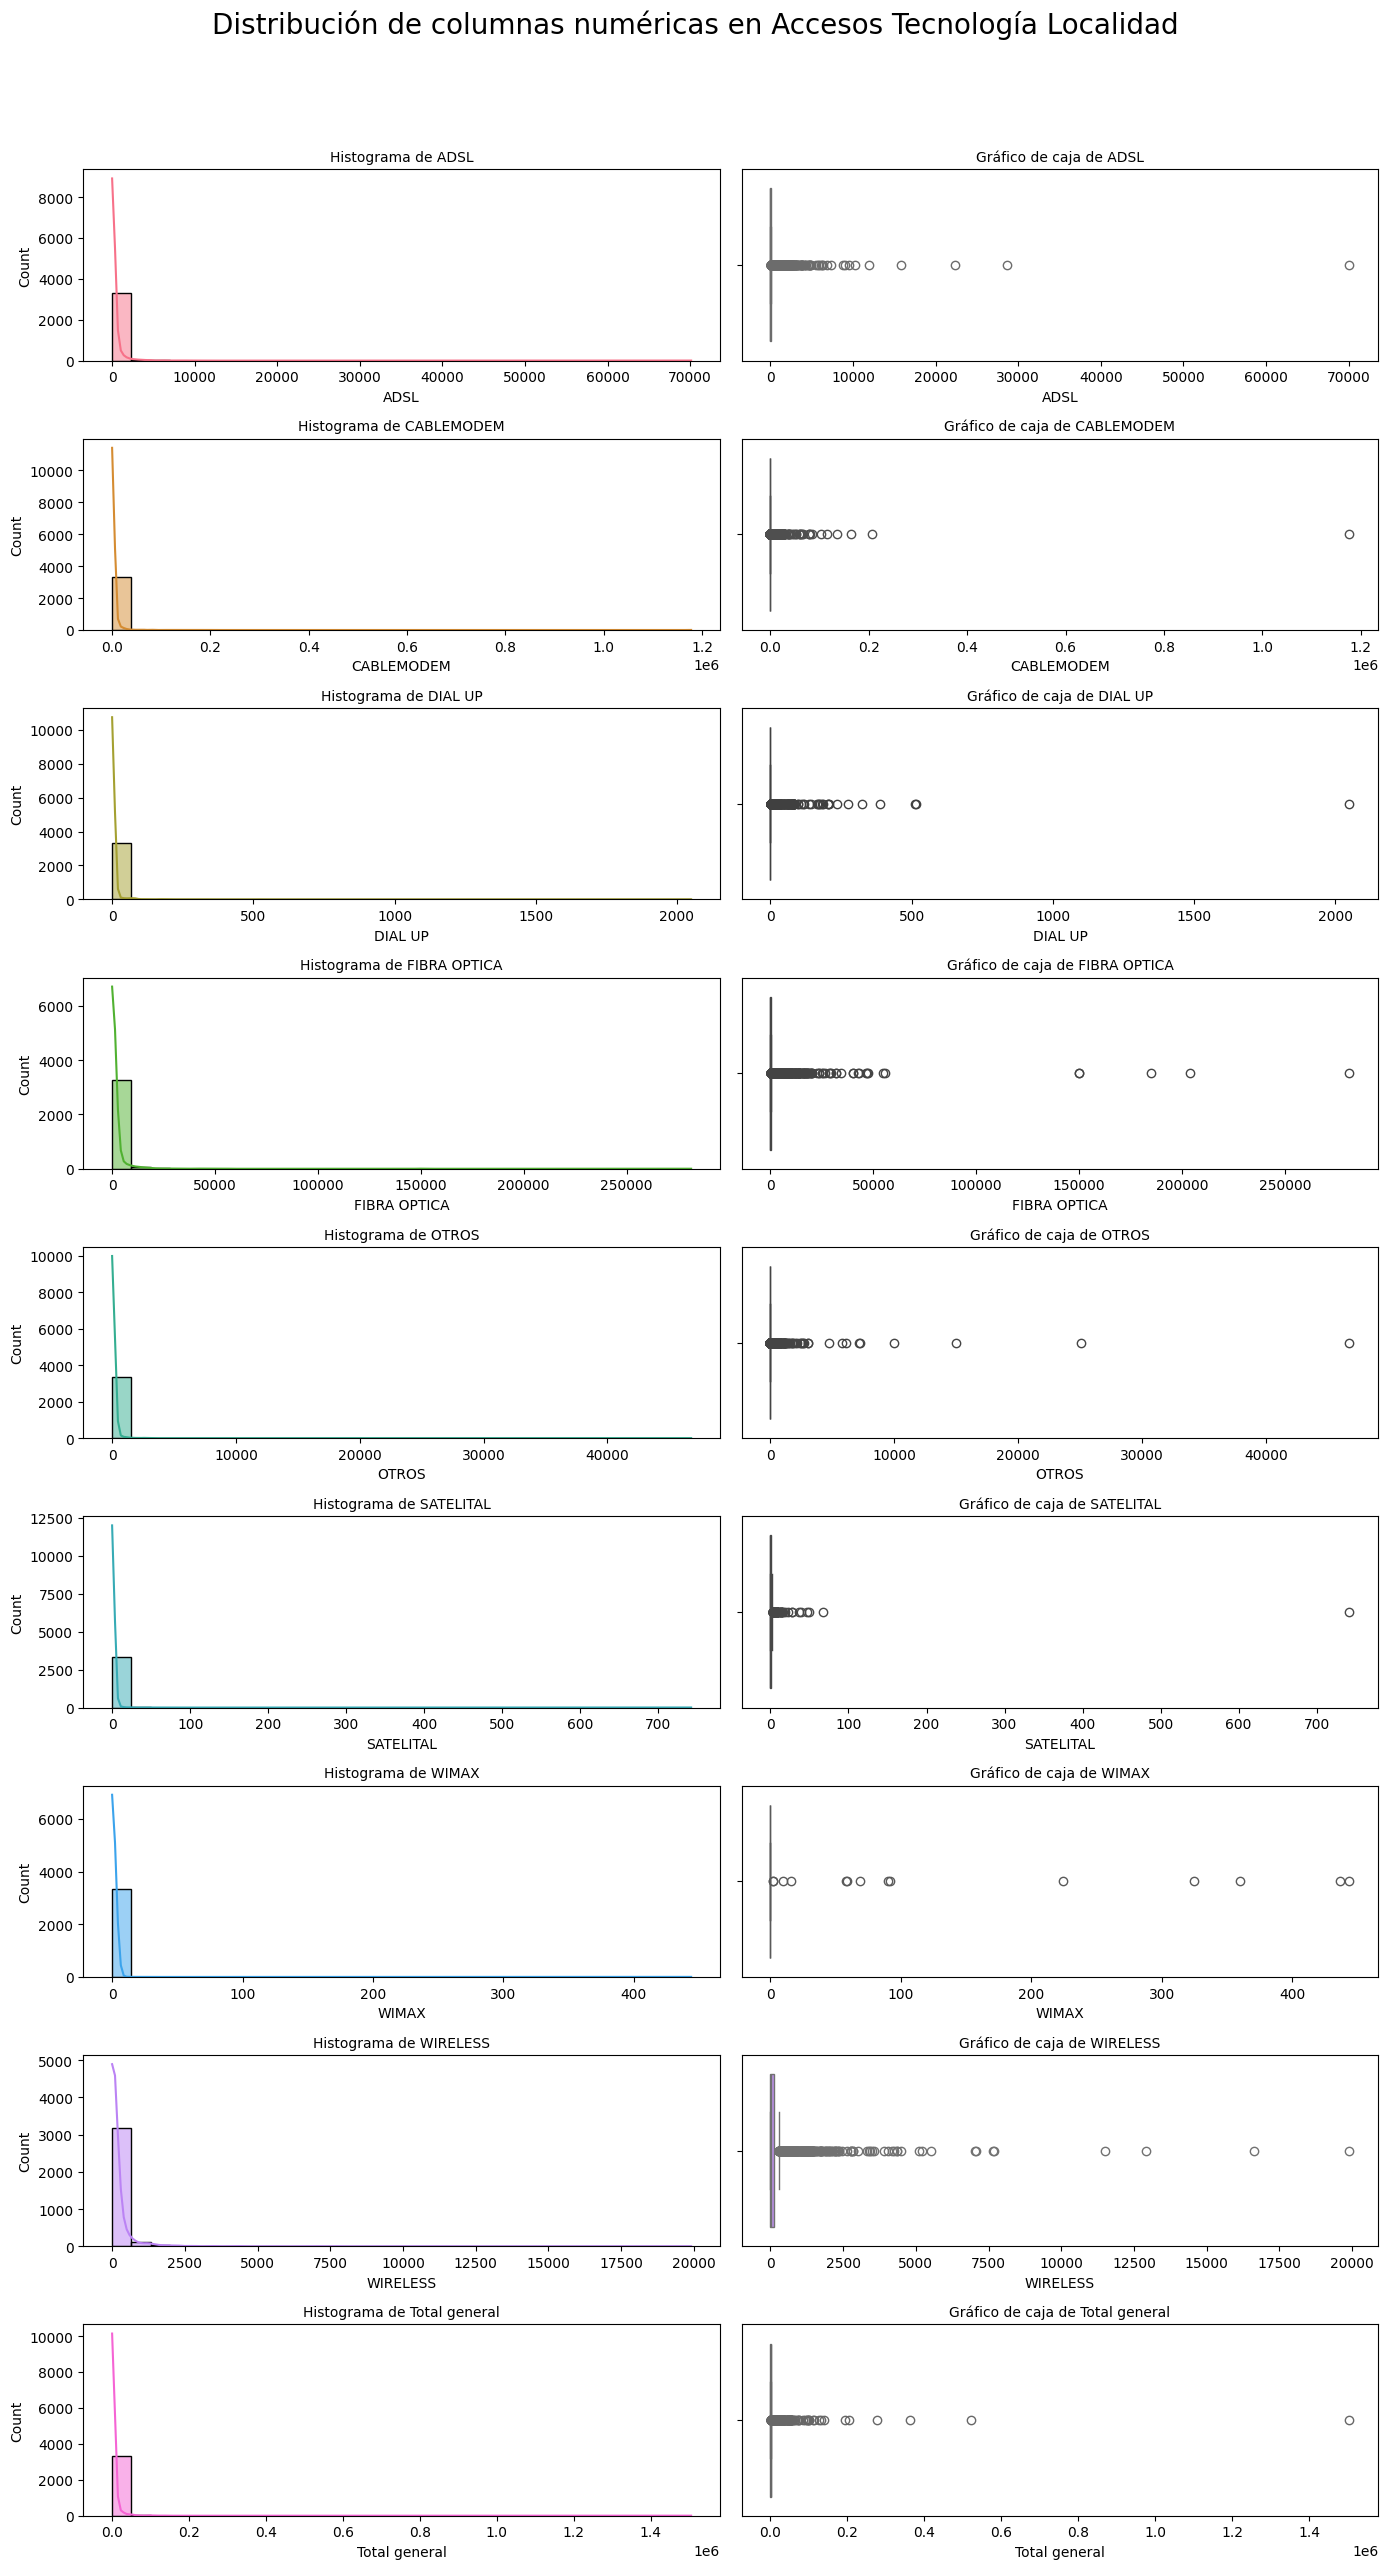

Análisis de distribución para Penetración por poblacion:


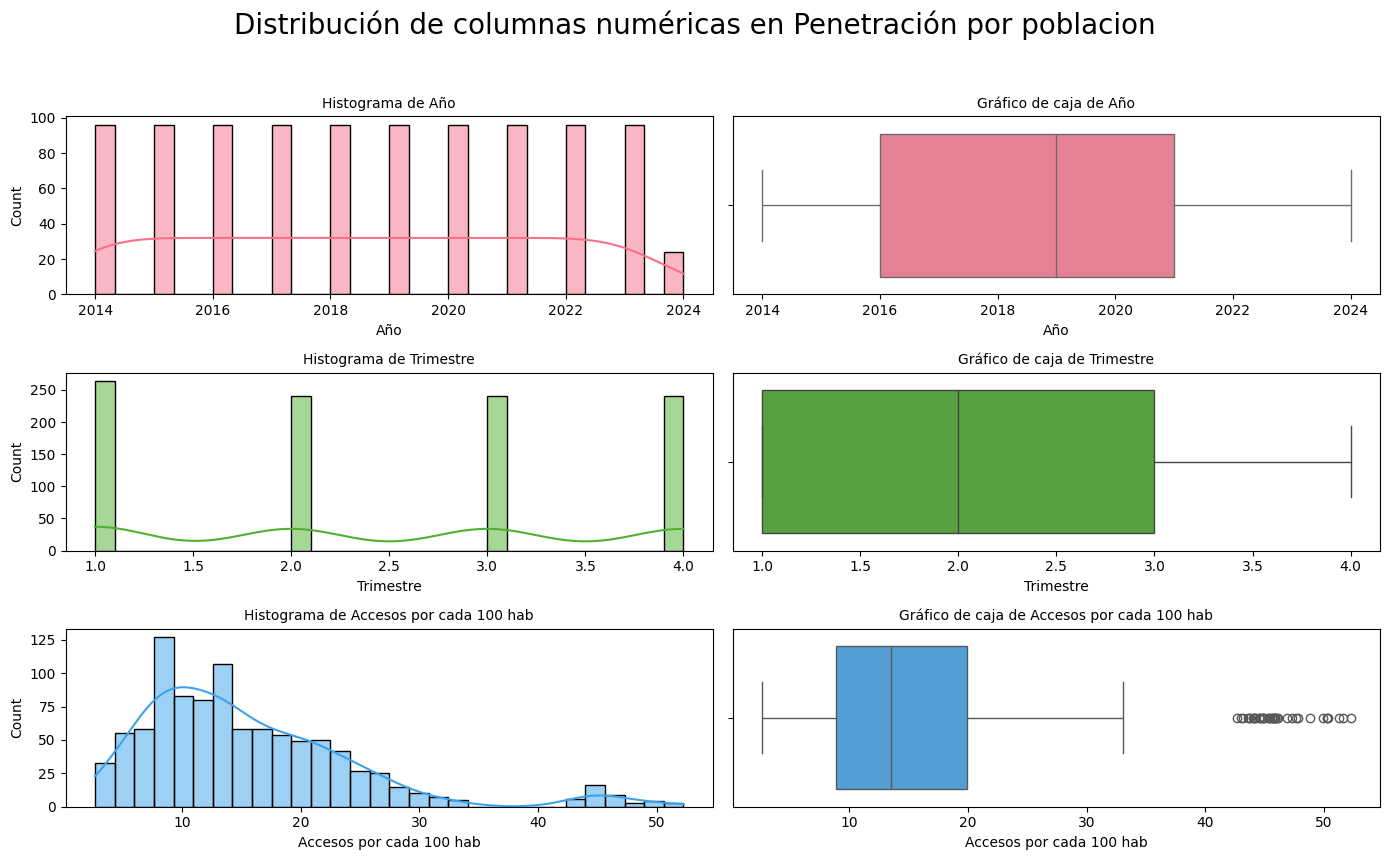

Análisis de distribución para Penetración por hogares:


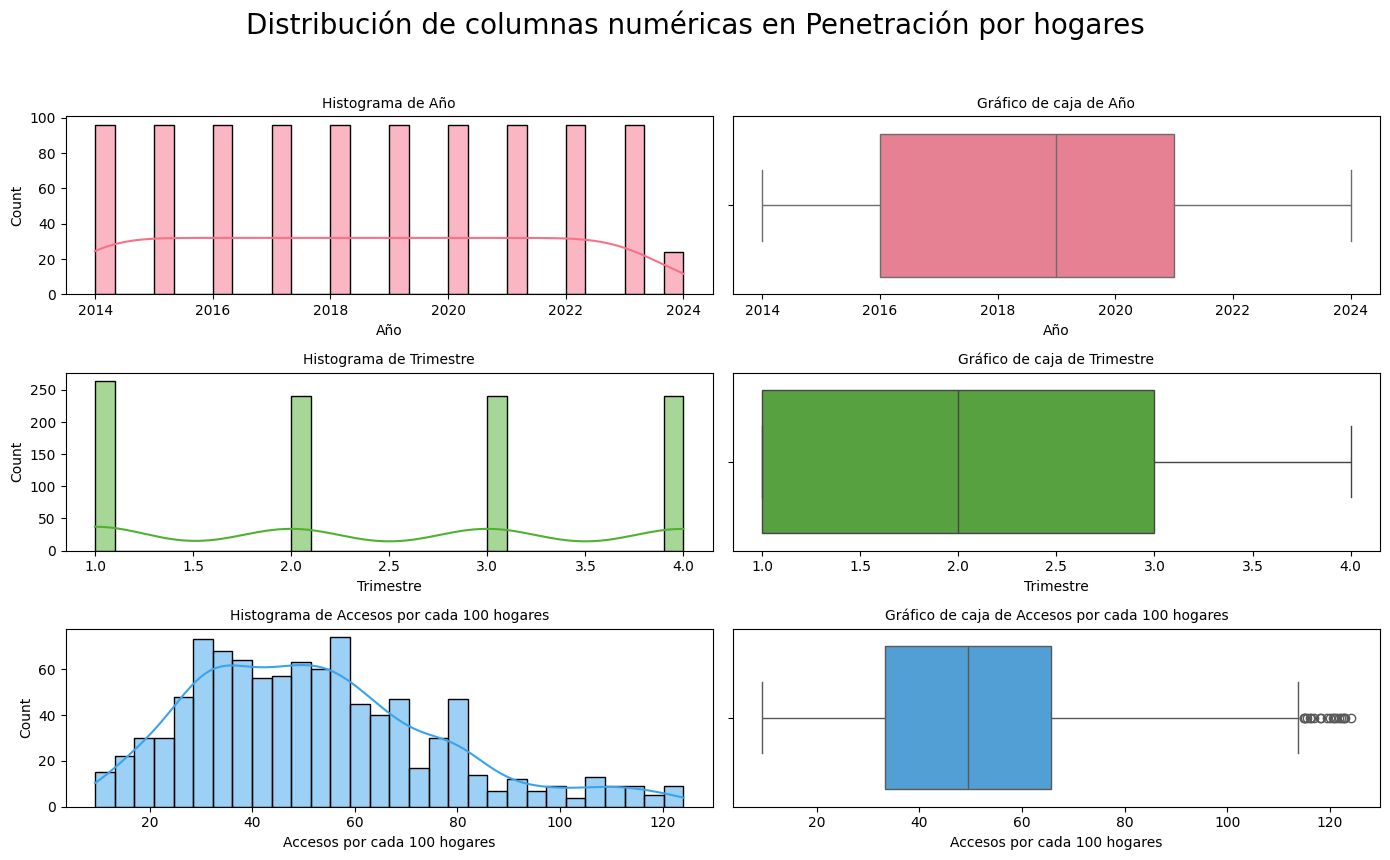

Análisis de distribución para Totales acceso por velocidad:


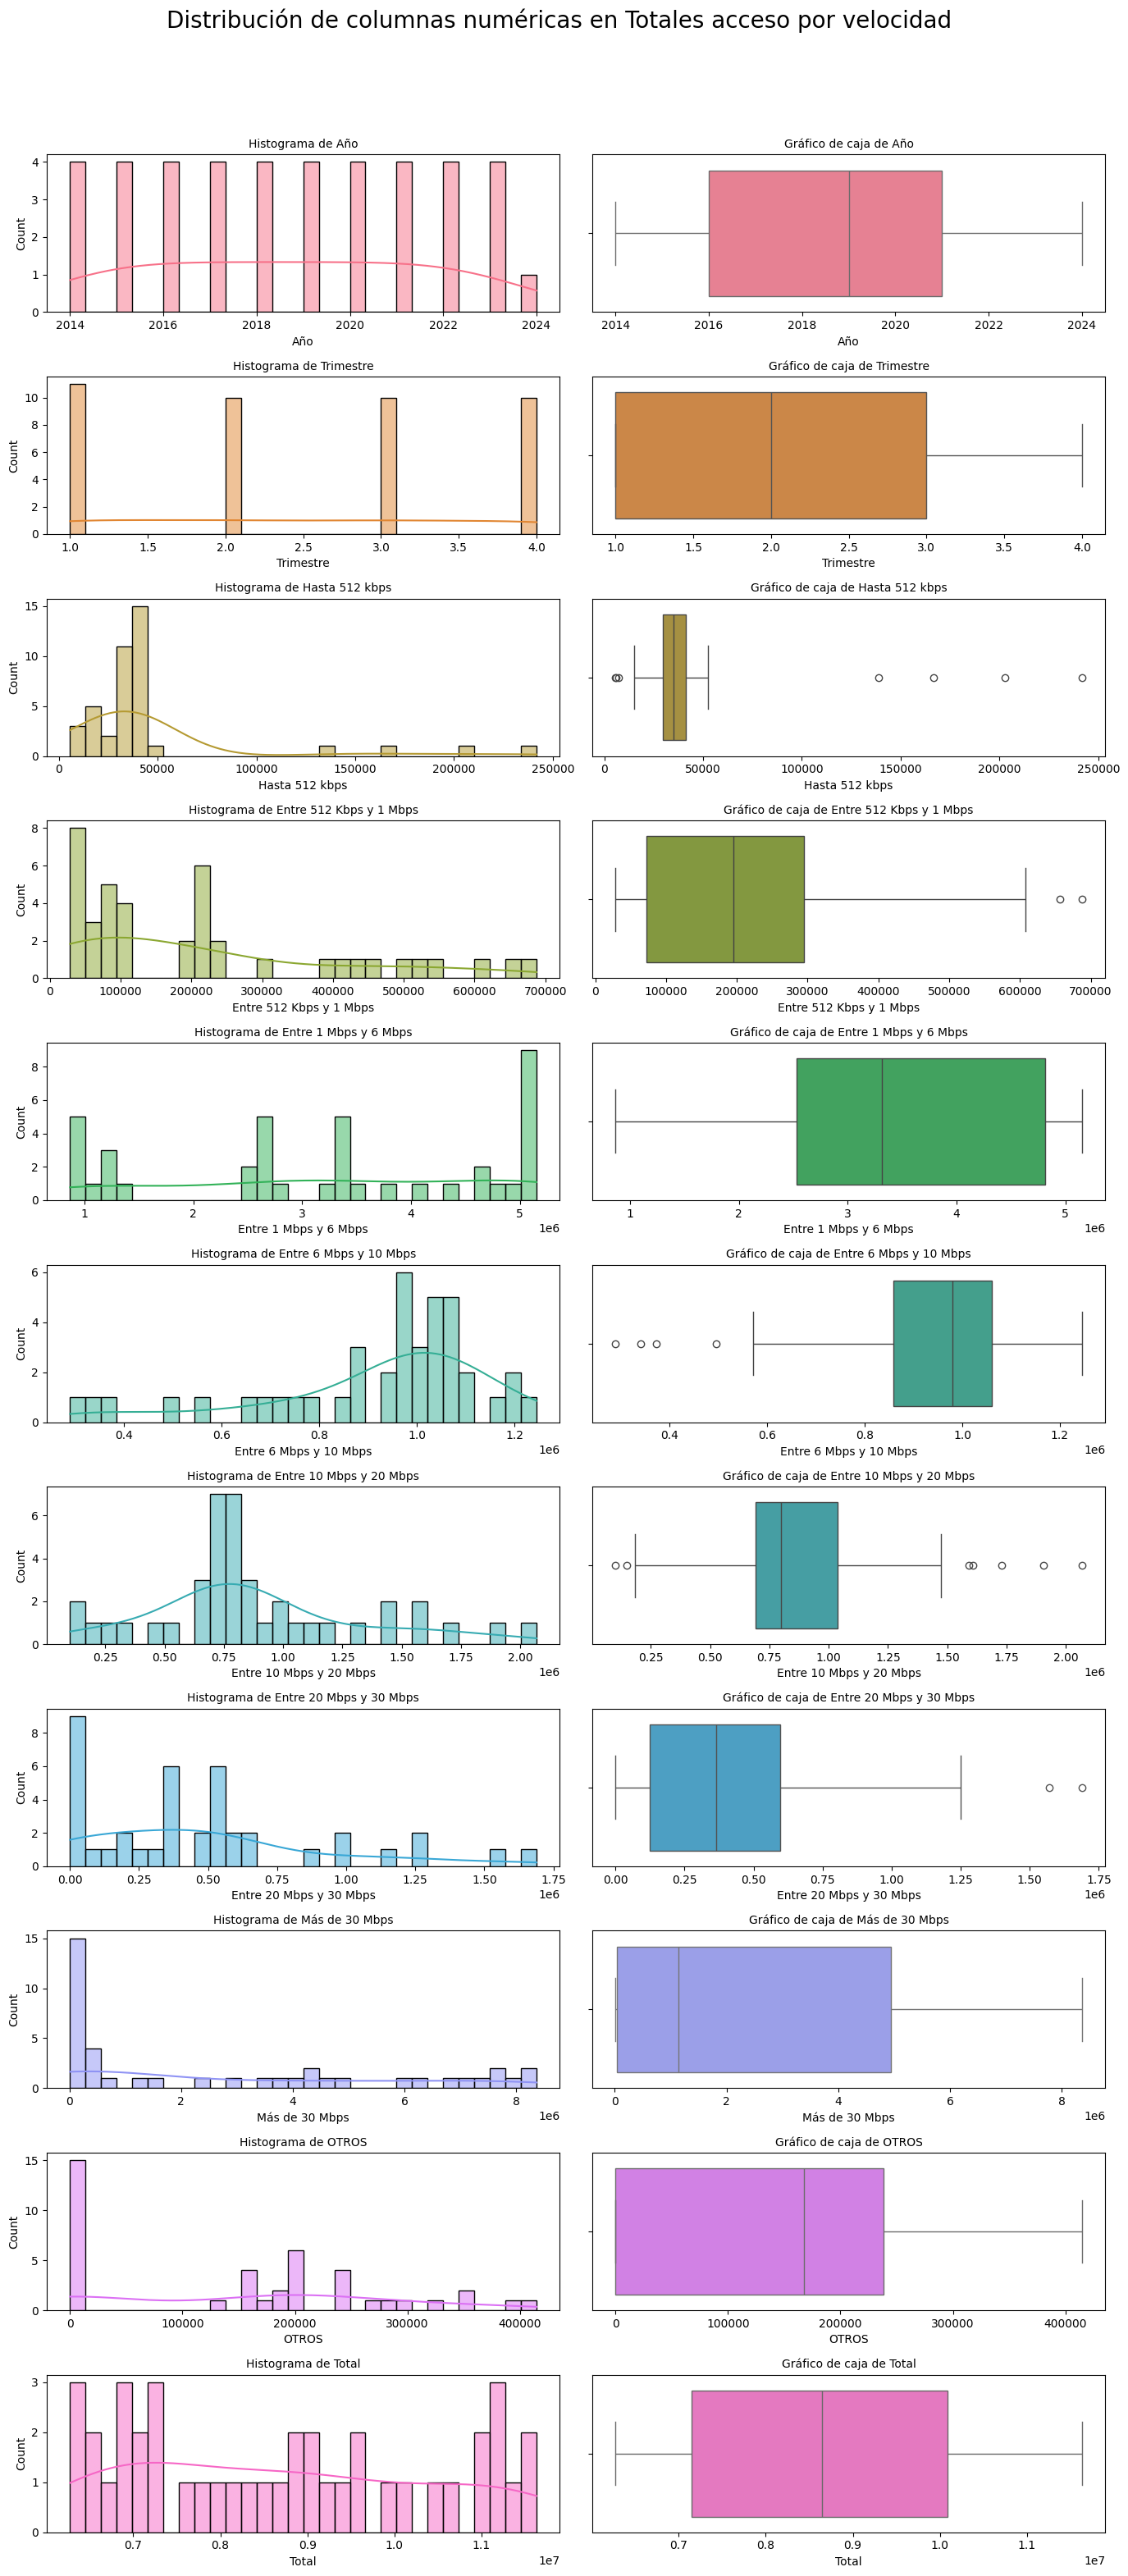

Análisis de distribución para Ingresos:


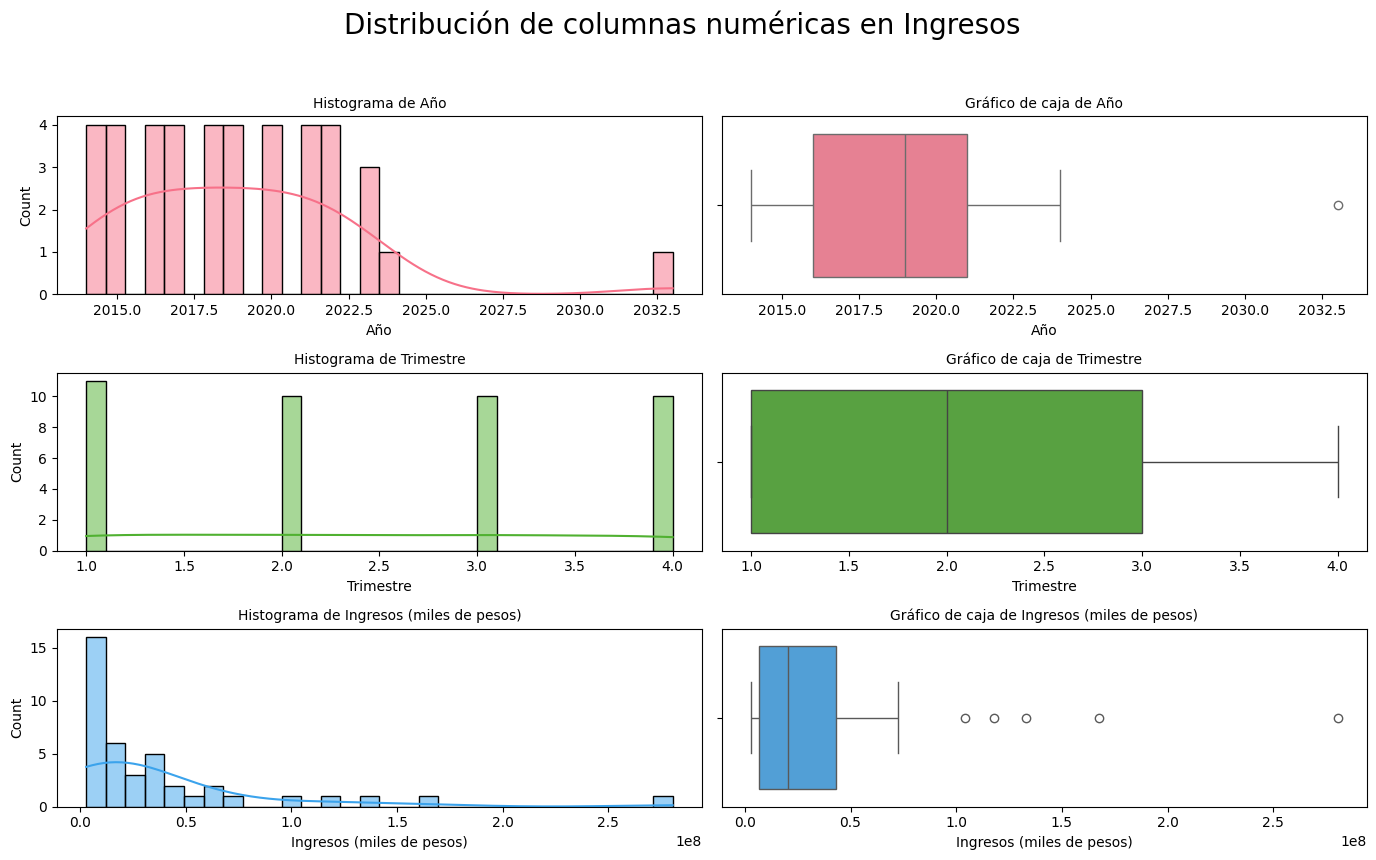

In [15]:
'''Ahora generaremos gráficos para visualizar y tener una comprensión más clara
sobre las columnas numéricas y sus comportamientos'''

# Recorremos cada dataframe
for nombre, df in dataframes.items():
    print(f"Análisis de distribución para {nombre}:")

    # Seleccionamos solo columnas numéricas
    columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Número de gráficos (dos por cada columna numérica)
    num_graficos = len(columnas_numericas) * 2
    num_filas = math.ceil(num_graficos / 2)

    # Creamos una figura con el tamaño ajustado
    fig, axes = plt.subplots(num_filas, 2, figsize=(14, num_filas * 3))
    axes = axes.flatten()  # Aplanamos para indexación fácil
    
    # Obtenemos una paleta de colores
    colores = sns.color_palette("husl", len(columnas_numericas))
    
    # Graficamos histogramas y gráficos de caja
    for idx, columna in enumerate(columnas_numericas):
        hist_idx = idx * 2
        box_idx = hist_idx + 1

        # Histograma
        sns.histplot(df[columna].dropna(), kde=True, bins=30, ax=axes[hist_idx], color=colores[idx])
        axes[hist_idx].set_title(f"Histograma de {columna}", fontsize=10)

        # Gráfico de caja
        sns.boxplot(x=df[columna], ax=axes[box_idx], color=colores[idx])
        axes[box_idx].set_title(f"Gráfico de caja de {columna}", fontsize=10)

    # Ajustamos el título de la figura completa
    fig.suptitle(f"Distribución de columnas numéricas en {nombre}", fontsize=20)

    # Ajustamos los espacios para evitar superposición de títulos y gráficos
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()

En estos gráficos podemos observar la presencia de muchos valores atípicos pero también se puede visualizar que no tenemos curvas normales, más adelante abordaremos el tema con un poco más de información.

Análisis de distribución para columnas categóricas en Accesos Tecnología Localidad:


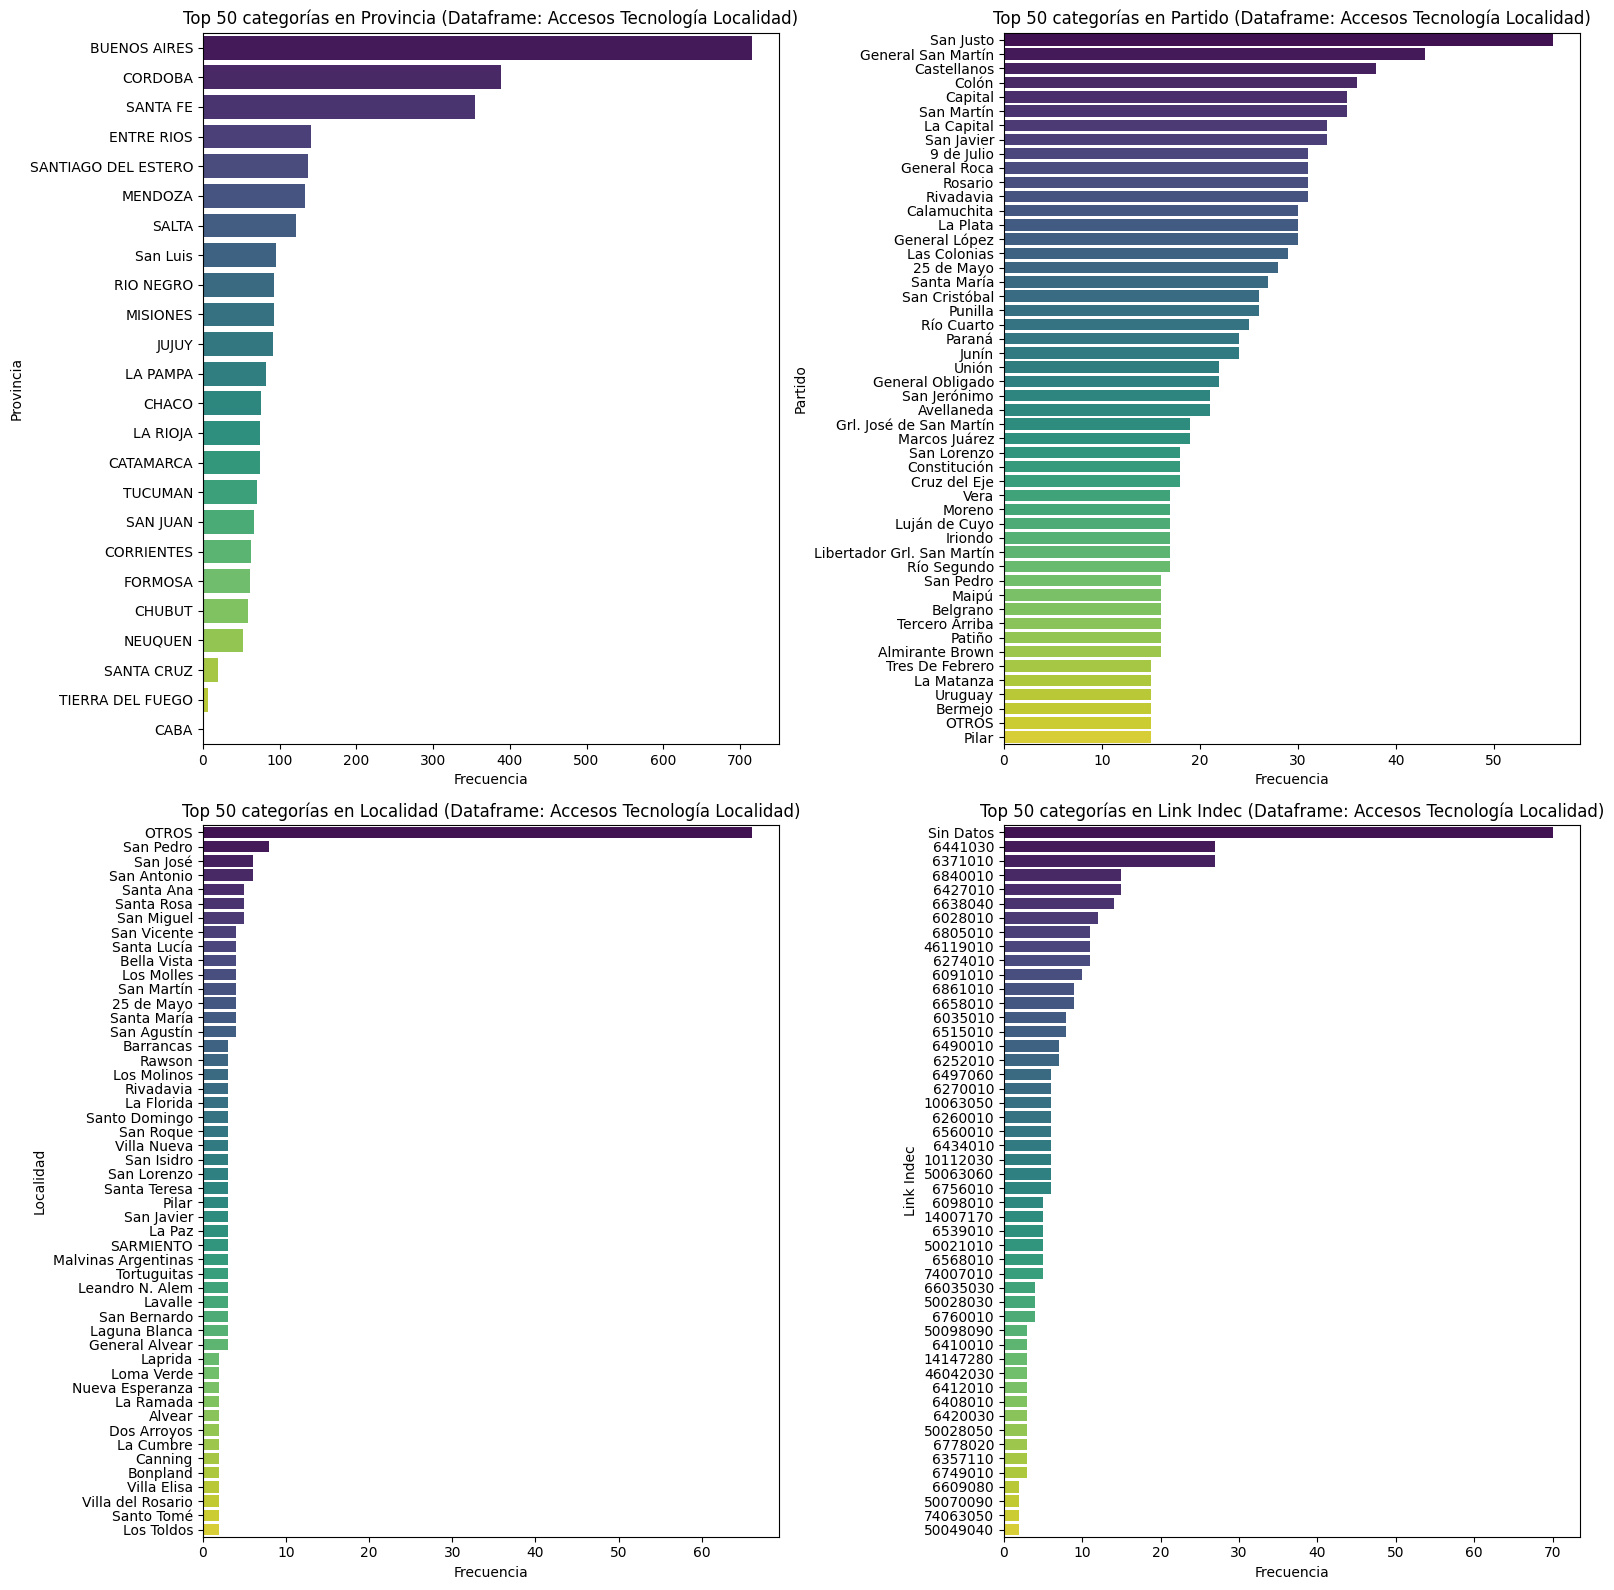

Análisis de distribución para columnas categóricas en Penetración por poblacion:


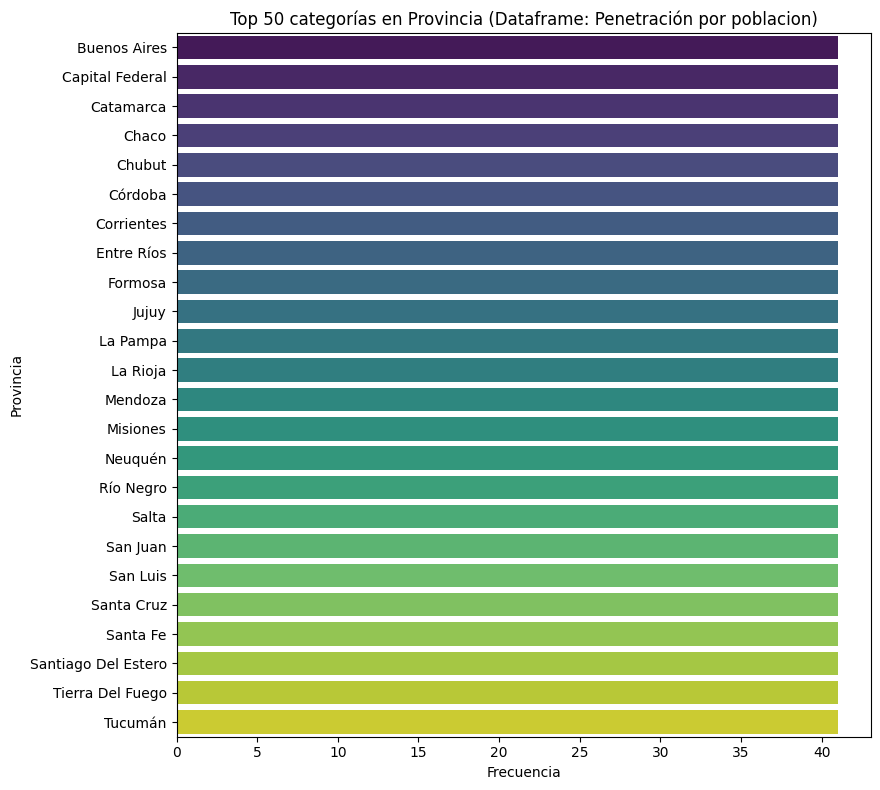

Análisis de distribución para columnas categóricas en Penetración por hogares:


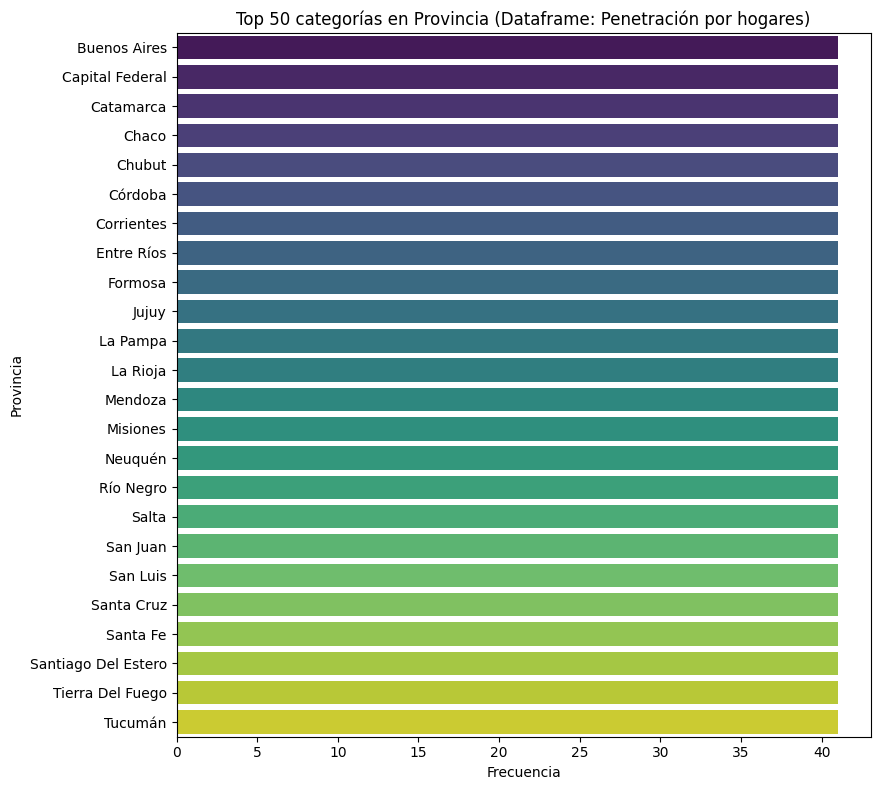

Análisis de distribución para columnas categóricas en Totales acceso por velocidad:
No hay columnas categóricas en el dataframe 'Totales acceso por velocidad'.
Análisis de distribución para columnas categóricas en Ingresos:


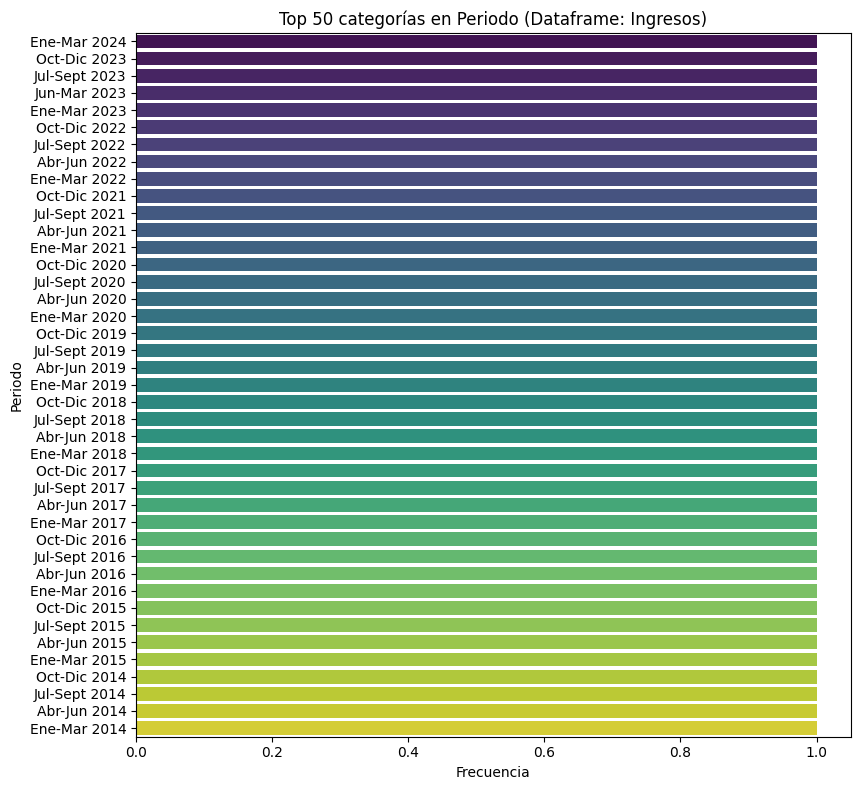

In [16]:
'''Ahora realizaremos un proceso similar pero con las columnas categóricas.
En un principio visualizaremos sus frecuencias por tabla.'''

# Recorremos cada dataframe
for nombre, df in dataframes.items():
    print(f"Análisis de distribución para columnas categóricas en {nombre}:")

    # Seleccionamos solo columnas categóricas
    columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns

    # Verificamos si hay columnas categóricas
    if len(columnas_categoricas) == 0:
        print(f"No hay columnas categóricas en el dataframe '{nombre}'.")
        continue  # Saltamos al siguiente dataframe si no hay columnas categóricas

    # Número de columnas categóricas para definir el tamaño de la figura
    num_columnas = len(columnas_categoricas)
    
    # Calculamos cuántas filas de gráficos serán necesarias (dos gráficos por fila)
    num_filas = (num_columnas + 1) // 2
    
    # Ajustamos la altura de cada fila
    altura_por_fila = 8  # Altura en pulgadas por cada fila, ajustable
    altura_total = num_filas * altura_por_fila
    
    # Creamos una figura con subplots, aumentando la altura para mejorar la legibilidad
    fig, axes = plt.subplots(num_filas, 2, figsize=(16, altura_total))
    
    # Flatten para iterar sobre los ejes fácilmente
    axes = axes.flatten()

    # Graficamos conteos de categorías
    for i, columna in enumerate(columnas_categoricas):
        # Calculamos el número de categorías únicas
        num_categorias = df[columna].nunique()

        # Ajustamos el alto del gráfico basado en el número de categorías con un límite máximo
        height = min(max(6, num_categorias / 2), 20)  # Altura mínima de 6, ajustable, con un máximo de 20
        
        # Seleccionamos las 50 categorías más comunes
        top_50_values = df[columna].value_counts().nlargest(50).index
        
        # Filtramos el DataFrame para incluir solo estas categorías
        df_top_50 = df[df[columna].isin(top_50_values)]
        
        # Gráfico de conteo en el subplot correspondiente
        sns.countplot(data=df_top_50, y=columna, order=top_50_values, palette="viridis", ax=axes[i])
        axes[i].set_title(f"Top 50 categorías en {columna} (Dataframe: {nombre})")
        axes[i].set_xlabel("Frecuencia")
        axes[i].set_ylabel(columna)
        
    # Ocultamos gráficos vacíos si el número de columnas es impar
    if num_columnas % 2 != 0:
        fig.delaxes(axes[-1])
    
    # Ajustamos los márgenes y espaciado
    plt.tight_layout()
    plt.show()

In [16]:
'''También buscaremos graficas relaciones entre las columnas de cada tabla con el ánimo
de entender mejor cada dataframe y sus interacciones'''

# Nos asegurarmos de que los gráficos se muestren en el notebook
%matplotlib inline

# Función para visualizar las relaciones POR COLUMNA
def visualizar_relaciones(dataframes):
    for nombre, df in dataframes.items():
        if nombre == "Accesos Tecnología Localidad":
            columnas_valores = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 
                                'SATELITAL', 'WIMAX', 'WIRELESS', 'Total general']
            columnas_categorias = ['Provincia', 'Partido', 'Localidad']
            
            for categoria in columnas_categorias:
                plt.figure(figsize=(16, 10))  # Tamaño más grande para mejor visibilidad
                
                # Reestructuramos el DataFrame usando melt
                df_melted = df.melt(id_vars=categoria, value_vars=columnas_valores, 
                                    var_name='Tecnología', value_name='Accesos')
                
                # Obtenemos el top 20 por categoría basado en la suma de accesos
                top_20_categorias = df_melted.groupby(categoria)['Accesos'].sum().nlargest(20).index
                df_top_20 = df_melted[df_melted[categoria].isin(top_20_categorias)]
                
                # Identificamos las dos categorías con mayor suma de accesos
                top_2_categorias = df_top_20.groupby(categoria)['Accesos'].sum().nlargest(2).index
                df_top_2 = df_top_20[df_top_20[categoria].isin(top_2_categorias)]
                df_otros = df_top_20[~df_top_20[categoria].isin(top_2_categorias)]
                
                # Graficamos las categorías principales por separado
                fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16), gridspec_kw={'height_ratios': [1, 2]})
                
                # Colores menos contrastantes para top 2
                sns.barplot(data=df_top_2, x='Tecnología', y='Accesos', hue=categoria, ci=None, ax=ax1,
                            palette="pastel")  # Usar paleta pastel para menor contraste
                ax1.set_title(f'Top 2 categorías con mayor suma de accesos (Dataframe: {nombre})')
                ax1.legend(title=categoria, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)  # Leyenda abajo
                ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
                
                # Colores con más contraste para el resto de las categorías
                sns.barplot(data=df_otros, x='Tecnología', y='Accesos', hue=categoria, ci=None, ax=ax2,
                            palette="tab20")  # Usamos paleta tab20 para más contraste
                ax2.set_title(f'Relación de accesos por tecnología y {categoria} (excluyendo Top 2) (Dataframe: {nombre})')
                ax2.legend(title=categoria, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)  # Leyenda abajo
                ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
                
                # Ajustamos los márgenes y espaciado
                plt.tight_layout()
                plt.show()
                
        elif nombre == "Penetración por población":
            # Creamos una figura con un tamaño específico para la gráfica
            plt.figure(figsize=(12, 6))
            # Generamos un gráfico de barras utilizando seaborn
            sns.barplot(data=df, x='Provincia', y='Accesos por cada 100 hab', ci=None, palette="Set2")  # Usamos una paleta de colores aleatorios
            # Establecemos el título de la gráfica
            plt.title(f'Accesos por cada 100 habitantes por provincia (Dataframe: {nombre})')
            # Rotamos las etiquetas del eje x para una mejor visualización
            plt.xticks(rotation=45)
            # Mostramos la gráfica
            plt.show()

        elif nombre == "Penetración por hogares":
            # Creamos una figura con un tamaño específico para la gráfica
            plt.figure(figsize=(12, 6))
            # Generamos un gráfico de barras utilizando seaborn
            sns.barplot(data=df, x='Provincia', y='Accesos por cada 100 hogares', ci=None, palette="husl")  # Usamos una paleta de colores aleatorios
            # Establecemos el título de la gráfica
            plt.title(f'Accesos por cada 100 hogares por provincia (Dataframe: {nombre})')
            # Rotamos las etiquetas del eje x para una mejor visualización
            plt.xticks(rotation=45)
            # Mostramos la gráfica
            plt.show()

        elif nombre == "Totales acceso por velocidad":
            # Definimos las columnas que contienen los valores de acceso por velocidad
            columnas_valores = ['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 
                        'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 
                        'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'OTROS', 'Total']
            # Creamos una figura con un tamaño específico para la gráfica
            plt.figure(figsize=(12, 6))
            # Derretimos el DataFrame para que sea adecuado para la gráfica de líneas
            df_melted = df.melt(id_vars=['Año', 'Trimestre'], value_vars=columnas_valores, 
                        var_name='Velocidad', value_name='Accesos')
               # Generamos un gráfico de líneas utilizando seaborn
            sns.lineplot(data=df_melted, x='Año', y='Accesos', hue='Velocidad', ci=None, marker='o')
            # Establecemos el título de la gráfica
            plt.title(f'Accesos por velocidad y año (Dataframe: {nombre})')
            # Rotamos las etiquetas del eje x para una mejor visualización
            plt.xticks(rotation=45)
            # Mostramos la gráfica
            plt.show()

        elif nombre == "Ingresos":
            # Creamos una figura con un tamaño específico para la gráfica
            plt.figure(figsize=(12, 6))
            # Generamos un gráfico de líneas utilizando seaborn
            sns.lineplot(data=df, x='Año', y='Ingresos (miles de pesos)', hue='Trimestre', ci=None, marker='o')
            # Establecemos el título de la gráfica
            plt.title(f'Ingresos por año y trimestre (Dataframe: {nombre})')
            # Rotamos las etiquetas del eje x para una mejor visualización
            plt.xticks(rotation=45)
            # Mostramos la gráfica
            plt.show()

<Figure size 1600x1000 with 0 Axes>

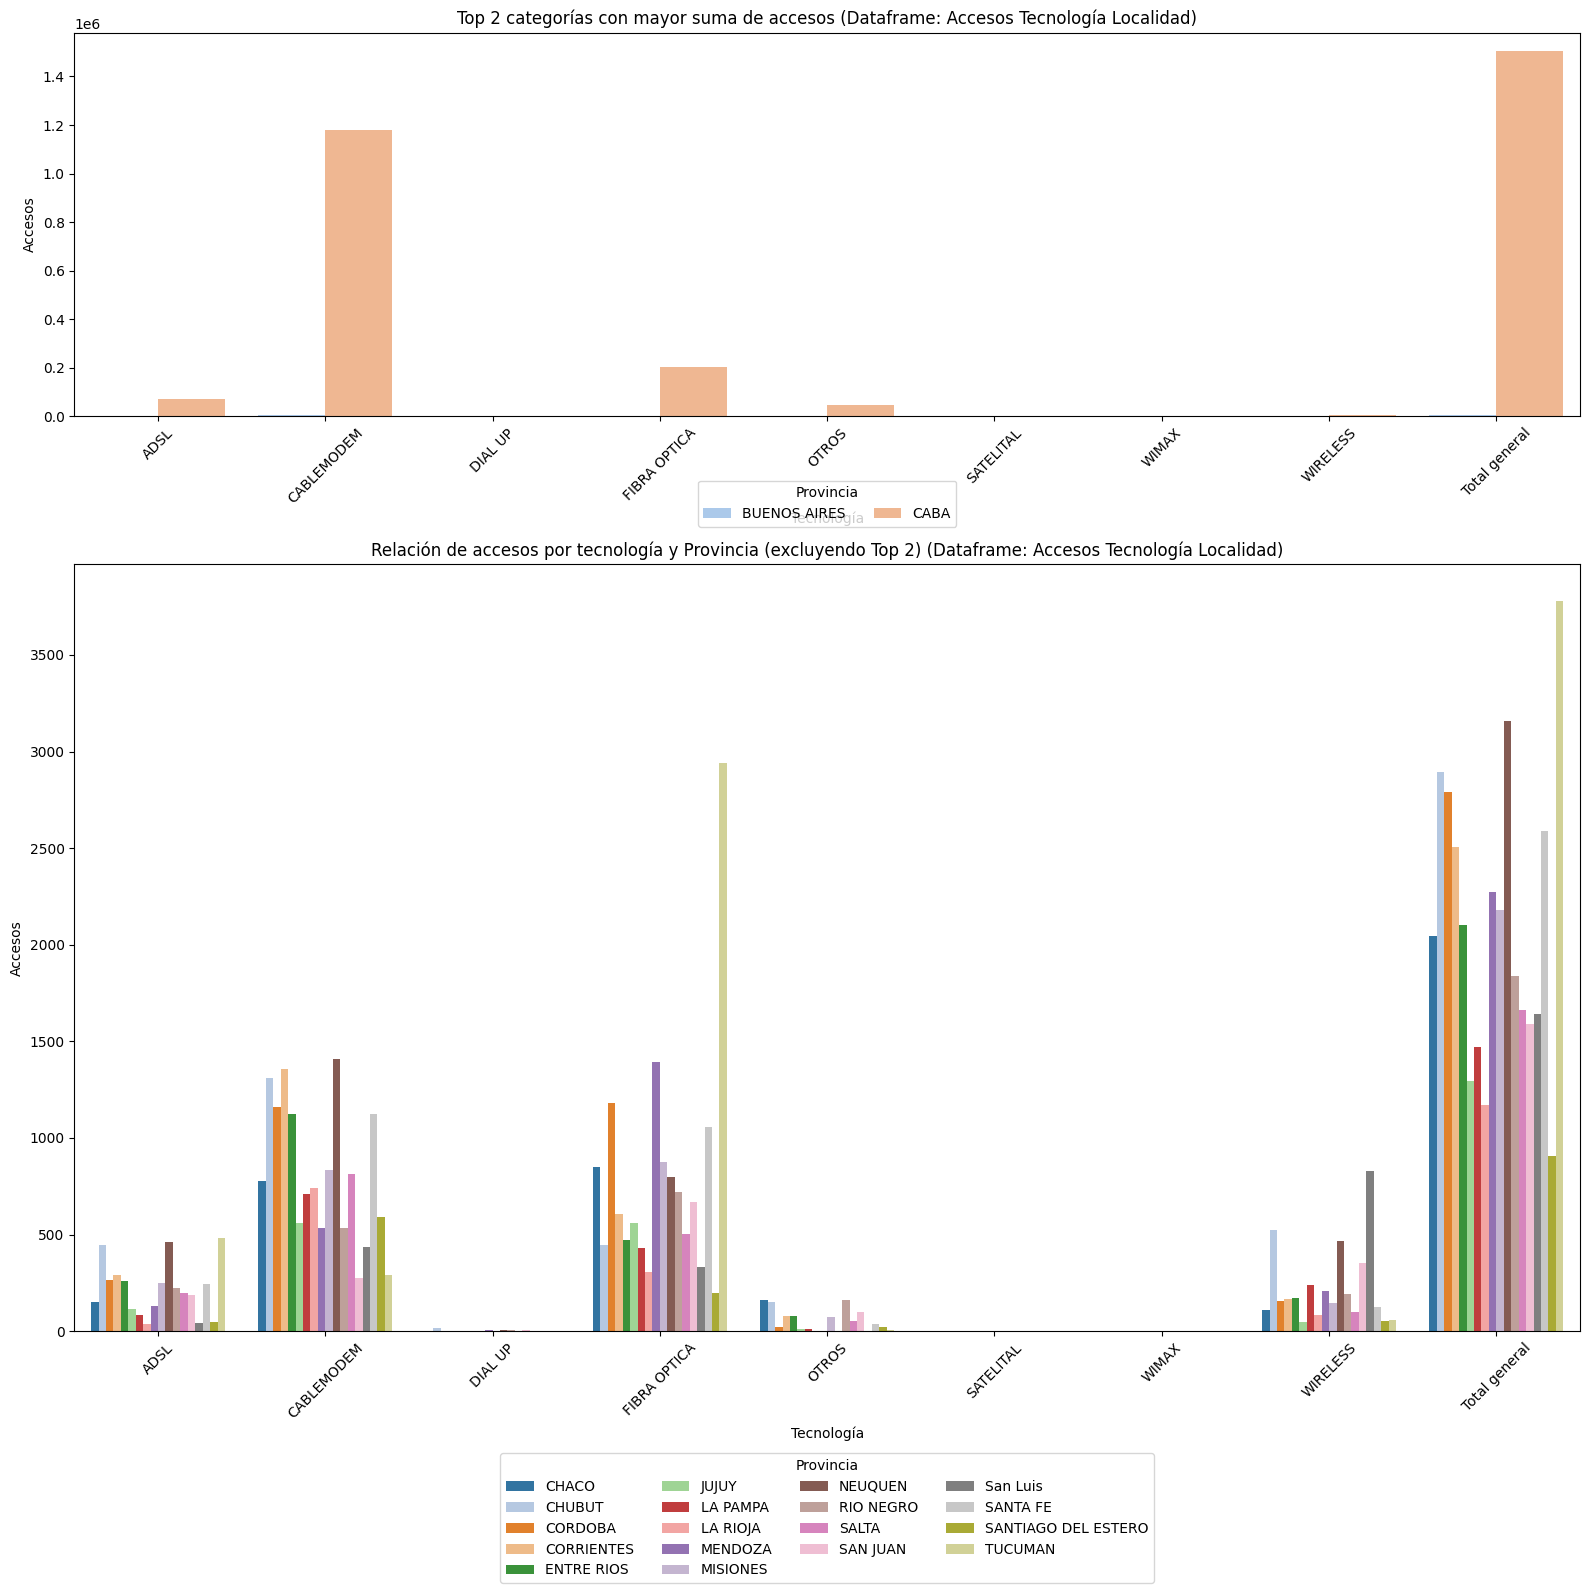

<Figure size 1600x1000 with 0 Axes>

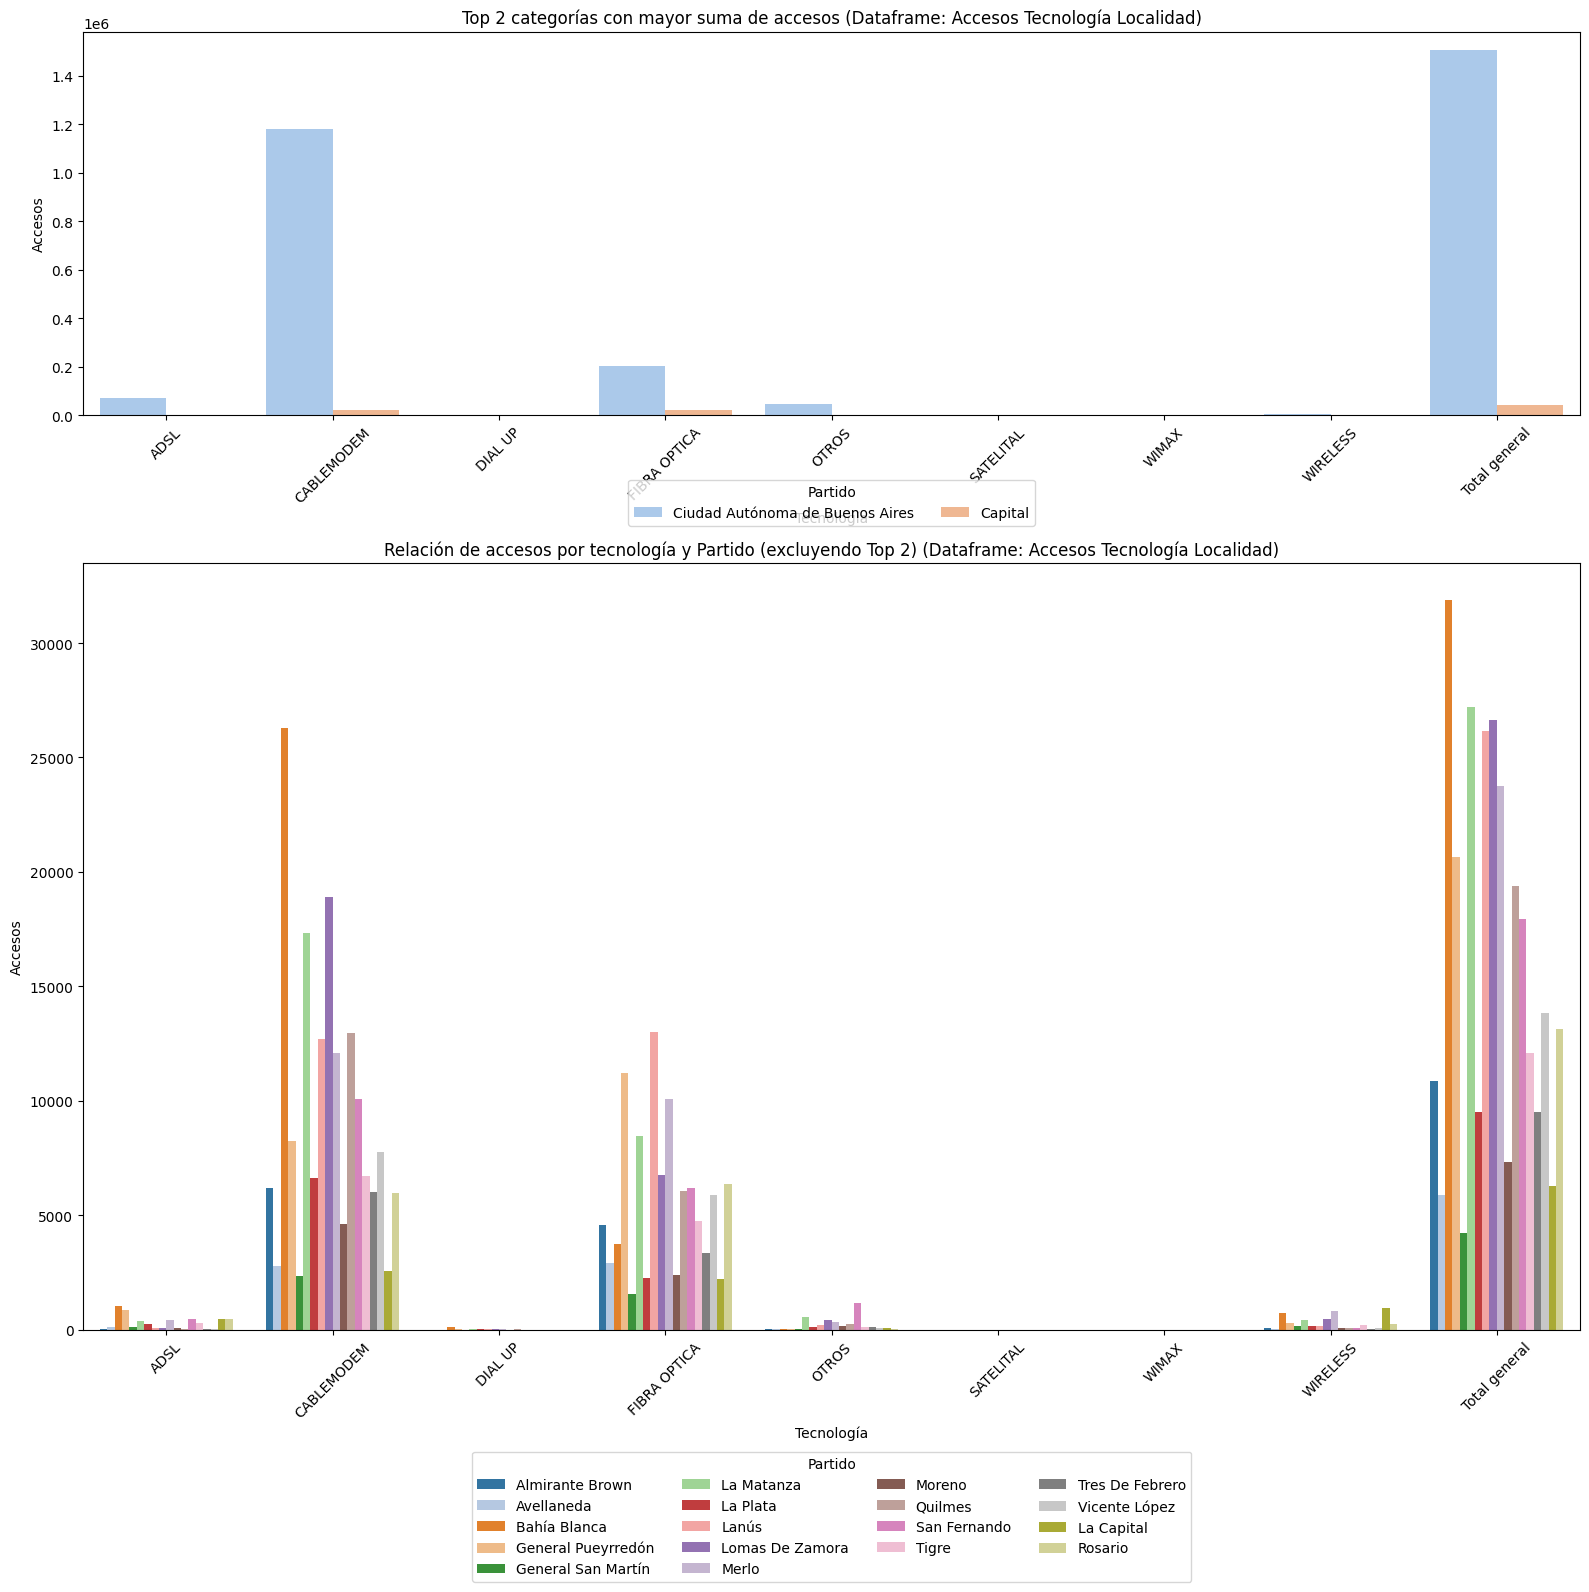

<Figure size 1600x1000 with 0 Axes>

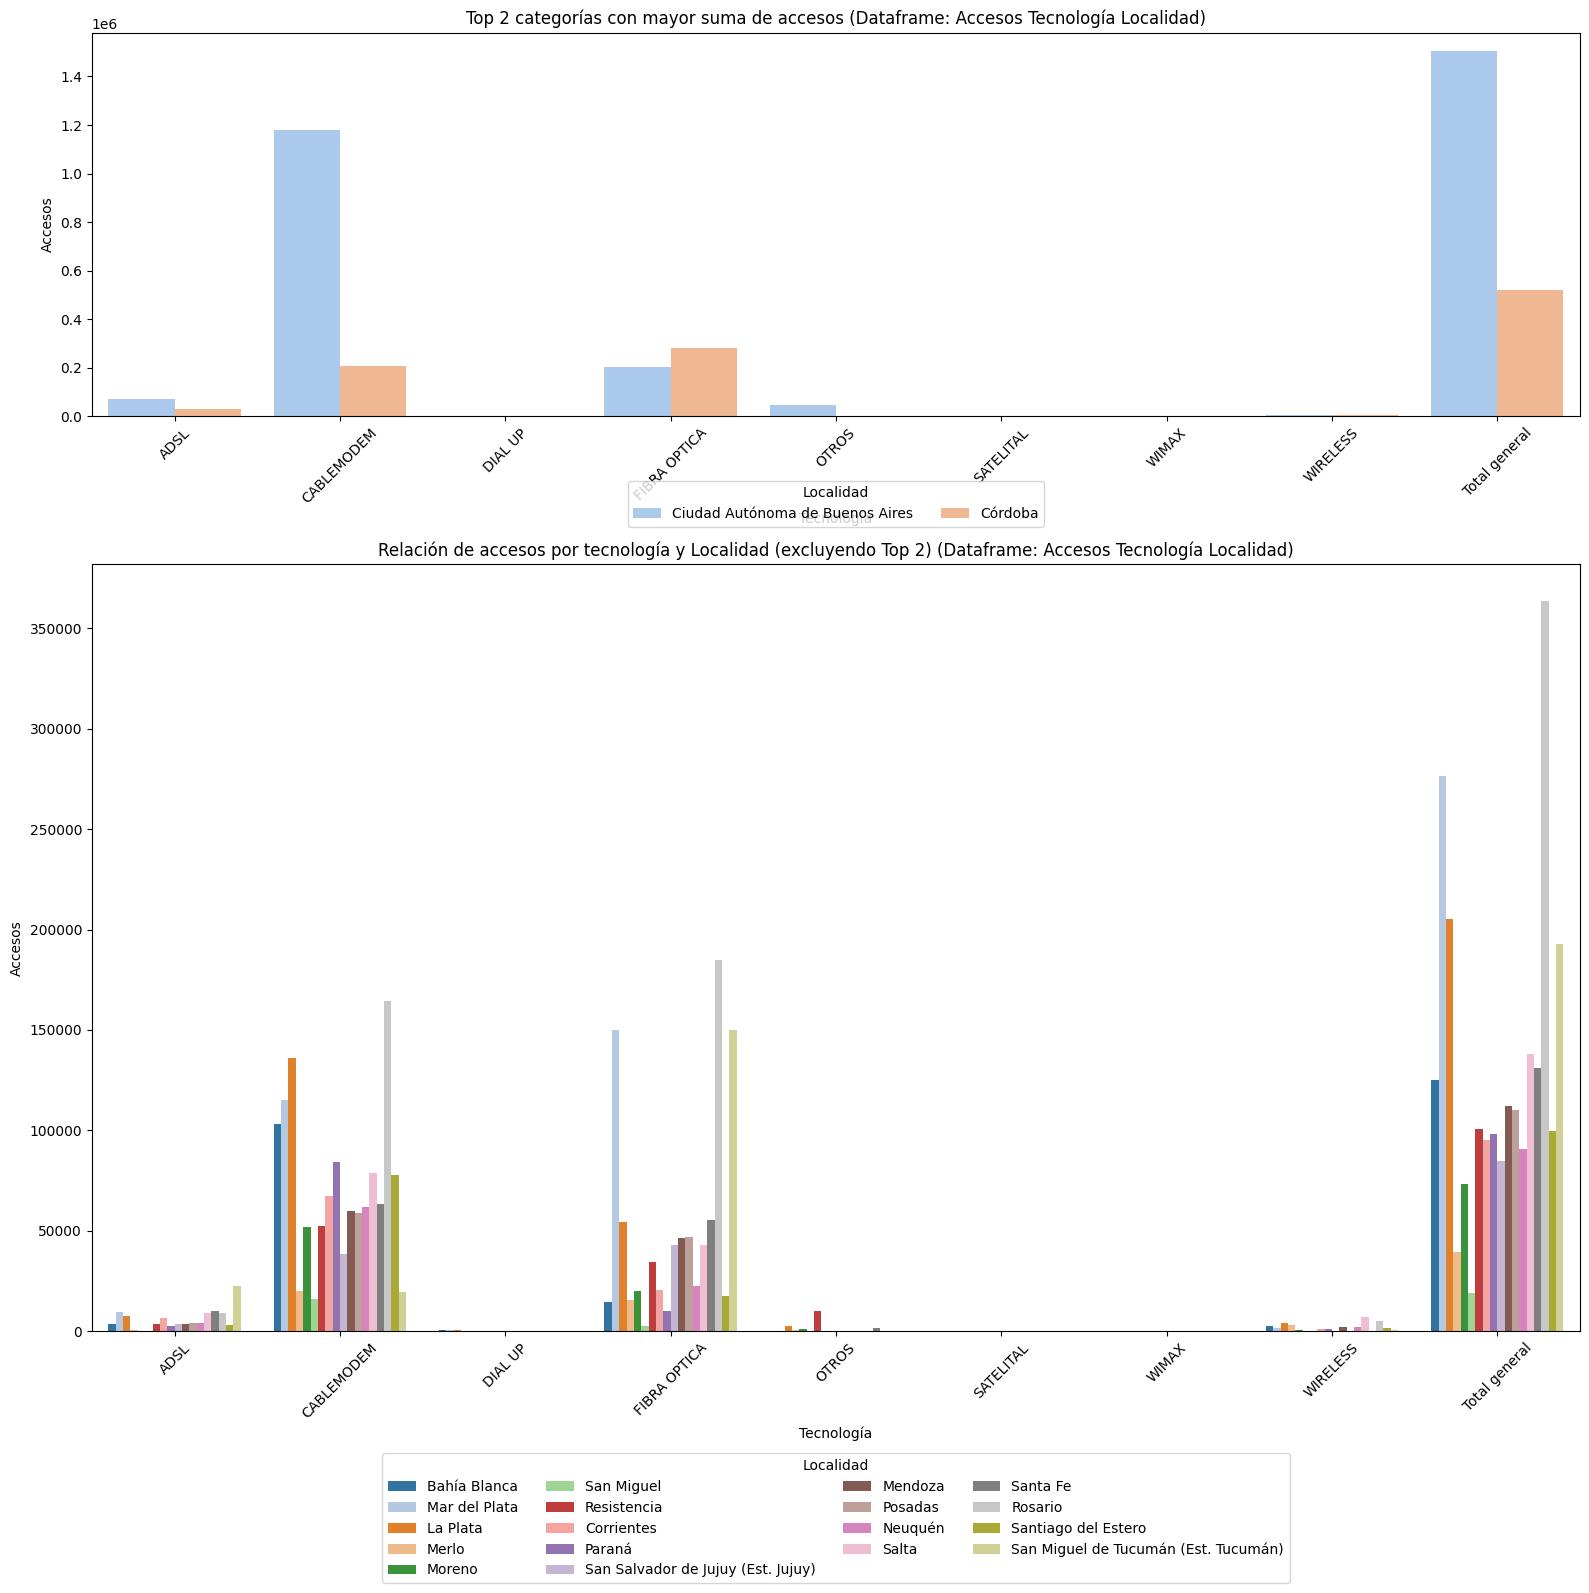

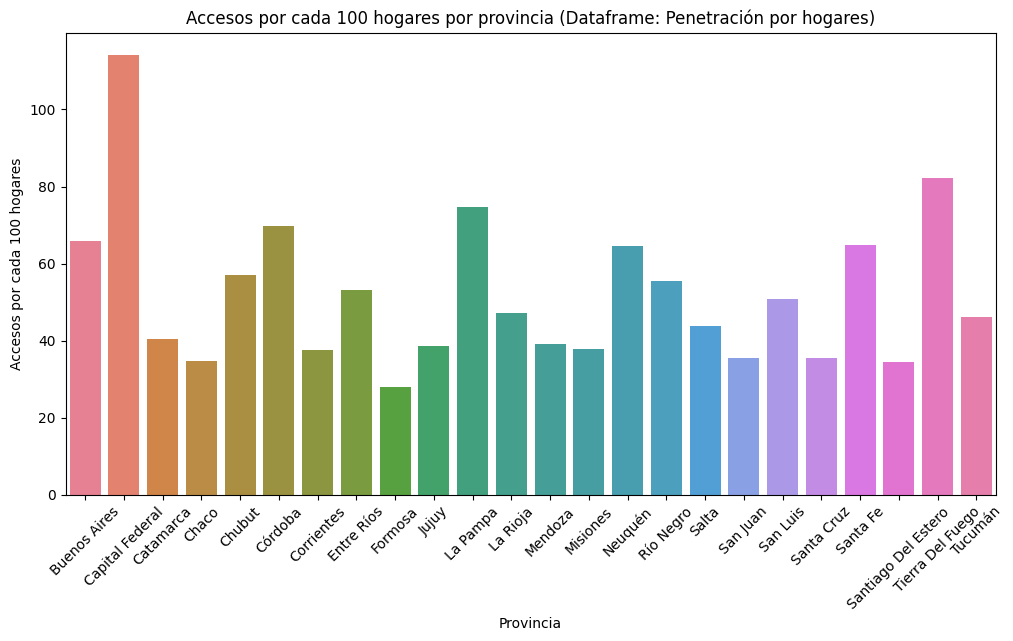

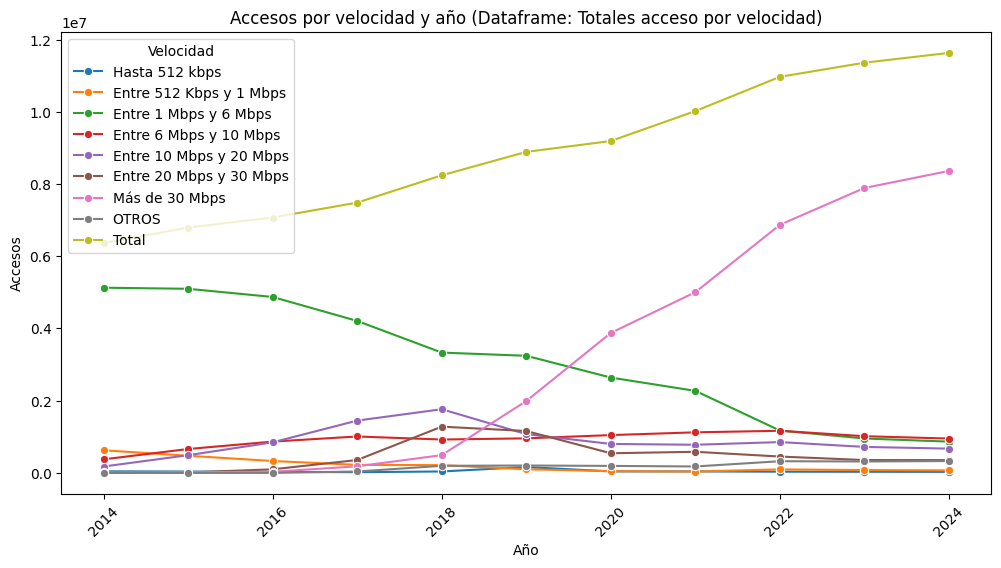

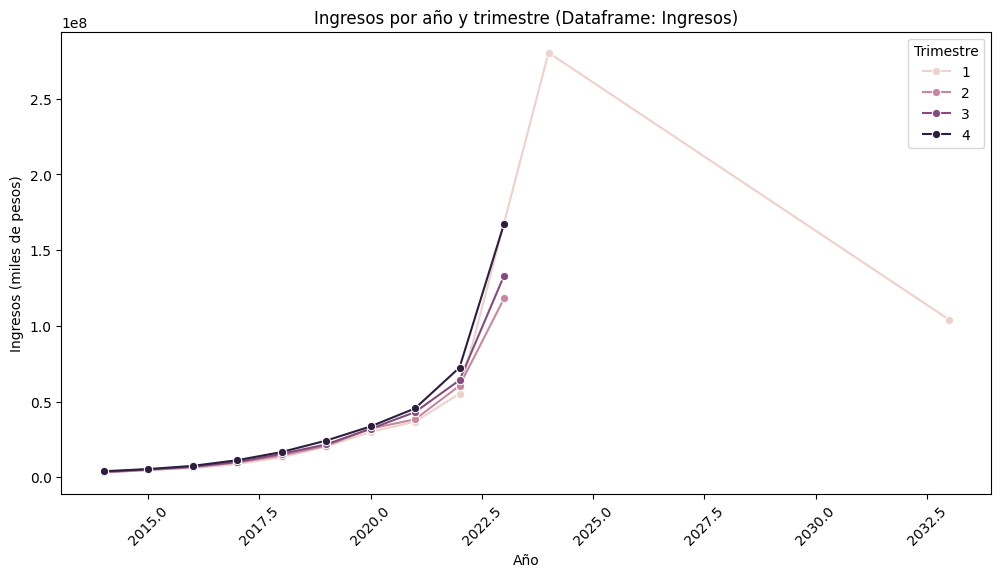

In [17]:
# Llamamos a la función para visualizar
visualizar_relaciones(dataframes)

De estos gráficos comprendemos:  
  
Que en cuanto a tecnologías CableModem y Fibra Optica se destacan sobre el resto de las categorías y que en Capital Federal y Buenos Aires sobresalen con un porcentaje que ha necesitado separarse del resto por la alta diferencia entre los valores (igual que CableModem y Fibre Optica)  
  
Que en cuanto a Accesos por hogares nuevamente Capital federal y Buenos Aires se vuelven a destacar notablemente, esto por supuesto debido a la gran cantidad de población concentrada en estas regiones.  
  
Que el consumo mayor a 30 Mbps subió considerablemente a traves de los años mientras el de Entre 1 Mbps y 6 Mbps descendió practicamente inversamente proporcional. El resto mantuvieron sus niveles a grandes rasgos.  
  
Que en cuanto a ingresos se observan valores atípicos que trabajaremos a continuación.  

---------------

Una vez visualizado tanto los nulos, como duplicados y outliers, y después de haber echado un vistazo a los valores graficados por columnas númericas, categóricas y sus relaciones en cada dataframe, nos dedicaremos a tratar los valores átipicos para visualizar una vez más cada gráfico y análizar la diferencia entre los datos limpios y los datos en bruto.

In [18]:
# Iremos limpiando en orden por dataframe:
'''Comencemos por Accesos Tecnología Localidad, recordemos sus nulos:
Valores nulos en Accesos Tecnología Localidad:
Provincia        280
Partido          280
Localidad        280
Link Indec       280
ADSL               0
CABLEMODEM         0
DIAL UP            0
FIBRA OPTICA       0
OTROS              0
SATELITAL          0
WIMAX              0
WIRELESS           0
Total general      0
dtype: int64'''
print(detectar_nulos(accesos_tecnologia_localidad_df, accesos_tecnologia_localidad_df.columns))


--------------------------------------------------

Columna Provincia contiene valores nulos:
  Cantidad de nulos: 280

Filas con Nulos en la columna Provincia:

     Provincia Partido Localidad Link Indec  ADSL  CABLEMODEM  DIAL UP  \
3072       NaN     NaN       NaN        NaN     0           0        0   
3073       NaN     NaN       NaN        NaN     0           0        0   
3074       NaN     NaN       NaN        NaN     0           0        0   
3075       NaN     NaN       NaN        NaN     0           0        0   
3076       NaN     NaN       NaN        NaN     0           0        0   
...        ...     ...       ...        ...   ...         ...      ...   
3347       NaN     NaN       NaN        NaN     0           0        0   
3348       NaN     NaN       NaN        NaN     0           0        0   
3349       NaN     NaN       NaN        NaN     0           0        0   
3350       NaN     NaN       NaN        NaN     0           0        0   
3351       NaN     NaN 

In [19]:
'''Podemos visualizar que todos estos registros tienen todas las filas con nulos o ceros, es decir que
no tienen información relevante y podrían distorsionar tanto nuestros gráficos como nuestros cálculos.
Dadas estas observaciones procederemos a eliminarlos'''
# Eliminamos filas con al menos un valor nulo
accesos_tecnologia_localidad_df = accesos_tecnologia_localidad_df.dropna()

# Mostramos el DataFrame sin nulos
print(accesos_tecnologia_localidad_df)

         Provincia      Partido                           Localidad  \
0     BUENOS AIRES   25 de Mayo                          25 de Mayo   
1     BUENOS AIRES   25 de Mayo                           Del Valle   
2     BUENOS AIRES   25 de Mayo                   Gobernador Ugarte   
3     BUENOS AIRES   25 de Mayo              Norberto de la Riestra   
4     BUENOS AIRES   25 de Mayo                    Lucas Monteverde   
...            ...          ...                                 ...   
3067       TUCUMAN   Tafí Viejo  Villa Mariano Moreno - El Colmenar   
3068       TUCUMAN      Trancas                San Pedro de Colalao   
3069       TUCUMAN      Trancas                   Villa  de Trancas   
3070       TUCUMAN  Yerba Buena                       Villa Carmela   
3071       TUCUMAN  Yerba Buena            Yerba Buena - Marcos Paz   

     Link Indec  ADSL  CABLEMODEM  DIAL UP  FIBRA OPTICA  OTROS  SATELITAL  \
0       6854100   755        4600        0             2      0      

In [20]:
# Mostramos un título para el análisis del DataFrame
print(f"\n\033[1mANÁLISIS DE ACCESOS TECNOLOGÍA LOCALIDAD\033[0m")

# Detectamos valores faltantes
detectar_faltantes(accesos_tecnologia_localidad_df)

# Detectamos filas duplicadas
duplicados = detectar_duplicados(accesos_tecnologia_localidad_df)

# Identificamos columnas numéricas
columnas_numericas = accesos_tecnologia_localidad_df.select_dtypes(include=[np.number]).columns.tolist()

# Calculamos estadísticas para columnas numéricas
estadisticas = calcular_estadisticas(accesos_tecnologia_localidad_df, columnas_numericas)

# Detectamos outliers en las columnas numéricas usando las estadísticas calculadas
outliers = detectar_outliers(accesos_tecnologia_localidad_df, columnas_numericas, estadisticas)

# Recomendaciones basadas en outliers
for col in columnas_numericas:
    if col in outliers:
        print(f"\nRecomendación para la columna {col}:")
        print(f"  Comparar los outliers con la media ({estadisticas[col]['media']}) y la mediana ({estadisticas[col]['mediana']}) para entender su impacto.")


ANÁLISIS DE ACCESOS TECNOLOGÍA LOCALIDAD

No hay valores faltantes en el dataframe.

No hay filas duplicadas en el dataframe.

--------------------------------------------------------------------------------

Estadísticas para la columna ADSL:
  Media: 252.10774739583334
  Mediana: 0.0
  Desviación estándar: 1617.7862166248276
  Cantidad de outliers: 593

Filas con Outliers en ADSL:

         Provincia      Partido                                 Localidad  \
0     BUENOS AIRES   25 de Mayo                                25 de Mayo   
1     BUENOS AIRES   25 de Mayo                                 Del Valle   
8     BUENOS AIRES   9 de Julio                                9 de Julio   
9     BUENOS AIRES   9 de Julio  Alfredo Demarchi  (Est. Facundo Quiroga)   
11    BUENOS AIRES   9 de Julio           Manuel B. Gonnet  (Est. French)   
...            ...          ...                                       ...   
3039       TUCUMAN        Lules                                     Lules

En el caso del dataframe Accesos Tecnología Localidad, vamos a tomar de referencia la relacion entre la media, la mediana y la desviación estandar. Tendremos en cuenta también que los datos hablan sobre tecnología consumida por región (localidad) durante el paso del tiempo y que esta clase de información puede presentar outliers que más que necesitarse normalizarlos es necesario prestarle atención y tomar estos outliers como información a tener en cuenta. 

No normalizar estos outliers puede ser beneficioso en este contexto, ya que estos datos pueden proporcionar información valiosa sobre las variaciones en el acceso a internet por localidad.

In [21]:
'''Seguiremos por Penetración por Población, recordemos sus nulos:
Valores nulos en Penetración por poblacion:
Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64
'''
print(detectar_nulos(penetración_poblacion_df, penetración_poblacion_df.columns))


No se detectaron valores nulos en las columnas especificadas.
{}


In [22]:
'''Este dataframe no necesita decisiones sobre los datos nulos al no tener ninguno.
Prosigamos con el análisis sobre los outliers'''

# Mostramos un título para el análisis del DataFrame
print(f"\n\033[1mANÁLISIS DE PENETRACION POR POBLACIÓN\033[0m")

# Detectamos valores faltantes
detectar_faltantes(penetración_poblacion_df)

# Detectamos filas duplicadas
duplicados = detectar_duplicados(penetración_poblacion_df)

# Identificamos columnas numéricas
columnas_numericas = penetración_poblacion_df.select_dtypes(include=[np.number]).columns.tolist()

# Calculamos estadísticas para columnas numéricas
estadisticas = calcular_estadisticas(penetración_poblacion_df, columnas_numericas)

# Detectamos outliers en las columnas numéricas usando las estadísticas calculadas
outliers = detectar_outliers(penetración_poblacion_df, columnas_numericas, estadisticas)

# Recomendaciones basadas en outliers
for col in columnas_numericas:
    if col in outliers:
        print(f"\nRecomendación para la columna {col}:")
        print(f"  Comparar los outliers con la media ({estadisticas[col]['media']}) y la mediana ({estadisticas[col]['mediana']}) para entender su impacto.")


ANÁLISIS DE PENETRACION POR POBLACIÓN

No hay valores faltantes en el dataframe.

No hay filas duplicadas en el dataframe.

--------------------------------------------------------------------------------

Estadísticas para la columna Accesos por cada 100 hab:
  Media: 15.537902450751407
  Mediana: 13.571293235036276
  Desviación estándar: 9.20533407170326
  Cantidad de outliers: 41

Filas con Outliers en Accesos por cada 100 hab:

      Año  Trimestre        Provincia  Accesos por cada 100 hab
1    2024          1  Capital Federal                 48.780000
25   2023          4  Capital Federal                 47.800000
49   2023          3  Capital Federal                 47.600000
73   2023          2  Capital Federal                 47.270000
97   2023          1  Capital Federal                 50.230000
121  2022          4  Capital Federal                 50.350000
145  2022          3  Capital Federal                 50.220000
169  2022          2  Capital Federal              

La particularidad de los outliers en este dataframe es que absolutamente todos los registros corresponden a Capital Federal, siendo lógico que se identifiquen como outliers, a pesar de que como bien sabemos la población de argentina está sobreconentrada en esta ciudad autónoma, por lo que podemos indentificar estos valores atípicos como normales y que no deberían de ser modificados.

Tampoco tenemos tenemos valores duplicados por lo que no es necesario tomar acción sobre este dataframe.

In [23]:
'''Seguiremos por Penetración por Hogares, recordemos sus nulos:
Valores nulos en Penetración por hogares:
Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64
'''
print(detectar_nulos(penetracion_hogares_df, penetracion_hogares_df.columns))


No se detectaron valores nulos en las columnas especificadas.
{}


In [24]:
'''Este dataframe no necesita decisiones sobre los datos nulos al no tener ninguno.
Prosigamos con el análisis sobre los outliers'''

# Mostramos un título para el análisis del DataFrame
print(f"\n\033[1mANÁLISIS DE PENETRACION POR HOGARES\033[0m")

# Detectamos valores faltantes
detectar_faltantes(penetracion_hogares_df)

# Detectamos filas duplicadas
duplicados = detectar_duplicados(penetracion_hogares_df)

# Identificamos columnas numéricas
columnas_numericas = penetracion_hogares_df.select_dtypes(include=[np.number]).columns.tolist()

# Calculamos estadísticas para columnas numéricas
estadisticas = calcular_estadisticas(penetracion_hogares_df, columnas_numericas)

# Detectamos outliers en las columnas numéricas usando las estadísticas calculadas
outliers = detectar_outliers(penetracion_hogares_df, columnas_numericas, estadisticas)

# Recomendaciones basadas en outliers
for col in columnas_numericas:
    if col in outliers:
        print(f"\nRecomendación para la columna {col}:")
        print(f"  Comparar los outliers con la media ({estadisticas[col]['media']}) y la mediana ({estadisticas[col]['mediana']}) para entender su impacto.")


ANÁLISIS DE PENETRACION POR HOGARES

No hay valores faltantes en el dataframe.

No hay filas duplicadas en el dataframe.

--------------------------------------------------------------------------------

Estadísticas para la columna Accesos por cada 100 hogares:
  Media: 52.159490708067715
  Mediana: 49.435
  Desviación estándar: 24.03610091212974
  Cantidad de outliers: 20

Filas con Outliers en Accesos por cada 100 hogares:

      Año  Trimestre        Provincia  Accesos por cada 100 hogares
1    2024          1  Capital Federal                    119.530000
25   2023          4  Capital Federal                    117.020000
49   2023          3  Capital Federal                    116.400000
73   2023          2  Capital Federal                    115.480000
97   2023          1  Capital Federal                    122.590000
121  2022          4  Capital Federal                    122.730000
145  2022          3  Capital Federal                    122.280000
169  2022          2  Ca

En este caso también se repite la particularidad sobre los outliers dado que todos los registros que corresponden a Capital federal y se repite la misma situación que en Penetración por Población.

Tampoco tenemos tenemos valores duplicados por lo que no es necesario tomar acción sobre este dataframe.

In [25]:
'''Seguiremos por Totales acceso por velocidad, recordemos sus nulos:
Valores nulos en Totales acceso por velocidad:
Año                        0
Trimestre                  0
Hasta 512 kbps             0
Entre 512 Kbps y 1 Mbps    0
Entre 1 Mbps y 6 Mbps      0
Entre 6 Mbps y 10 Mbps     0
Entre 10 Mbps y 20 Mbps    0
Entre 20 Mbps y 30 Mbps    0
Más de 30 Mbps             0
OTROS                      0
Total                      0
dtype: int64
'''
print(detectar_nulos(totales_acceso_por_velocidad_df, totales_acceso_por_velocidad_df.columns))


No se detectaron valores nulos en las columnas especificadas.
{}


In [26]:
'''Este dataframe no necesita decisiones sobre los datos nulos al no tener ninguno.
Prosigamos con el análisis sobre los outliers'''

# Mostramos un título para el análisis del DataFrame
print(f"\n\033[1mANÁLISIS DE TOTALES ACCESO POR VELOCIDAD\033[0m")

# Detectamos valores faltantes
detectar_faltantes(totales_acceso_por_velocidad_df)

# Detectamos filas duplicadas
duplicados = detectar_duplicados(totales_acceso_por_velocidad_df)

# Identificamos columnas numéricas
columnas_numericas = totales_acceso_por_velocidad_df.select_dtypes(include=[np.number]).columns.tolist()

# Calculamos estadísticas para columnas numéricas
estadisticas = calcular_estadisticas(totales_acceso_por_velocidad_df, columnas_numericas)

# Detectamos outliers en las columnas numéricas usando las estadísticas calculadas
outliers = detectar_outliers(totales_acceso_por_velocidad_df, columnas_numericas, estadisticas)

# Recomendaciones basadas en outliers
for col in columnas_numericas:
    if col in outliers:
        print(f"\nRecomendación para la columna {col}:")
        print(f"  Comparar los outliers con la media ({estadisticas[col]['media']}) y la mediana ({estadisticas[col]['mediana']}) para entender su impacto.")


ANÁLISIS DE TOTALES ACCESO POR VELOCIDAD

No hay valores faltantes en el dataframe.

No hay filas duplicadas en el dataframe.

--------------------------------------------------------------------------------

Estadísticas para la columna Hasta 512 kbps:
  Media: 47210.39024390244
  Mediana: 35030.0
  Desviación estándar: 49441.161963933475
  Cantidad de outliers: 7

Filas con Outliers en Hasta 512 kbps:

     Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
18  2019          3          241713                    80599   
19  2019          2          202790                    95980   
20  2019          1          166573                   195706   
21  2018          4          138740                   201196   
22  2018          3            5675                   220589   
23  2018          2            5972                   219467   
24  2018          1            7309                   215406   

    Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \


Este dataframe nos trae información sobre la sumatoria de los accesos a internet por localidad, separados por la velocidad de descarga y teniendo en cuenta el paso del tiempo, podemos observar que los valores que parecen salirse de la norma están en prácticamente cada columna, siendo también que puede ser un comportamiento normal que vaya cambiando a traves del tiempo dado que la tecnología avanza y las demandas del servicio de internet se van modificando.

Por el momento mantendendremos estos outliers para visualizarlos mejor en el dashboard y analizarlos para comprender si podemos detectar que se debe a alguna situación en particular y terminar de descartar por completo que se debe a error de entrada o similares.

In [27]:
'''Seguiremos por Ingresos, recordemos sus nulos:
Valores nulos en Ingresos:
Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64
'''
print(detectar_nulos(ingresos_df, ingresos_df.columns))


No se detectaron valores nulos en las columnas especificadas.
{}


In [28]:
'''Este dataframe no necesita decisiones sobre los datos nulos al no tener ninguno.
Prosigamos con el análisis sobre los outliers'''

# Mostramos un título para el análisis del DataFrame
print(f"\n\033[1mANÁLISIS DE INGRESOS\033[0m")

# Detectamos valores faltantes
detectar_faltantes(ingresos_df)

# Detectamos filas duplicadas
duplicados = detectar_duplicados(ingresos_df)

# Identificamos columnas numéricas
columnas_numericas = ingresos_df.select_dtypes(include=[np.number]).columns.tolist()

# Calculamos estadísticas para columnas numéricas
estadisticas = calcular_estadisticas(ingresos_df, columnas_numericas)

# Detectamos outliers en las columnas numéricas usando las estadísticas calculadas
outliers = detectar_outliers(ingresos_df, columnas_numericas, estadisticas)

# Recomendaciones basadas en outliers
for col in columnas_numericas:
    if col in outliers:
        print(f"\nRecomendación para la columna {col}:")
        print(f"  Comparar los outliers con la media ({estadisticas[col]['media']}) y la mediana ({estadisticas[col]['mediana']}) para entender su impacto.")


ANÁLISIS DE INGRESOS

No hay valores faltantes en el dataframe.

No hay filas duplicadas en el dataframe.

--------------------------------------------------------------------------------

Estadísticas para la columna Año:
  Media: 2018.878048780488
  Mediana: 2019.0
  Desviación estándar: 3.689140292474789
  Cantidad de outliers: 1

Filas con Outliers en Año:

    Año  Trimestre  Ingresos (miles de pesos)       Periodo
4  2033          1               1.041350e+08  Ene-Mar 2023

--------------------------------------------------------------------------------

Estadísticas para la columna Ingresos (miles de pesos):
  Media: 38850735.71075843
  Mediana: 20207413.77085243
  Desviación estándar: 54228923.18608963
  Cantidad de outliers: 5

Filas con Outliers en Ingresos (miles de pesos):

    Año  Trimestre  Ingresos (miles de pesos)        Periodo
0  2024          1               2.804191e+08   Ene-Mar 2024
1  2023          4               1.673760e+08   Oct-Dic 2023
2  2023          3 

En este dataframe se presenta un outlier sobresaliente que se puede comprender rápidamente como un error de tipeo.

Procederemos a modificarlo.

Con respecto a los outliers de la columna Ingresos, podemos comprender que al ser de los últimos 5 trimestres tiene mucho sentido que haya aumentado el ingreso por el consumo del internet en Argentina, ya sea teniendo en cuenta la devaluación monetaria o el aumento del consumo debido al aumento de la demanda por avance tecnológico o por crecimiento de la población.

In [29]:
ingresos_df.at[4, "Año"] = 2023

print(ingresos_df.loc[4])

Año                                  2023
Trimestre                               1
Ingresos (miles de pesos)    104134992.81
Periodo                      Ene-Mar 2023
Name: 4, dtype: object


Por último, al menos en cuanto al análisis de datos y decisión sobre transformaciones y limpieza, nos dentendremos en un detalle que pudimos visualizar en los gráficos respecto a las columnas Año que se repiten en cuatro de nuestros cinco dataframes. El formato es int64 y por practicidad y por tener en cuenta su aplicación en un dashboard y gráficos, las transformaremos en formate datetime.

In [30]:
# Transformar la columna 'Año' de int64 a datetime y cambiar a solo año
for key, df in dataframes.items():
    if 'Año' in df.columns:
        # Transformar a datetime y luego extraer solo el año
        df['Año'] = pd.to_datetime(df['Año'], format='%Y').dt.year
    else:
        print(f"El DataFrame '{key}' no contiene la columna 'Año'. Se omite la transformación para este DataFrame.")

# Mostrar el resultado para cada DataFrame en el diccionario
for key, df in dataframes.items():
    print(f"\nDataFrame: {key}")
    if 'Año' in df.columns:
        print(df[['Año']])  # Muestra solo la columna de Año
    else:
        print("Este DataFrame no tiene una columna 'Año'.")

El DataFrame 'Accesos Tecnología Localidad' no contiene la columna 'Año'. Se omite la transformación para este DataFrame.

DataFrame: Accesos Tecnología Localidad
Este DataFrame no tiene una columna 'Año'.

DataFrame: Penetración por poblacion
      Año
0    2024
1    2024
2    2024
3    2024
4    2024
..    ...
979  2014
980  2014
981  2014
982  2014
983  2014

[984 rows x 1 columns]

DataFrame: Penetración por hogares
      Año
0    2024
1    2024
2    2024
3    2024
4    2024
..    ...
979  2014
980  2014
981  2014
982  2014
983  2014

[984 rows x 1 columns]

DataFrame: Totales acceso por velocidad
     Año
0   2024
1   2023
2   2023
3   2023
4   2023
5   2022
6   2022
7   2022
8   2022
9   2021
10  2021
11  2021
12  2021
13  2020
14  2020
15  2020
16  2020
17  2019
18  2019
19  2019
20  2019
21  2018
22  2018
23  2018
24  2018
25  2017
26  2017
27  2017
28  2017
29  2016
30  2016
31  2016
32  2016
33  2015
34  2015
35  2015
36  2015
37  2014
38  2014
39  2014
40  2014

DataFrame: I

In [31]:


# Extraer las columnas específicas
columnas_interes = ['Provincia', 'Partido', 'Localidad', 'Link Indec']
regiones_df = accesos_tecnologia_localidad_df[columnas_interes]

# Mostrar el nuevo DataFrame
print(regiones_df)

         Provincia      Partido                           Localidad Link Indec
0     BUENOS AIRES   25 de Mayo                          25 de Mayo    6854100
1     BUENOS AIRES   25 de Mayo                           Del Valle    6854020
2     BUENOS AIRES   25 de Mayo                   Gobernador Ugarte    6854040
3     BUENOS AIRES   25 de Mayo              Norberto de la Riestra    6854060
4     BUENOS AIRES   25 de Mayo                    Lucas Monteverde    6854050
...            ...          ...                                 ...        ...
3067       TUCUMAN   Tafí Viejo  Villa Mariano Moreno - El Colmenar   90105100
3068       TUCUMAN      Trancas                San Pedro de Colalao   90112020
3069       TUCUMAN      Trancas                   Villa  de Trancas   90112030
3070       TUCUMAN  Yerba Buena                       Villa Carmela   90119020
3071       TUCUMAN  Yerba Buena            Yerba Buena - Marcos Paz   90119030

[3072 rows x 4 columns]


In [32]:
ingresos_df

Año  Trimestre  Ingresos (miles de pesos)        Periodo
0   2024          1               2.804191e+08   Ene-Mar 2024
1   2023          4               1.673760e+08   Oct-Dic 2023
2   2023          3               1.331066e+08  Jul-Sept 2023
3   2023          2               1.180603e+08   Jun-Mar 2023
4   2023          1               1.041350e+08   Ene-Mar 2023
5   2022          4               7.244348e+07   Oct-Dic 2022
6   2022          3               6.408678e+07  Jul-Sept 2022
7   2022          2               6.041950e+07   Abr-Jun 2022
8   2022          1               5.521931e+07   Ene-Mar 2022
9   2021          4               4.546789e+07   Oct-Dic 2021
10  2021          3               4.299994e+07  Jul-Sept 2021
11  2021          2               3.823967e+07   Abr-Jun 2021
12  2021          1               3.667637e+07   Ene-Mar 2021
13  2020          4               3.353970e+07   Oct-Dic 2020
14  2020          3               3.199744e+07  Jul-Sept 2020
15  2020          2               3.210248e+07   Abr-Jun 2020
16  2020          1               2.994622e+07   Ene-Mar 2020
17  2019          4               2.416925e+07   Oct-Dic 2019
18  2019          3               2.165275e+07  Jul-Sept 2019
19  2019          2               2.074312e+07   Abr-Jun 2019
20  2019          1               2.020741e+07   Ene-Mar 2019
21  2018          4               1.663769e+07   Oct-Dic 2018
22  2018          3               1.541098e+07  Jul-Sept 2018
23  2018          2               1.431947e+07   Abr-Jun 2018
24  2018          1               1.317146e+07   Ene-Mar 2018
25  2017          4               1.122613e+07   Oct-Dic 2017
26  2017          3               1.006600e+07  Jul-Sept 2017
27  2017          2               9.678647e+06   Abr-Jun 2017
28  2017          1               8.701201e+06   Ene-Mar 2017
29  2016          4               7.483980e+06   Oct-Dic 2016
30  2016          3               6.912442e+06  Jul-Sept 2016
31  2016          2               6.534241e+06   Abr-Jun 2016
32  2016          1               5.936845e+06   Ene-Mar 2016
33  2015          4               5.376899e+06   Oct-Dic 2015
34  2015          3               5.153739e+06  Jul-Sept 2015
35  2015          2               4.701791e+06   Abr-Jun 2015
36  2015          1               4.876385e+06   Ene-Mar 2015
37  2014          4               3.950441e+06   Oct-Dic 2014
38  2014          3               3.478638e+06  Jul-Sept 2014
39  2014          2               3.270816e+06   Abr-Jun 2014
40  2014          1               2.984054e+06   Ene-Mar 2014

In [33]:
columnas_interes = ['Año', 'Trimestre', 'Periodo']
fecha_df = ingresos_df[columnas_interes]

# Mostrar el nuevo DataFrame
print(fecha_df)

     Año  Trimestre        Periodo
0   2024          1   Ene-Mar 2024
1   2023          4   Oct-Dic 2023
2   2023          3  Jul-Sept 2023
3   2023          2   Jun-Mar 2023
4   2023          1   Ene-Mar 2023
5   2022          4   Oct-Dic 2022
6   2022          3  Jul-Sept 2022
7   2022          2   Abr-Jun 2022
8   2022          1   Ene-Mar 2022
9   2021          4   Oct-Dic 2021
10  2021          3  Jul-Sept 2021
11  2021          2   Abr-Jun 2021
12  2021          1   Ene-Mar 2021
13  2020          4   Oct-Dic 2020
14  2020          3  Jul-Sept 2020
15  2020          2   Abr-Jun 2020
16  2020          1   Ene-Mar 2020
17  2019          4   Oct-Dic 2019
18  2019          3  Jul-Sept 2019
19  2019          2   Abr-Jun 2019
20  2019          1   Ene-Mar 2019
21  2018          4   Oct-Dic 2018
22  2018          3  Jul-Sept 2018
23  2018          2   Abr-Jun 2018
24  2018          1   Ene-Mar 2018
25  2017          4   Oct-Dic 2017
26  2017          3  Jul-Sept 2017
27  2017          2 

En este espacio nos dedicaremos brevemente a generar una tabla extra que utilizaremos para trabajar con filtros en el dashboard del proyecto. Se realizara un proceso de 'unpivoteo' ó melting para obtener en una columna cada técnología y después crear una botonera.

In [34]:
# Realizar el unpivot (melt)
tecnologia_columns = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']

# Aplicar melt para transformar las columnas de tecnología en filas
df_melted = accesos_tecnologia_localidad_df.melt(
    id_vars=['Provincia', 'Partido', 'Localidad', 'Link Indec'],  # Mantén estas columnas fijas
    value_vars=tecnologia_columns,  # Columnas que se desagruparán
    var_name='Tecnología',  # Nombre de la nueva columna de categoría
    value_name='Accesos'    # Nombre de la nueva columna de valores
)

# Guardar el resultado en un archivo CSV para cargar en Power BI
df_melted.to_csv('accesos_tecnología_localidad_unpivot.csv', index=False)

print(df_melted.head())

      Provincia     Partido               Localidad Link Indec Tecnología  \
0  BUENOS AIRES  25 de Mayo              25 de Mayo    6854100       ADSL   
1  BUENOS AIRES  25 de Mayo               Del Valle    6854020       ADSL   
2  BUENOS AIRES  25 de Mayo       Gobernador Ugarte    6854040       ADSL   
3  BUENOS AIRES  25 de Mayo  Norberto de la Riestra    6854060       ADSL   
4  BUENOS AIRES  25 de Mayo        Lucas Monteverde    6854050       ADSL   

   Accesos  
0      755  
1      181  
2        0  
3        0  
4        0  


En algunas tablas se presenta ausente Capital Federal y en otras se encuentra presente. Desconocemos también la manera en la que fué escrita siendo varias las posibilidades de hacer referencia a la ciudad, por lo que realizaremos un proceso de búsqueda para tener conciencia de si se encuentra y en qué tablas se encuentra llegado al caso.

In [35]:
# Definir la función de búsqueda
def buscar_provincia(df, columna, valores_buscar):
    # Unir los valores a buscar en una expresión regular separada por el operador OR '|'
    regex_pattern = '|'.join(valores_buscar)
    
    # Filtrar filas que contienen cualquiera de los valores buscados, ignorando mayúsculas/minúsculas
    resultados = df[df[columna].str.contains(regex_pattern, case=False, na=False)]
    
    return resultados

# Lista de posibles valores a buscar
valores_a_buscar = ["CABA", "Ciudad Autónoma de Buenos Aires", "AMBA"]

# Aplicar la función a cada dataframe con los nombres específicos que tienes
resultados_regiones = buscar_provincia(regiones_df, 'Provincia', valores_a_buscar)
resultados_accesos = buscar_provincia(accesos_tecnologia_localidad_df, 'Provincia', valores_a_buscar)
resultados_poblacion = buscar_provincia(penetración_poblacion_df, 'Provincia', valores_a_buscar)
resultados_hogares = buscar_provincia(penetracion_hogares_df, 'Provincia', valores_a_buscar)

# Mostrar los resultados
print("Resultados en regiones:")
print(resultados_regiones)

print("\nResultados en accesos_tecnología_localidad:")
print(resultados_accesos)

print("\nResultados en penetracion_poblacion:")
print(resultados_poblacion)

print("\nResultados en penetracion_hogares:")
print(resultados_hogares)

Resultados en regiones:
    Provincia                          Partido  \
715      CABA  Ciudad Autónoma de Buenos Aires   

                           Localidad Link Indec  
715  Ciudad Autónoma de Buenos Aires    2000010  

Resultados en accesos_tecnología_localidad:
    Provincia                          Partido  \
715      CABA  Ciudad Autónoma de Buenos Aires   

                           Localidad Link Indec   ADSL  CABLEMODEM  DIAL UP  \
715  Ciudad Autónoma de Buenos Aires    2000010  70108     1177475     2050   

     FIBRA OPTICA  OTROS  SATELITAL  WIMAX  WIRELESS  Total general  
715        203756  46762         67      0      4493        1504711  

Resultados en penetracion_poblacion:
Empty DataFrame
Columns: [Año, Trimestre, Provincia, Accesos por cada 100 hab]
Index: []

Resultados en penetracion_hogares:
Empty DataFrame
Columns: [Año, Trimestre, Provincia, Accesos por cada 100 hogares]
Index: []


Hasta aquí el proceso de transformación de datos.  
Por debajo imprimiremos nuevamente todos los gráficos previamente analizados para comprobar si los cambios realizados tuvieron impacto sobre ellos.

------------------------

In [ ]:
'''Imprimiremos una lista scroleable para visualizar nulos, dimensiones básicas de cada columna,
un porcentaje de valores nulos y las filas que los contienen'''

def detectar_nulos(df, columnas):
    # Inicializamos un diccionario para almacenar las columnas con nulos y sus datos
    nulos = {}
    for col in columnas:
        # Verificamos si la columna existe en el DataFrame
        if col in df.columns:  
            # Filtramos las filas donde el valor de la columna es nulo
            nulos_data = df[df[col].isnull()]
            # Comprobamos si hay filas con valores nulos en la columna
            if not nulos_data.empty:
                # Almacenamos la columna y sus filas con nulos en el diccionario
                nulos[col] = nulos_data
                print("\n" + "-"*50 + "\n")  # Separador visual
                # Mostramos el nombre de la columna que contiene valores nulos
                print(f"Columna {col} contiene valores nulos:")
                # Imprimimos la cantidad de valores nulos en la columna
                print(f"  Cantidad de nulos: {nulos_data[col].isnull().sum()}\n")
                # Mostramos un mensaje indicando que se mostrarán las filas con nulos
                print(f"Filas con Nulos en la columna {col}:\n")
                # Imprimimos las filas que tienen valores nulos en la columna
                print(nulos_data)
    # Si no se encontraron columnas con valores nulos, se imprime un mensaje
    if not nulos:
        print("\nNo se detectaron valores nulos en las columnas especificadas.")
    # Retornamos el diccionario de columnas con nulos y sus datos
    return nulos

for nombre, df in dataframes.items():
    print(f"\033[1mINFORMACIÓN DE {nombre.upper()}:\033[0m\n")  
    # Imprimimos información general del dataframe
    df.info() 
    print("\n" + "-"*50 + "\n")  # Separador visual
    # Imprimimos la cantidad de valores nulos por columna
    print(f"Valores nulos en {nombre}:")
    print(df.isnull().sum())
    # Imprimimos el porcentaje de valores nulos por columna
    print("\nPorcentaje de valores nulos en cada columna:")
    print((df.isnull().mean() * 100).round(2))
    print("\n" + "-"*50 + "\n")  # Separador visual
    # Imprimimos la cantidad de filas duplicadas
    num_duplicados = df.duplicated().sum()
    # Imprimimos la cantidad de filas con nulos
    num_nulos = df.isnull().sum().sum()
    print(f"Filas con nulos en {nombre}: {num_nulos}")
    print(f"Filas duplicadas en {nombre}: {num_duplicados}")
    
    # Detectamos y mostramos filas con valores nulos específicos
    print(f"\nDetección de valores nulos específicos en {nombre}:")
    detectar_nulos(df, df.columns)  # En este lugar llamamos a la función detectar_nulos para todas las columnas
    
    print("\n" + "="*50 + "\n")  # Separador visual

INFORMACIÓN DE ACCESOS TECNOLOGÍA LOCALIDAD:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3072 non-null   object
 1   Partido        3072 non-null   object
 2   Localidad      3072 non-null   object
 3   Link Indec     3072 non-null   object
 4   ADSL           3352 non-null   int64 
 5   CABLEMODEM     3352 non-null   int64 
 6   DIAL UP        3352 non-null   int64 
 7   FIBRA OPTICA   3352 non-null   int64 
 8   OTROS          3352 non-null   int64 
 9   SATELITAL      3352 non-null   int64 
 10  WIMAX          3352 non-null   int64 
 11  WIRELESS       3352 non-null   int64 
 12  Total general  3352 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 340.6+ KB

--------------------------------------------------

Valores nulos en Accesos Tecnología Localidad:
Provincia        280
Partido          280
Localida


--------------------------------------------------

Columna Link Indec contiene valores nulos:
  Cantidad de nulos: 280

Filas con Nulos en la columna Link Indec:

     Provincia Partido Localidad Link Indec  ADSL  CABLEMODEM  DIAL UP  \
3072       NaN     NaN       NaN        NaN     0           0        0   
3073       NaN     NaN       NaN        NaN     0           0        0   
3074       NaN     NaN       NaN        NaN     0           0        0   
3075       NaN     NaN       NaN        NaN     0           0        0   
3076       NaN     NaN       NaN        NaN     0           0        0   
...        ...     ...       ...        ...   ...         ...      ...   
3347       NaN     NaN       NaN        NaN     0           0        0   
3348       NaN     NaN       NaN        NaN     0           0        0   
3349       NaN     NaN       NaN        NaN     0           0        0   
3350       NaN     NaN       NaN        NaN     0           0        0   
3351       NaN     Na

In [ ]:
'''En este paso visualizaremos los outliers, la cantidad de valores faltantes y duplicados,
la cantidad de outliers, métricas para comparar los outliers y también visualizaremos
las filas que los contienen para una mejor comprensión de la situación'''

def detectar_faltantes(df):
    # Calculamos la cantidad de valores nulos en cada columna del DataFrame
    faltantes = df.isnull().sum()
    # Filtramos solo las columnas que tienen valores faltantes
    faltantes = faltantes[faltantes > 0]
    
    # Verificamos si hay columnas con valores faltantes
    if not faltantes.empty:
        # Imprimimos las columnas que contienen valores faltantes
        print("\nColumnas con valores faltantes:")
        print(faltantes)
    else:
        # Imprimimos un mensaje indicando que no hay valores faltantes
        print("\nNo hay valores faltantes en el dataframe.")

def detectar_duplicados(df):
    # Filtramos el DataFrame para encontrar filas duplicadas
    duplicados = df[df.duplicated()]
    
    # Verificamos si hay filas duplicadas
    if not duplicados.empty:
        # Imprimimos la cantidad de filas duplicadas encontradas
        print(f"\nHay {duplicados.shape[0]} filas duplicadas.")
        return duplicados
    else:
        # Imprimimos un mensaje indicando que no hay filas duplicadas
        print("\nNo hay filas duplicadas en el dataframe.")
        return None

def calcular_estadisticas(df, columnas):
    # Inicializamos un diccionario para almacenar las estadísticas
    estadisticas = {}
    
    # Iteramos a través de cada columna especificada
    for col in columnas:
        # Verificamos si la columna es de tipo numérico
        if pd.api.types.is_numeric_dtype(df[col]):
            # Calculamos la media de la columna
            media = df[col].mean()
            # Calculamos la mediana de la columna
            mediana = df[col].median()
            # Calculamos la desviación estándar de la columna
            desviacion_estandar = df[col].std()
            # Almacenamos las estadísticas calculadas en el diccionario
            estadisticas[col] = {
                'media': media,
                'mediana': mediana,
                'desviacion_estandar': desviacion_estandar
            }
    
    # Retornamos el diccionario con las estadísticas
    return estadisticas

def detectar_outliers(df, columnas, estadisticas):
    # Inicializamos un diccionario para almacenar los outliers
    outliers = {}
    
    # Iteramos a través de cada columna especificada
    for col in columnas:
        # Verificamos si la columna es de tipo numérico
        if pd.api.types.is_numeric_dtype(df[col]):
            # Calculamos el primer cuartil (Q1)
            Q1 = df[col].quantile(0.25)
            # Calculamos el tercer cuartil (Q3)
            Q3 = df[col].quantile(0.75)
            # Calculamos el rango intercuartílico (IQR)
            IQR = Q3 - Q1
            # Definimos los límites inferior y superior para los outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Filtramos las filas que son consideradas outliers
            outlier_data = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            
            # Verificamos si hay outliers en la columna
            if not outlier_data.empty:
                # Almacenamos la columna y sus datos de outliers en el diccionario
                outliers[col] = outlier_data
                
                # Imprimimos un separador visual en la consola
                print("\n" + "-"*80 + "\n")  
                # Mostramos las estadísticas para la columna actual
                print(f"Estadísticas para la columna {col}:")
                print(f"  Media: {estadisticas[col]['media']}")
                print(f"  Mediana: {estadisticas[col]['mediana']}")
                print(f"  Desviación estándar: {estadisticas[col]['desviacion_estandar']}")
                # Imprimimos la cantidad de outliers encontrados
                print(f"  Cantidad de outliers: {len(outlier_data)}\n")
                # Imprimimos las filas que son outliers
                print(f"Filas con Outliers en {col}:\n")
                print(outlier_data)
    
    # Verificamos si no hemos encontrado outliers
    if not outliers:
        # Imprimimos un mensaje indicando que no se detectaron outliers
        print("\nNo se detectaron outliers en las columnas especificadas.")
    
    # Retornamos el diccionario de outliers
    return outliers

# Iteramos a través de los dataframes en el diccionario 'dataframes'
for nombre, df in dataframes.items():
    # Imprimimos un separador visual en la consola
    print("\n" + "="*80 + "\n")  
    # Imprimimos el nombre del análisis en negrita
    print(f"\033[1mANÁLISIS DE {nombre.upper()}\033[0m") 
    
    # Llamamos a la función para detectar valores faltantes
    detectar_faltantes(df)
    # Llamamos a la función para detectar filas duplicadas
    duplicados = detectar_duplicados(df)
    # Obtenemos las columnas numéricas del DataFrame
    columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Calculamos las estadísticas antes de detectar outliers
    estadisticas = calcular_estadisticas(df, columnas_numericas)
    
    # Detectamos y mostramos outliers junto con estadísticas
    outliers = detectar_outliers(df, columnas_numericas, estadisticas)

    # Recomendación para comparar outliers con estadísticas
    for col in columnas_numericas:
        if col in outliers:
            print(f"\nRecomendación para la columna {col}:")
            print(f"  Comparar los outliers con la media ({estadisticas[col]['media']}) y la mediana ({estadisticas[col]['mediana']}) para entender su impacto.")
print("\n" + "="*85 + "\n")  # Separador visual



ANÁLISIS DE ACCESOS TECNOLOGÍA LOCALIDAD

Columnas con valores faltantes:
Provincia     280
Partido       280
Localidad     280
Link Indec    280
dtype: int64

Hay 279 filas duplicadas.

--------------------------------------------------------------------------------

Estadísticas para la columna ADSL:
  Media: 231.0486276849642
  Mediana: 0.0
  Desviación estándar: 1550.2938159807018
  Cantidad de outliers: 708

Filas con Outliers en ADSL:

         Provincia      Partido                                 Localidad  \
0     BUENOS AIRES   25 de Mayo                                25 de Mayo   
1     BUENOS AIRES   25 de Mayo                                 Del Valle   
6     BUENOS AIRES   25 de Mayo                                Pedernales   
8     BUENOS AIRES   9 de Julio                                9 de Julio   
9     BUENOS AIRES   9 de Julio  Alfredo Demarchi  (Est. Facundo Quiroga)   
...            ...          ...                                       ...   
3063       TU

Análisis de distribución para Accesos Tecnología Localidad:


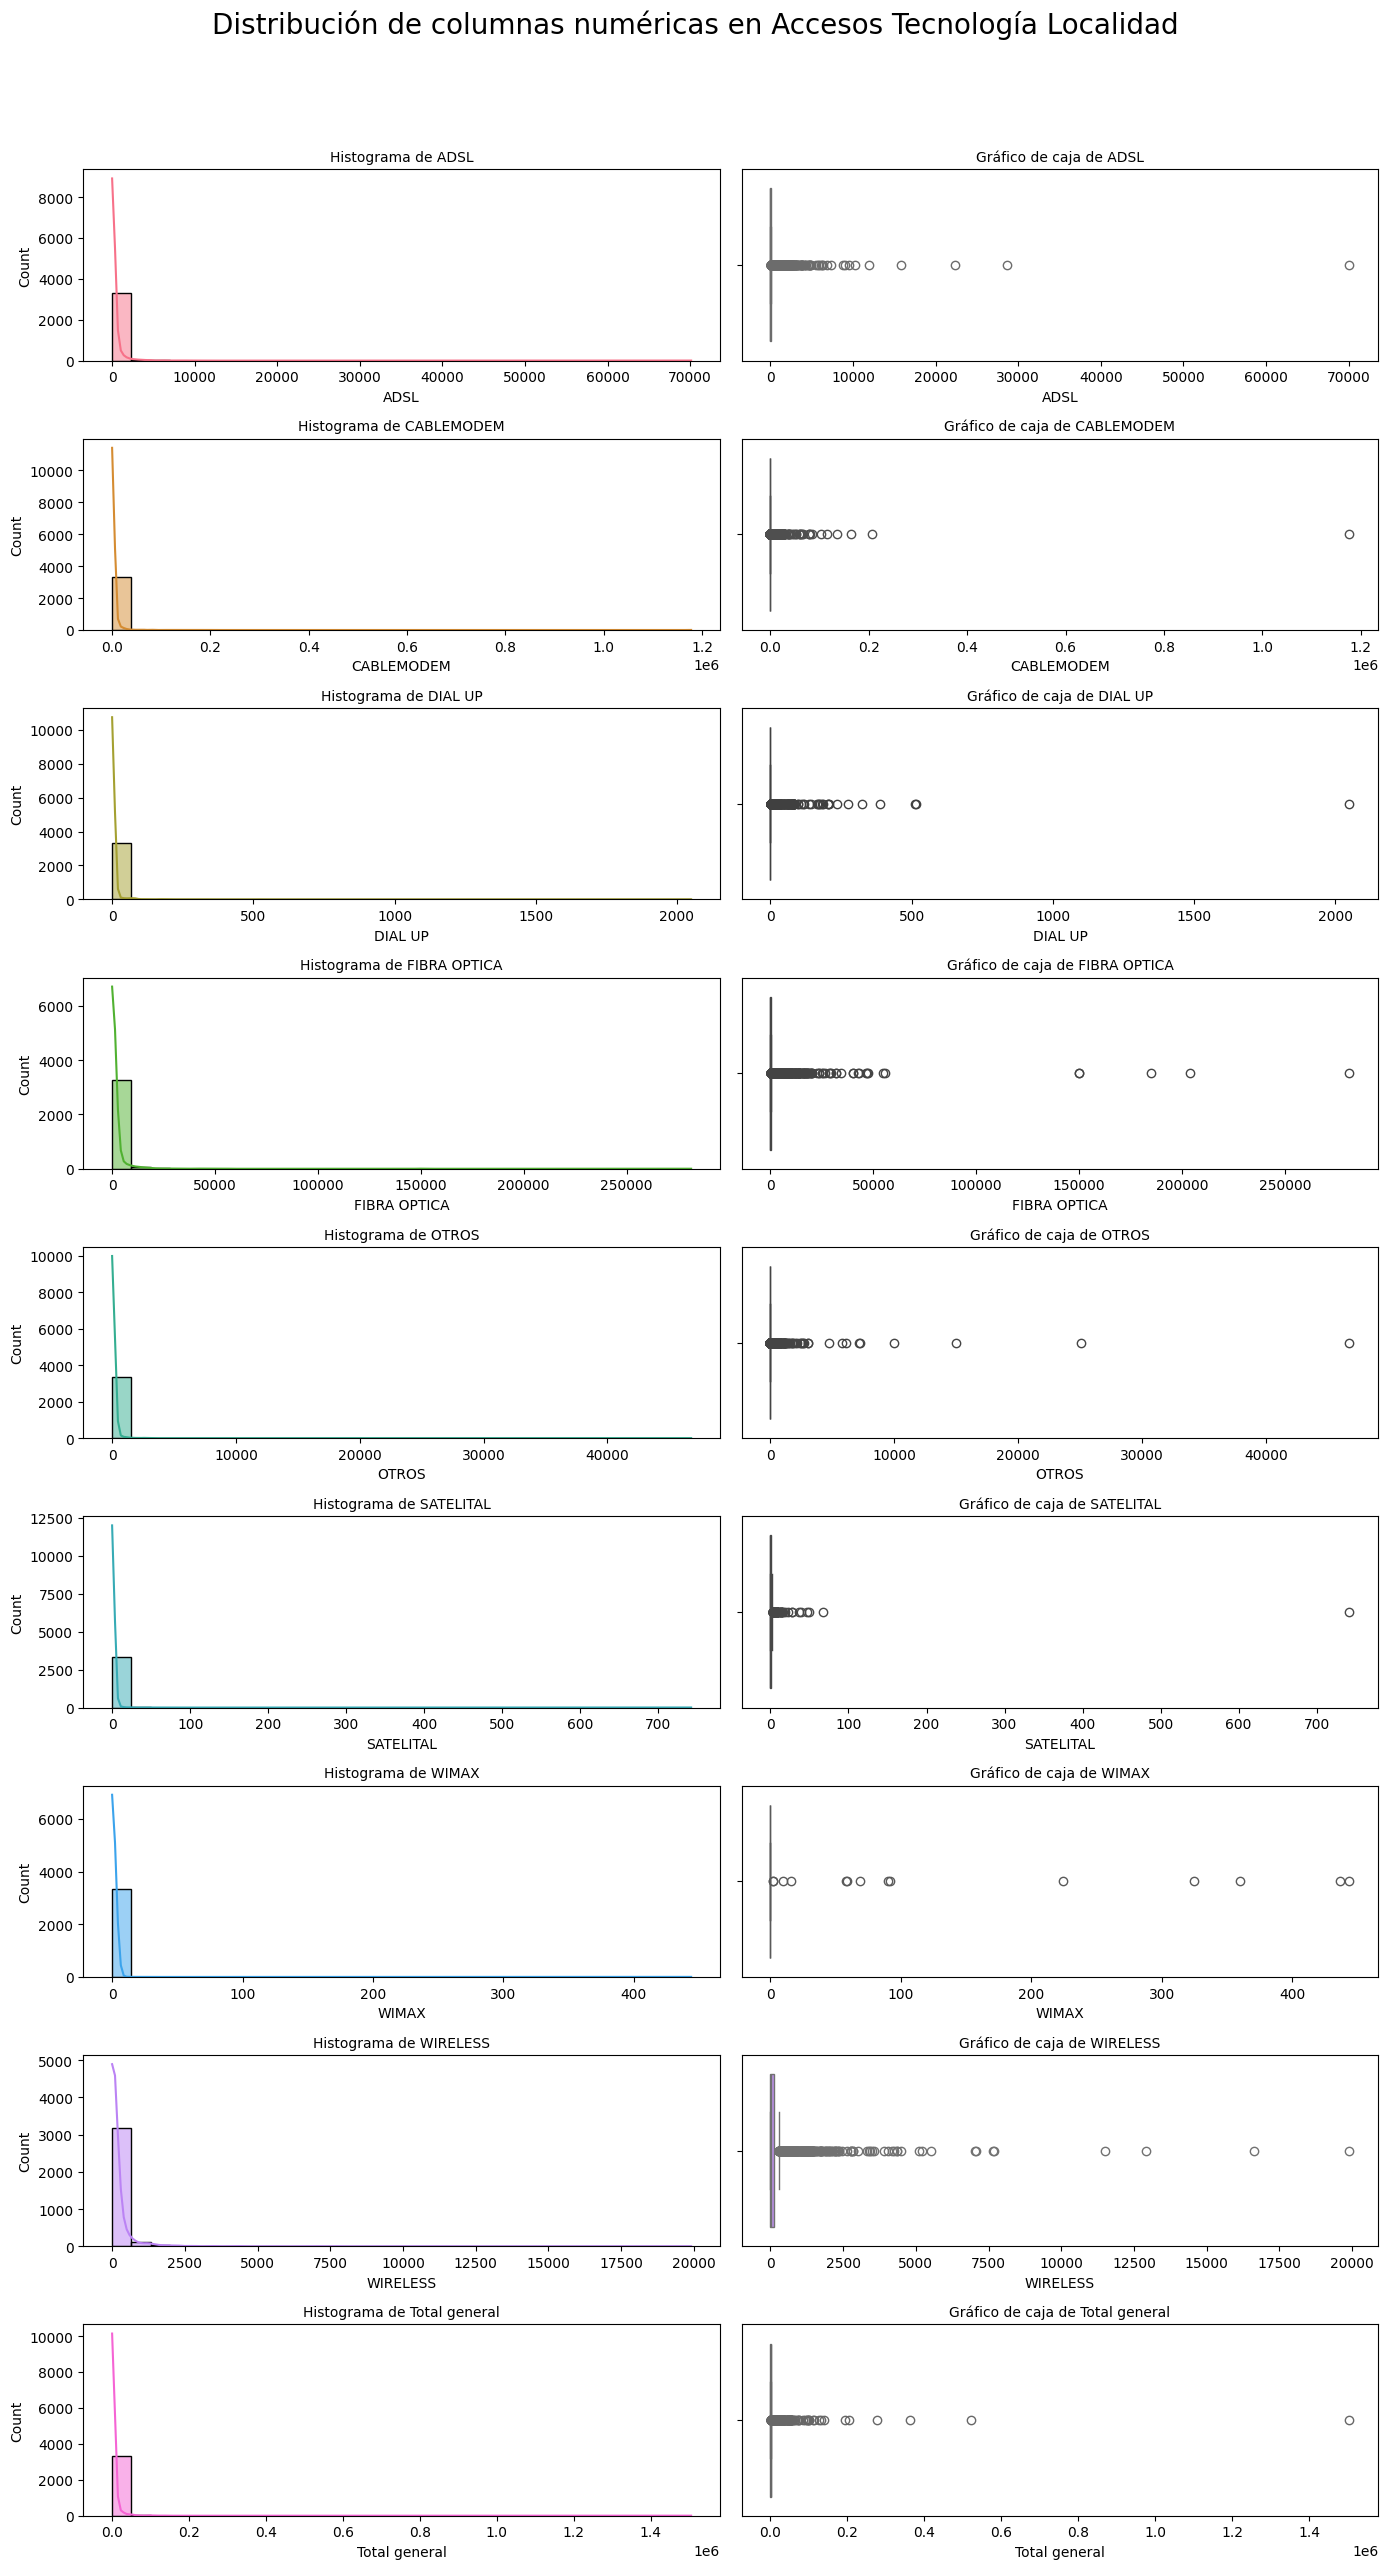

Análisis de distribución para Penetración por poblacion:


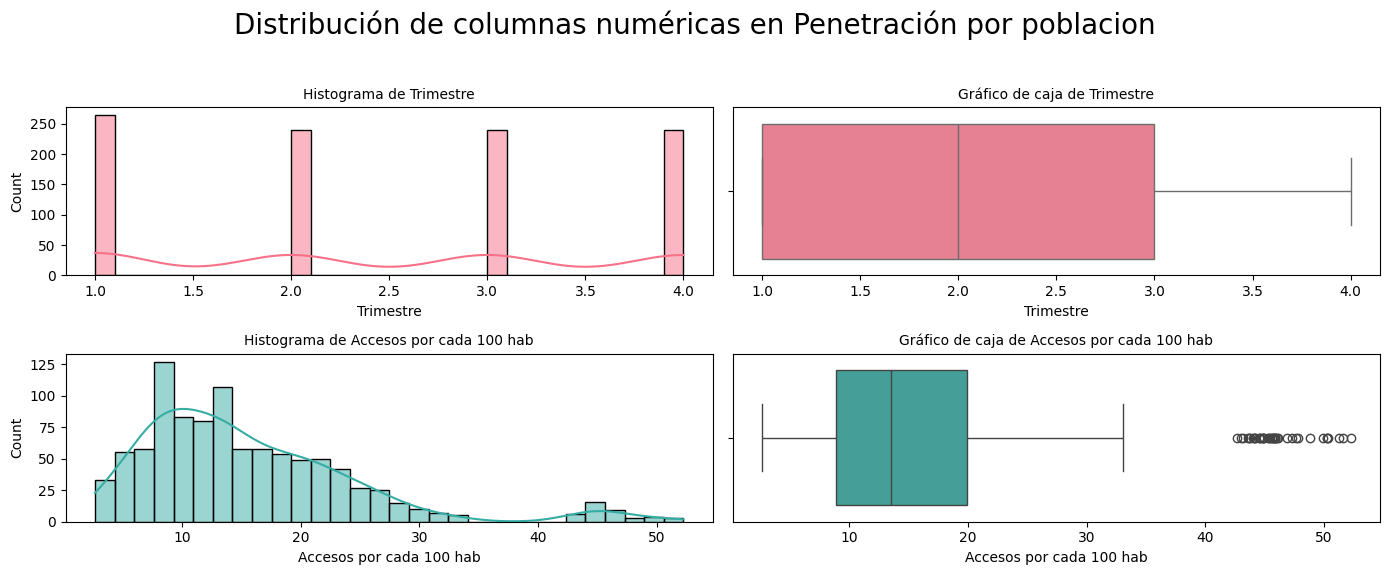

Análisis de distribución para Penetración por hogares:


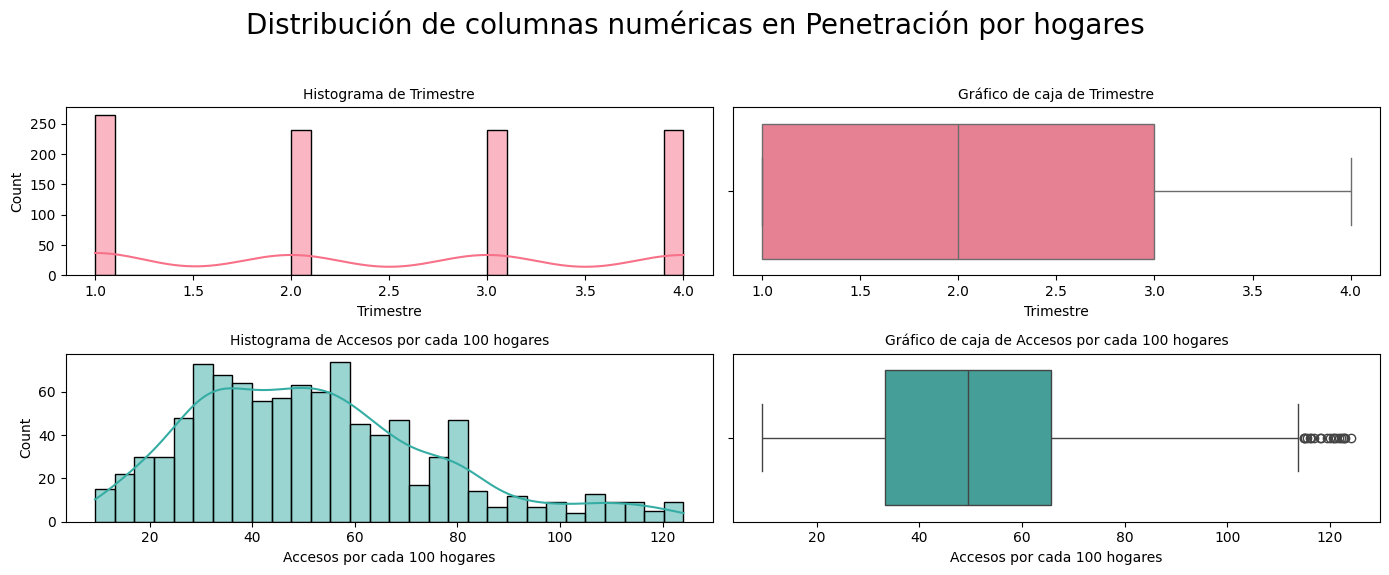

Análisis de distribución para Totales acceso por velocidad:


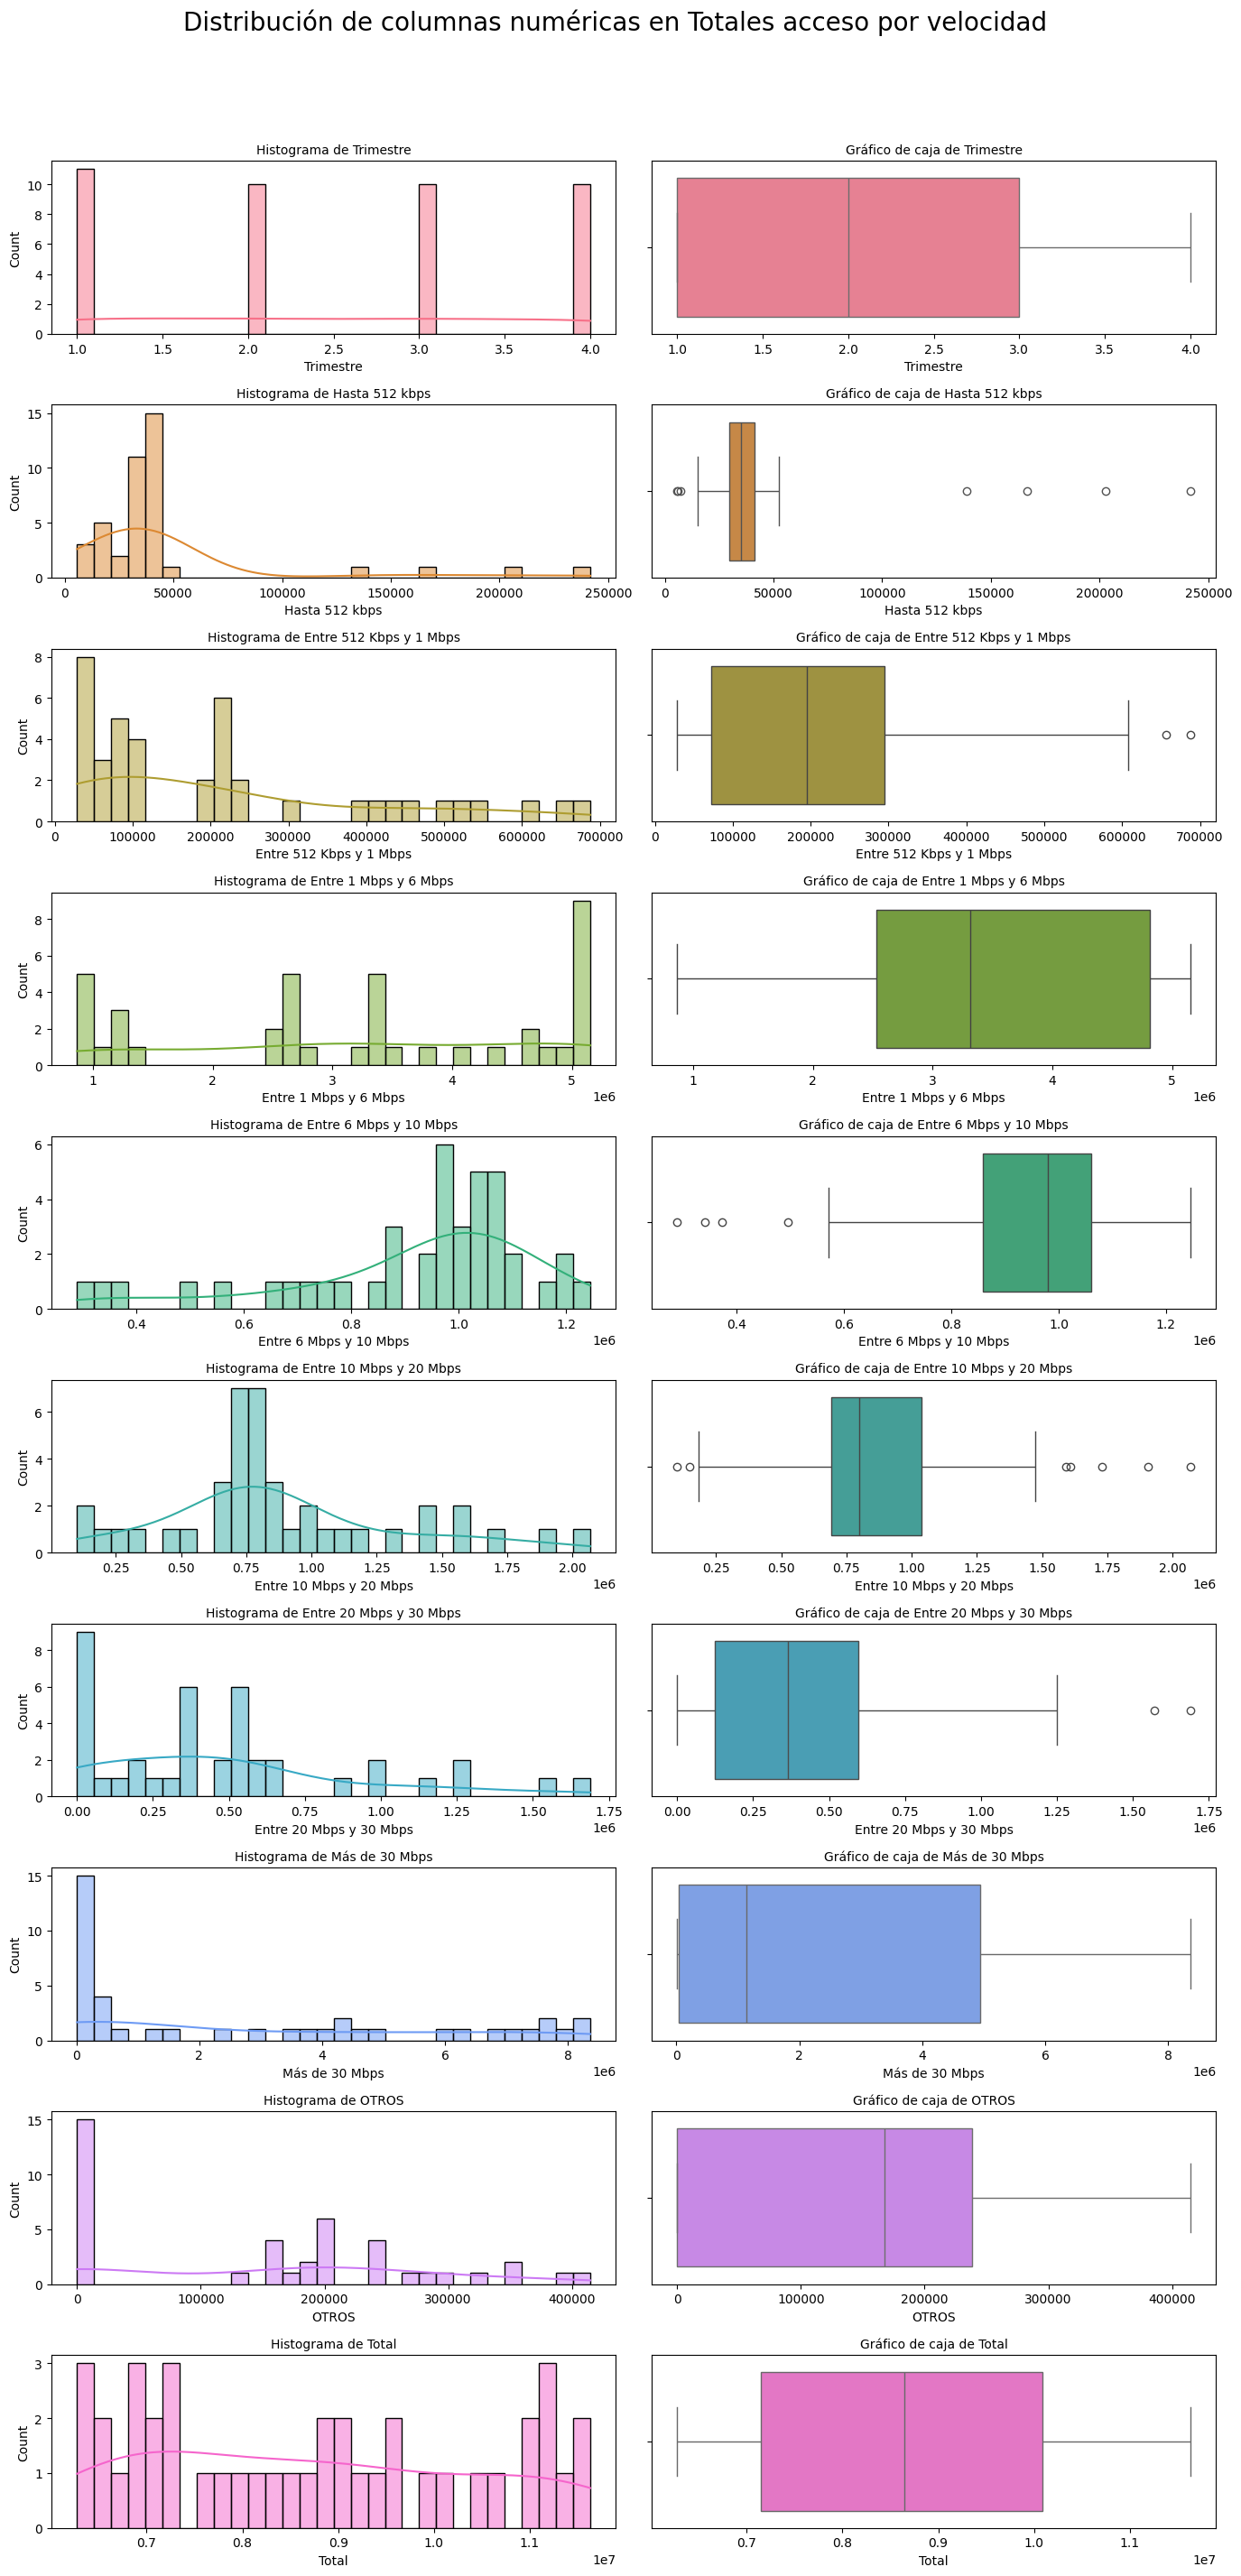

Análisis de distribución para Ingresos:


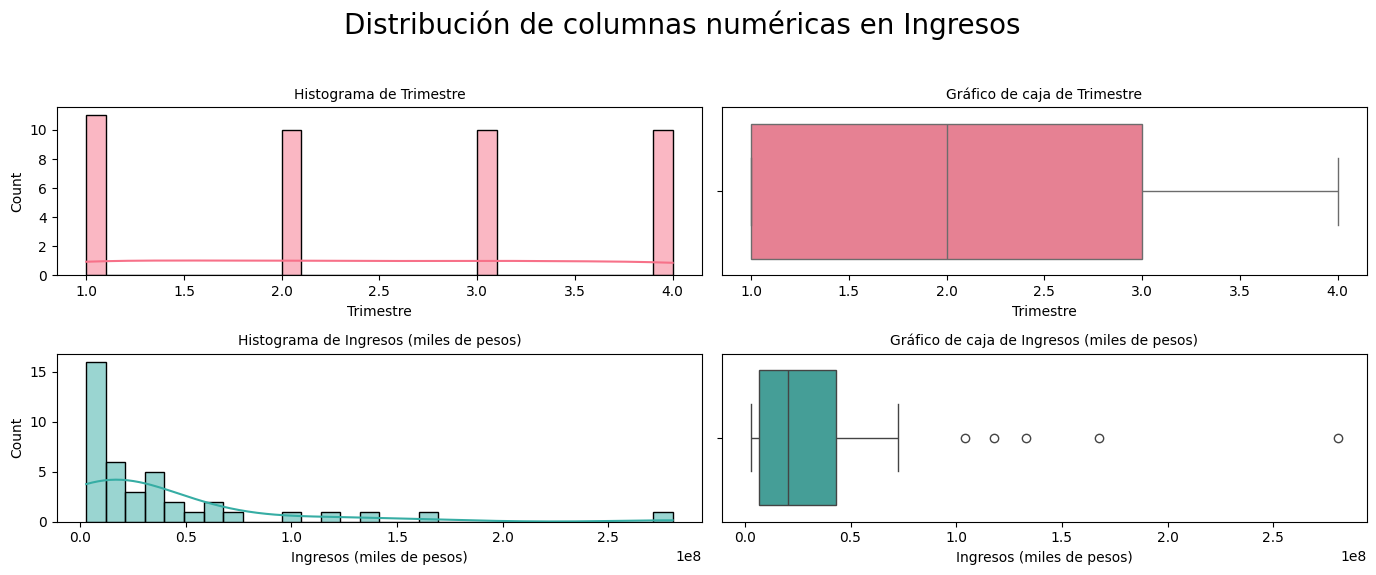

In [ ]:
'''Ahora generaremos gráficos para visualizar y tener una comprensión más clara
sobre las columnas numéricas y sus comportamientos'''

# Recorremos cada dataframe
for nombre, df in dataframes.items():
    print(f"Análisis de distribución para {nombre}:")

    # Seleccionamos solo columnas numéricas
    columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Número de gráficos (dos por cada columna numérica)
    num_graficos = len(columnas_numericas) * 2
    num_filas = math.ceil(num_graficos / 2)

    # Creamos una figura con el tamaño ajustado
    fig, axes = plt.subplots(num_filas, 2, figsize=(14, num_filas * 3))
    axes = axes.flatten()  # Aplanamos para indexación fácil
    
    # Obtenemos una paleta de colores
    colores = sns.color_palette("husl", len(columnas_numericas))
    
    # Graficamos histogramas y gráficos de caja
    for idx, columna in enumerate(columnas_numericas):
        hist_idx = idx * 2
        box_idx = hist_idx + 1

        # Histograma
        sns.histplot(df[columna].dropna(), kde=True, bins=30, ax=axes[hist_idx], color=colores[idx])
        axes[hist_idx].set_title(f"Histograma de {columna}", fontsize=10)

        # Gráfico de caja
        sns.boxplot(x=df[columna], ax=axes[box_idx], color=colores[idx])
        axes[box_idx].set_title(f"Gráfico de caja de {columna}", fontsize=10)

    # Ajustamos el título de la figura completa
    fig.suptitle(f"Distribución de columnas numéricas en {nombre}", fontsize=20)

    # Ajustamos los espacios para evitar superposición de títulos y gráficos
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()

Análisis de distribución para columnas categóricas en Accesos Tecnología Localidad:


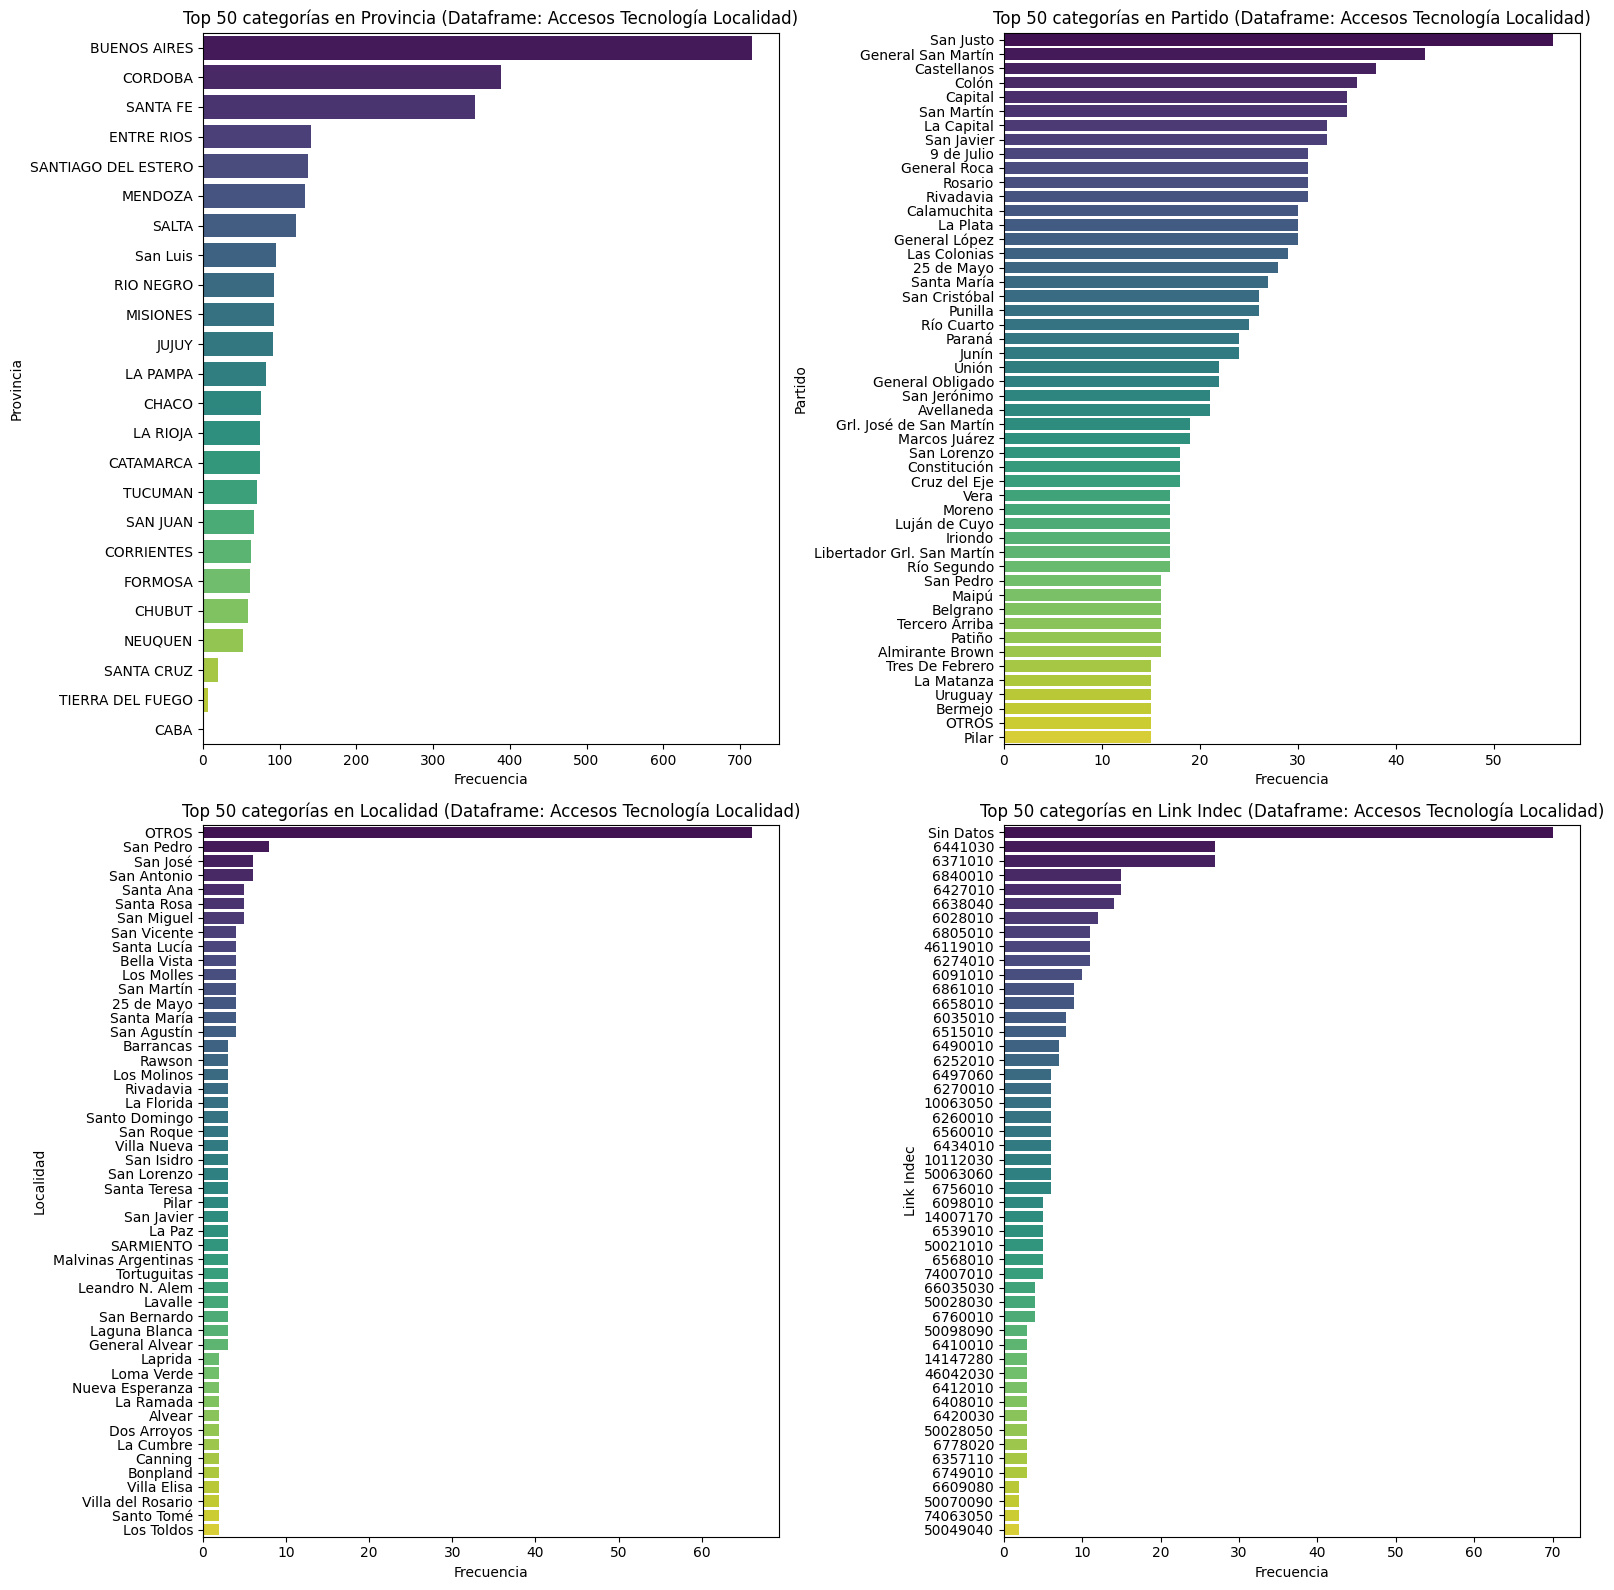

Análisis de distribución para columnas categóricas en Penetración por poblacion:


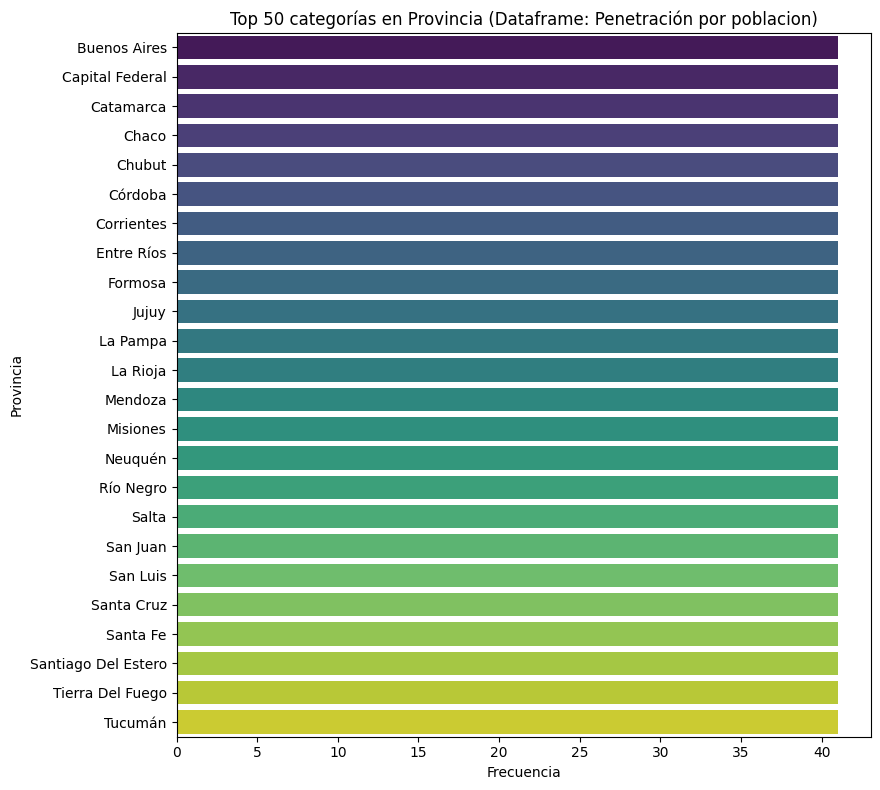

Análisis de distribución para columnas categóricas en Penetración por hogares:


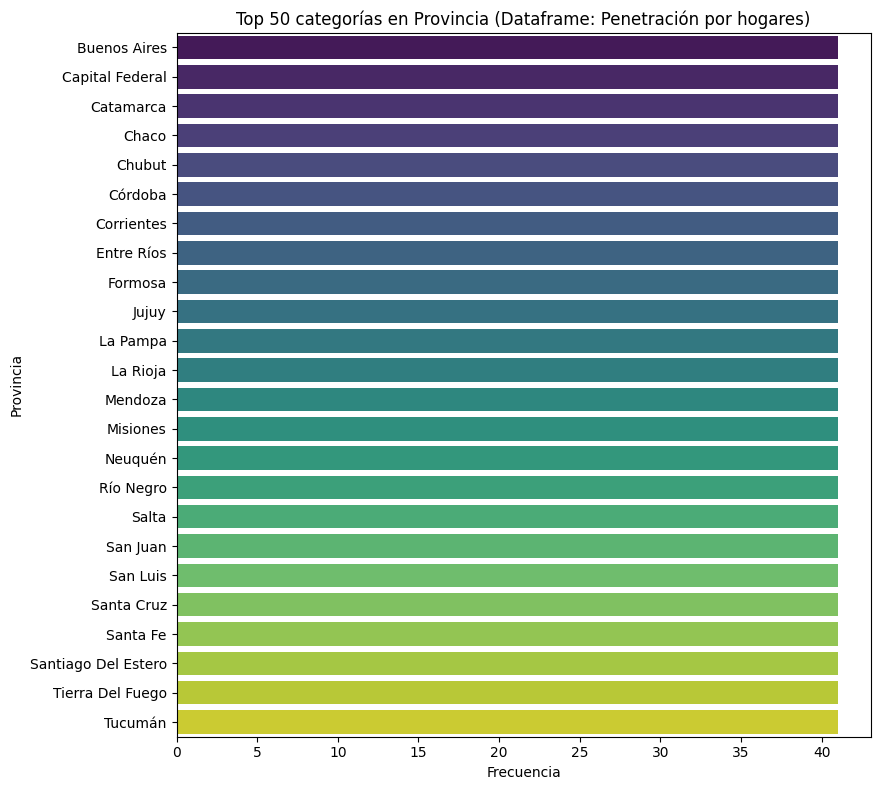

Análisis de distribución para columnas categóricas en Totales acceso por velocidad:
No hay columnas categóricas en el dataframe 'Totales acceso por velocidad'.
Análisis de distribución para columnas categóricas en Ingresos:


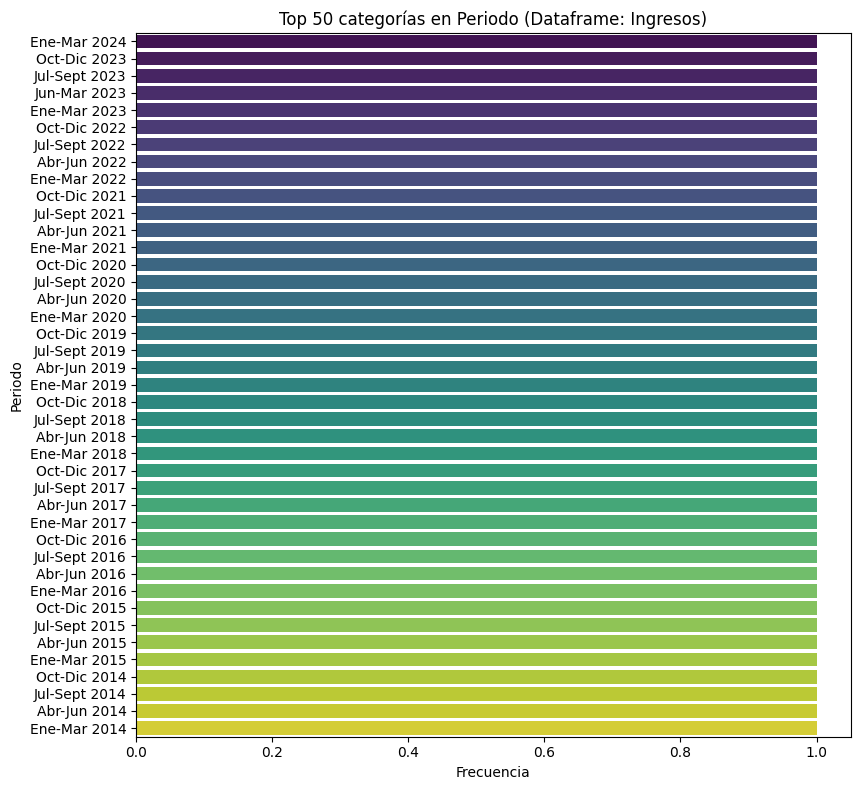

In [ ]:
'''Ahora realizaremos un proceso similar pero con las columnas categóricas'''

# Recorremos cada dataframe
for nombre, df in dataframes.items():
    print(f"Análisis de distribución para columnas categóricas en {nombre}:")

    # Seleccionamos solo columnas categóricas
    columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns

    # Verificamos si hay columnas categóricas
    if len(columnas_categoricas) == 0:
        print(f"No hay columnas categóricas en el dataframe '{nombre}'.")
        continue  # Saltamos al siguiente dataframe si no hay columnas categóricas

    # Número de columnas categóricas para definir el tamaño de la figura
    num_columnas = len(columnas_categoricas)
    
    # Calculamos cuántas filas de gráficos serán necesarias (dos gráficos por fila)
    num_filas = (num_columnas + 1) // 2
    
    # Ajustamos la altura de cada fila
    altura_por_fila = 8  # Altura en pulgadas por cada fila, ajustable
    altura_total = num_filas * altura_por_fila
    
    # Creamos una figura con subplots, aumentando la altura para mejorar la legibilidad
    fig, axes = plt.subplots(num_filas, 2, figsize=(16, altura_total))
    
    # Flatten para iterar sobre los ejes fácilmente
    axes = axes.flatten()

    # Graficamos conteos de categorías
    for i, columna in enumerate(columnas_categoricas):
        # Calculamos el número de categorías únicas
        num_categorias = df[columna].nunique()

        # Ajustamos el alto del gráfico basado en el número de categorías con un límite máximo
        height = min(max(6, num_categorias / 2), 20)  # Altura mínima de 6, ajustable, con un máximo de 20
        
        # Seleccionamos las 50 categorías más comunes
        top_50_values = df[columna].value_counts().nlargest(50).index
        
        # Filtramos el DataFrame para incluir solo estas categorías
        df_top_50 = df[df[columna].isin(top_50_values)]
        
        # Gráfico de conteo en el subplot correspondiente
        sns.countplot(data=df_top_50, y=columna, order=top_50_values, palette="viridis", ax=axes[i])
        axes[i].set_title(f"Top 50 categorías en {columna} (Dataframe: {nombre})")
        axes[i].set_xlabel("Frecuencia")
        axes[i].set_ylabel(columna)
        
    # Ocultamos gráficos vacíos si el número de columnas es impar
    if num_columnas % 2 != 0:
        fig.delaxes(axes[-1])
    
    # Ajustamos los márgenes y espaciado
    plt.tight_layout()
    plt.show()

In [ ]:
'''También buscaremos graficas relaciones entre las columnas de cada tabla con el ánimo
de entender mejor cada dataframe y sus interacciones'''

# Nos asegurarmos de que los gráficos se muestren en el notebook
%matplotlib inline

# Función para visualizar las relaciones POR COLUMNA
def visualizar_relaciones(dataframes):
    for nombre, df in dataframes.items():
        if nombre == "Accesos Tecnología Localidad":
            columnas_valores = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 
                                'SATELITAL', 'WIMAX', 'WIRELESS', 'Total general']
            columnas_categorias = ['Provincia', 'Partido', 'Localidad']
            
            for categoria in columnas_categorias:
                plt.figure(figsize=(16, 10))  # Tamaño más grande para mejor visibilidad
                
                # Reestructuramos el DataFrame usando melt
                df_melted = df.melt(id_vars=categoria, value_vars=columnas_valores, 
                                    var_name='Tecnología', value_name='Accesos')
                
                # Obtenemos el top 20 por categoría basado en la suma de accesos
                top_20_categorias = df_melted.groupby(categoria)['Accesos'].sum().nlargest(20).index
                df_top_20 = df_melted[df_melted[categoria].isin(top_20_categorias)]
                
                # Identificamos las dos categorías con mayor suma de accesos
                top_2_categorias = df_top_20.groupby(categoria)['Accesos'].sum().nlargest(2).index
                df_top_2 = df_top_20[df_top_20[categoria].isin(top_2_categorias)]
                df_otros = df_top_20[~df_top_20[categoria].isin(top_2_categorias)]
                
                # Graficamos las categorías principales por separado
                fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16), gridspec_kw={'height_ratios': [1, 2]})
                
                # Colores menos contrastantes para top 2
                sns.barplot(data=df_top_2, x='Tecnología', y='Accesos', hue=categoria, ci=None, ax=ax1,
                            palette="pastel")  # Usar paleta pastel para menor contraste
                ax1.set_title(f'Top 2 categorías con mayor suma de accesos (Dataframe: {nombre})')
                ax1.legend(title=categoria, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)  # Leyenda abajo
                ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
                
                # Colores con más contraste para el resto de las categorías
                sns.barplot(data=df_otros, x='Tecnología', y='Accesos', hue=categoria, ci=None, ax=ax2,
                            palette="tab20")  # Usamos paleta tab20 para más contraste
                ax2.set_title(f'Relación de accesos por tecnología y {categoria} (excluyendo Top 2) (Dataframe: {nombre})')
                ax2.legend(title=categoria, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)  # Leyenda abajo
                ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
                
                # Ajustamos los márgenes y espaciado
                plt.tight_layout()
                plt.show()
                
        elif nombre == "Penetración por población":
            # Creamos una figura con un tamaño específico para la gráfica
            plt.figure(figsize=(12, 6))
            # Generamos un gráfico de barras utilizando seaborn
            sns.barplot(data=df, x='Provincia', y='Accesos por cada 100 hab', ci=None, palette="Set2")  # Usamos una paleta de colores aleatorios
            # Establecemos el título de la gráfica
            plt.title(f'Accesos por cada 100 habitantes por provincia (Dataframe: {nombre})')
            # Rotamos las etiquetas del eje x para una mejor visualización
            plt.xticks(rotation=45)
            # Mostramos la gráfica
            plt.show()

        elif nombre == "Penetración por hogares":
            # Creamos una figura con un tamaño específico para la gráfica
            plt.figure(figsize=(12, 6))
            # Generamos un gráfico de barras utilizando seaborn
            sns.barplot(data=df, x='Provincia', y='Accesos por cada 100 hogares', ci=None, palette="husl")  # Usamos una paleta de colores aleatorios
            # Establecemos el título de la gráfica
            plt.title(f'Accesos por cada 100 hogares por provincia (Dataframe: {nombre})')
            # Rotamos las etiquetas del eje x para una mejor visualización
            plt.xticks(rotation=45)
            # Mostramos la gráfica
            plt.show()

        elif nombre == "Totales acceso por velocidad":
            # Definimos las columnas que contienen los valores de acceso por velocidad
            columnas_valores = ['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 
                        'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 
                        'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'OTROS', 'Total']
            # Creamos una figura con un tamaño específico para la gráfica
            plt.figure(figsize=(12, 6))
            # Derretimos el DataFrame para que sea adecuado para la gráfica de líneas
            df_melted = df.melt(id_vars=['Año', 'Trimestre'], value_vars=columnas_valores, 
                        var_name='Velocidad', value_name='Accesos')
               # Generamos un gráfico de líneas utilizando seaborn
            sns.lineplot(data=df_melted, x='Año', y='Accesos', hue='Velocidad', ci=None, marker='o')
            # Establecemos el título de la gráfica
            plt.title(f'Accesos por velocidad y año (Dataframe: {nombre})')
            # Rotamos las etiquetas del eje x para una mejor visualización
            plt.xticks(rotation=45)
            # Mostramos la gráfica
            plt.show()

        elif nombre == "Ingresos":
            # Creamos una figura con un tamaño específico para la gráfica
            plt.figure(figsize=(12, 6))
            # Generamos un gráfico de líneas utilizando seaborn
            sns.lineplot(data=df, x='Año', y='Ingresos (miles de pesos)', hue='Trimestre', ci=None, marker='o')
            # Establecemos el título de la gráfica
            plt.title(f'Ingresos por año y trimestre (Dataframe: {nombre})')
            # Rotamos las etiquetas del eje x para una mejor visualización
            plt.xticks(rotation=45)
            # Mostramos la gráfica
            plt.show()

<Figure size 1600x1000 with 0 Axes>

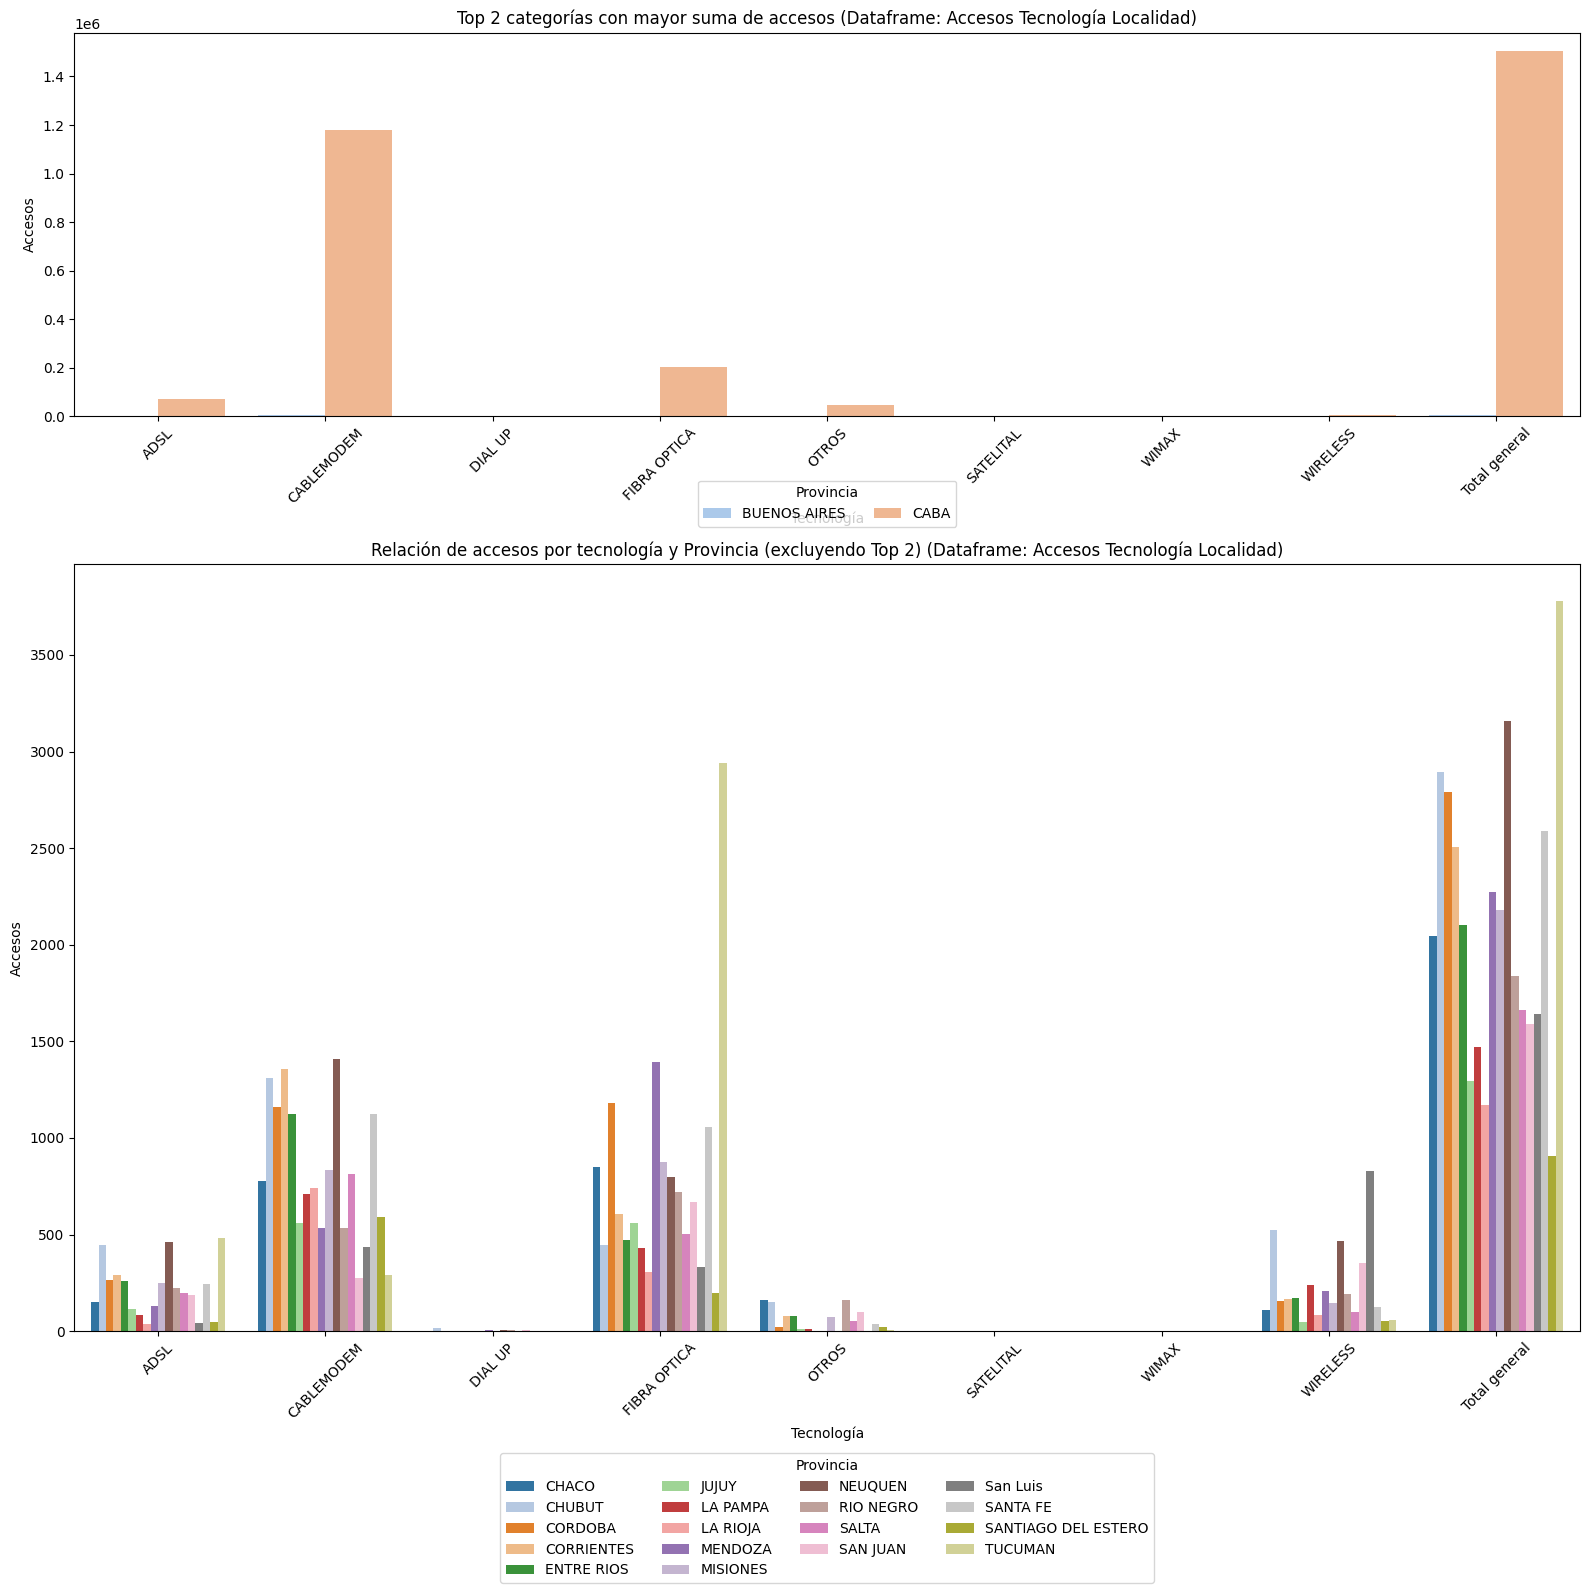

<Figure size 1600x1000 with 0 Axes>

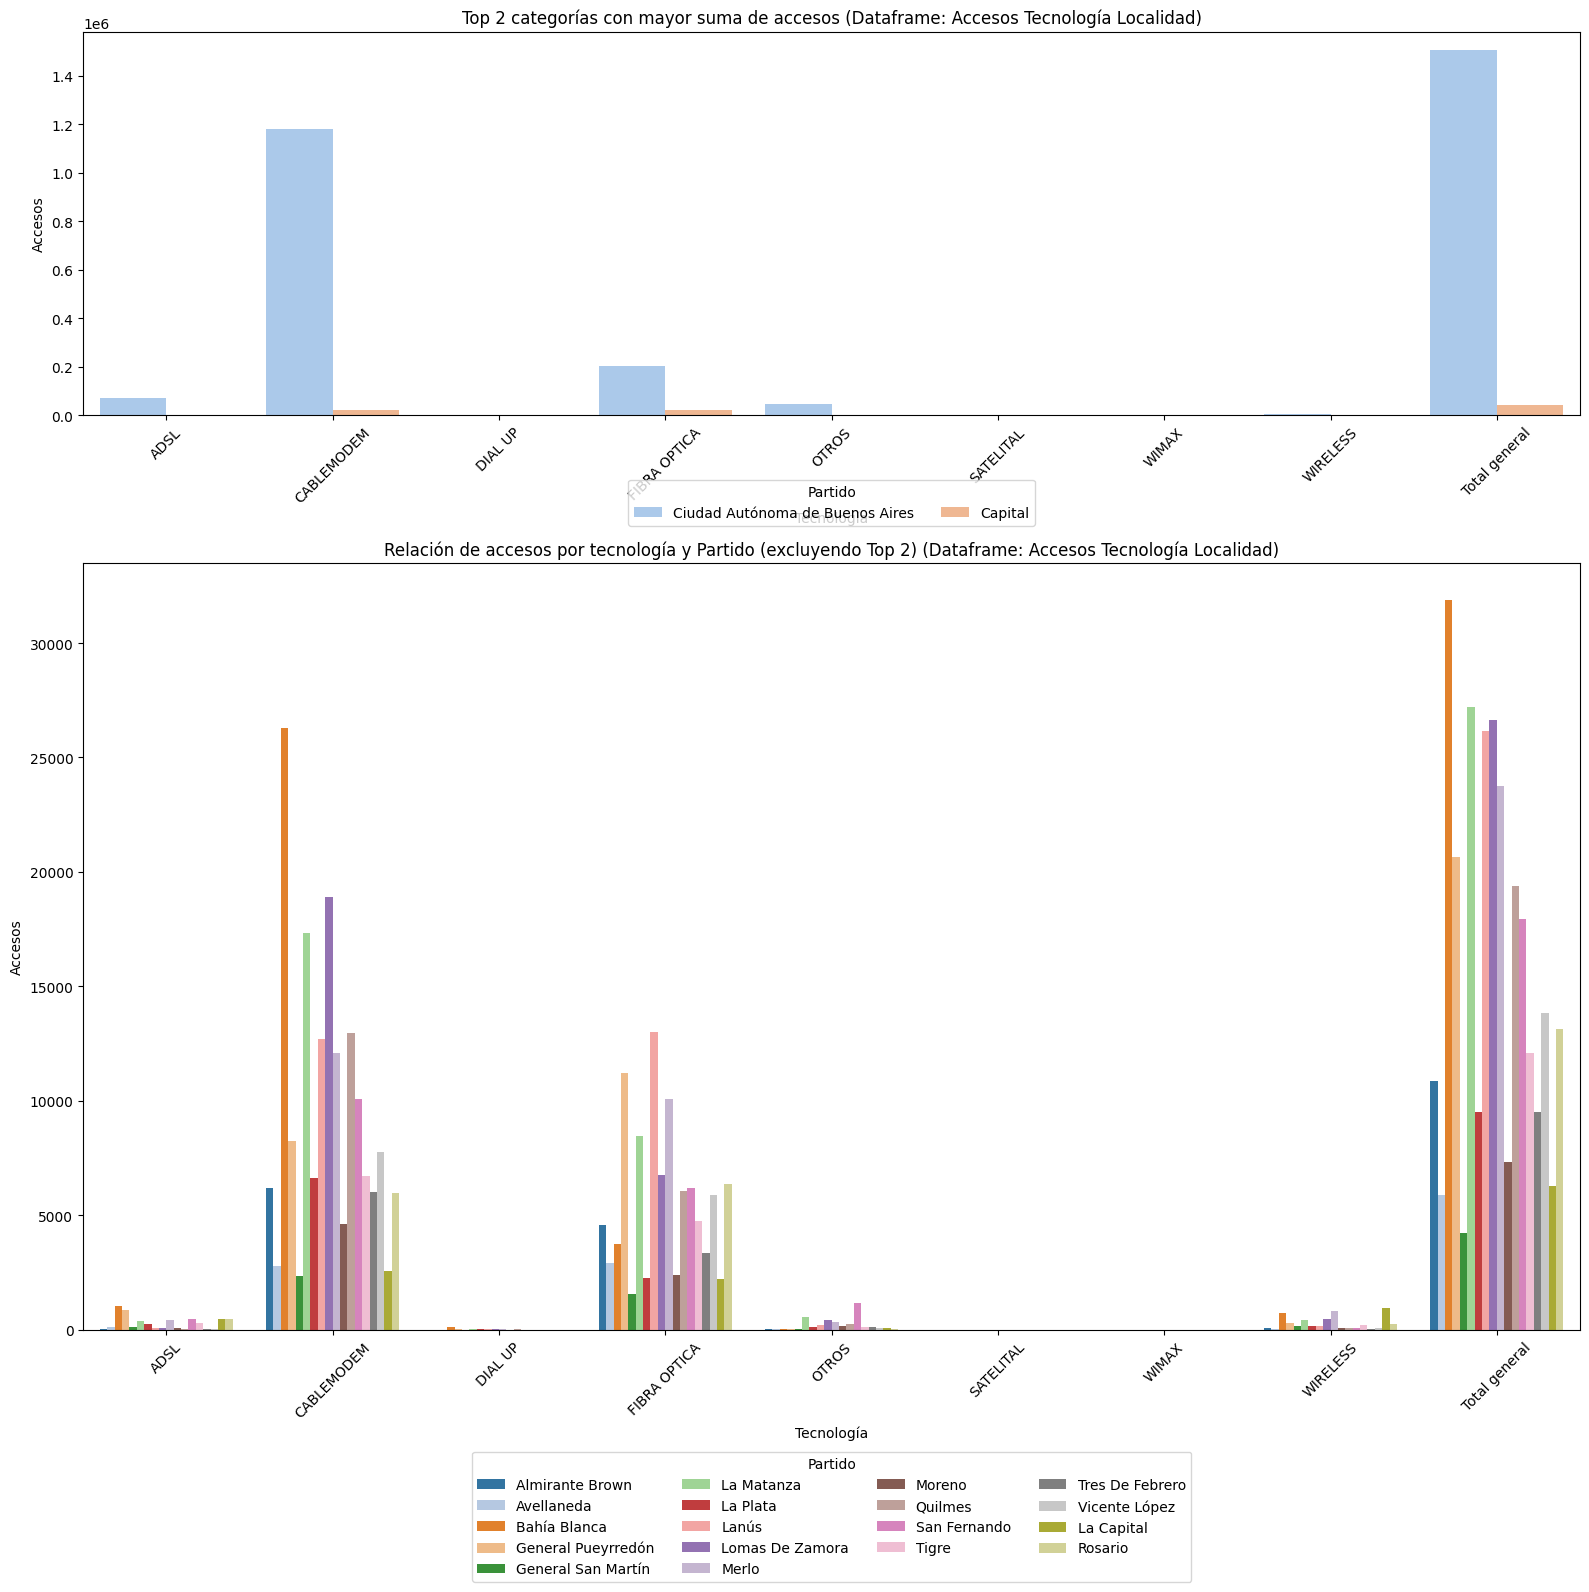

<Figure size 1600x1000 with 0 Axes>

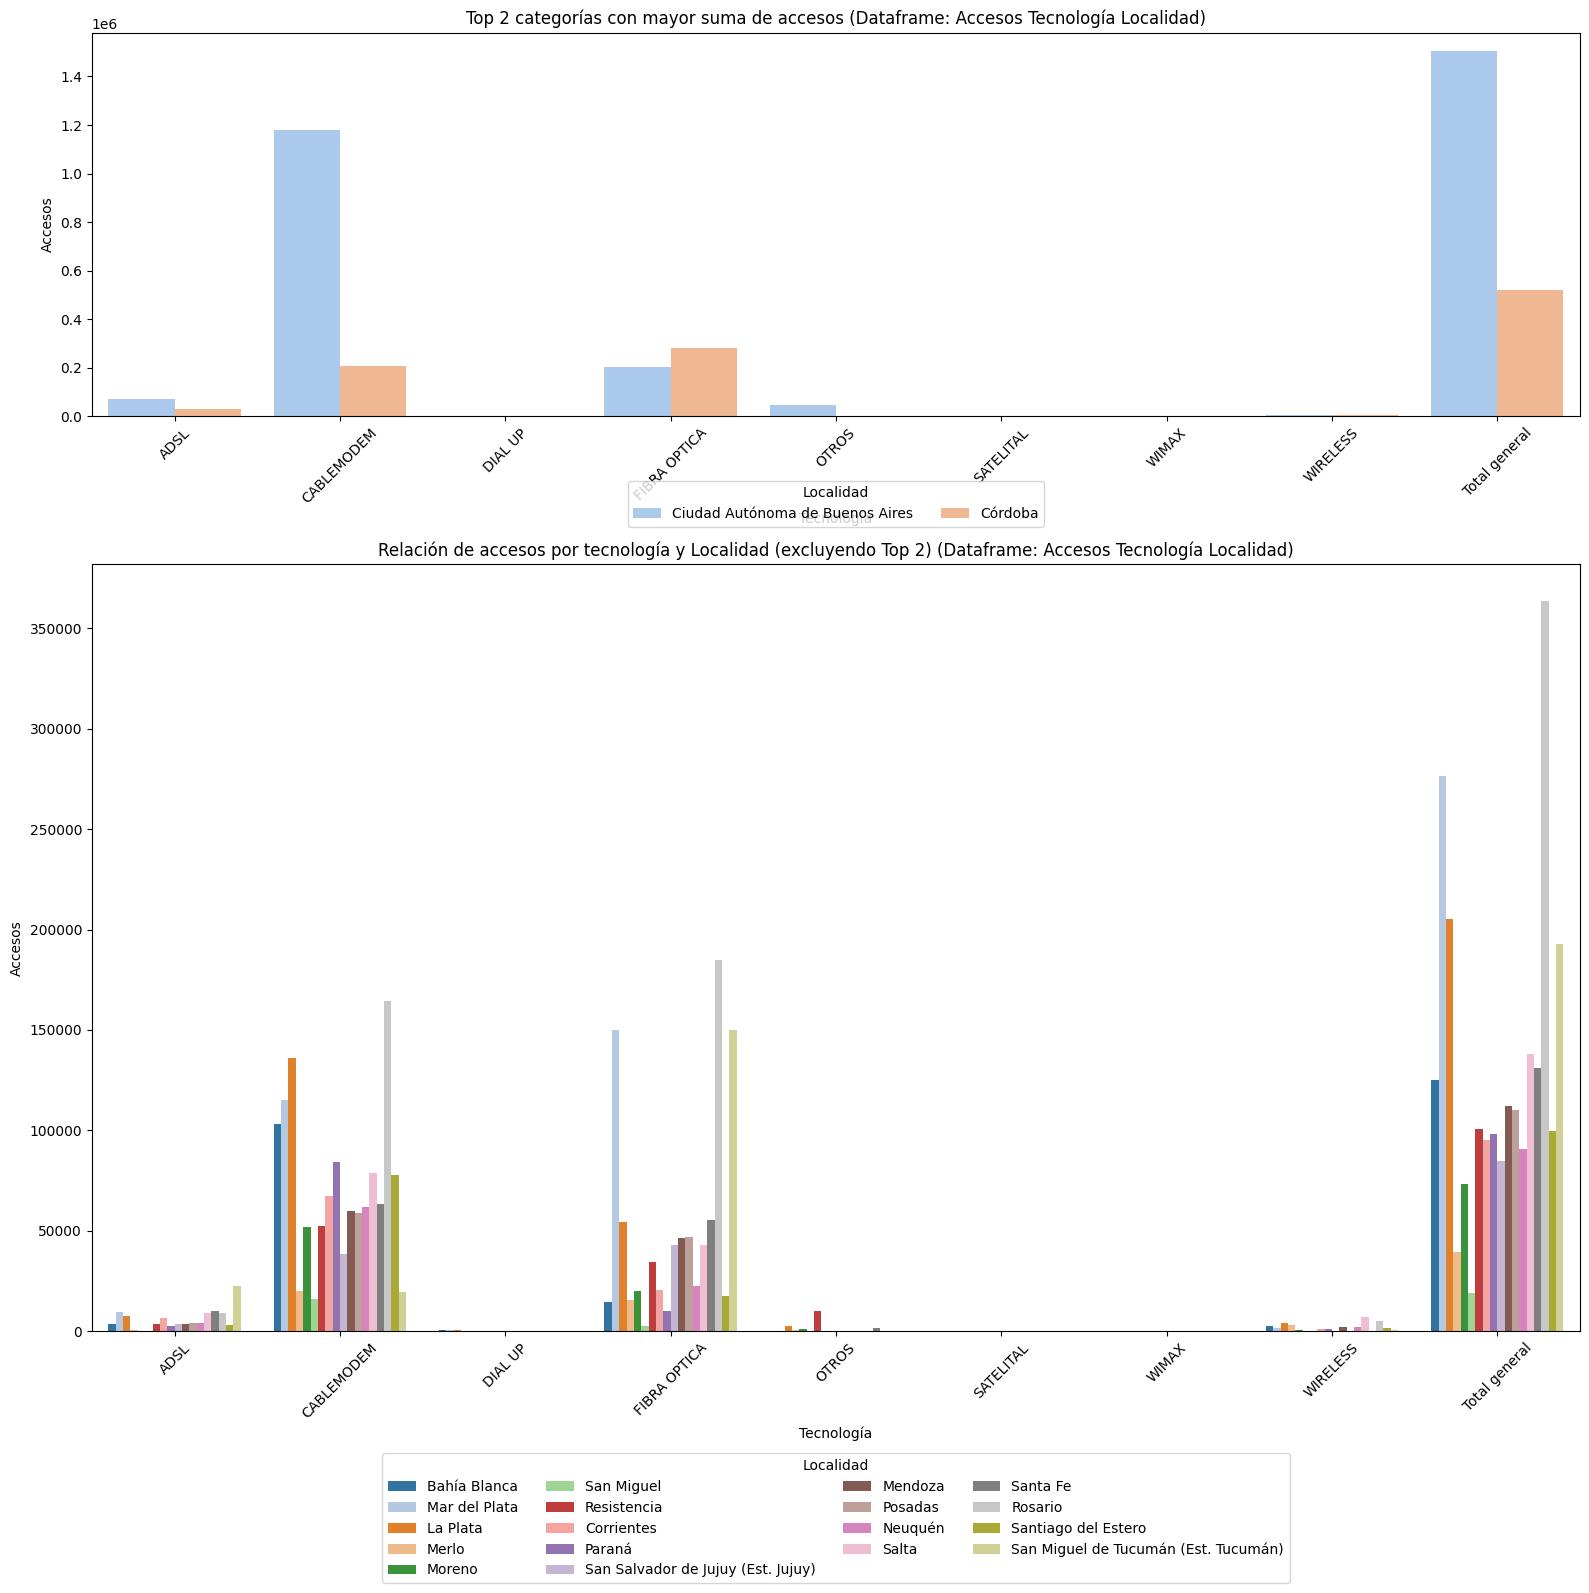

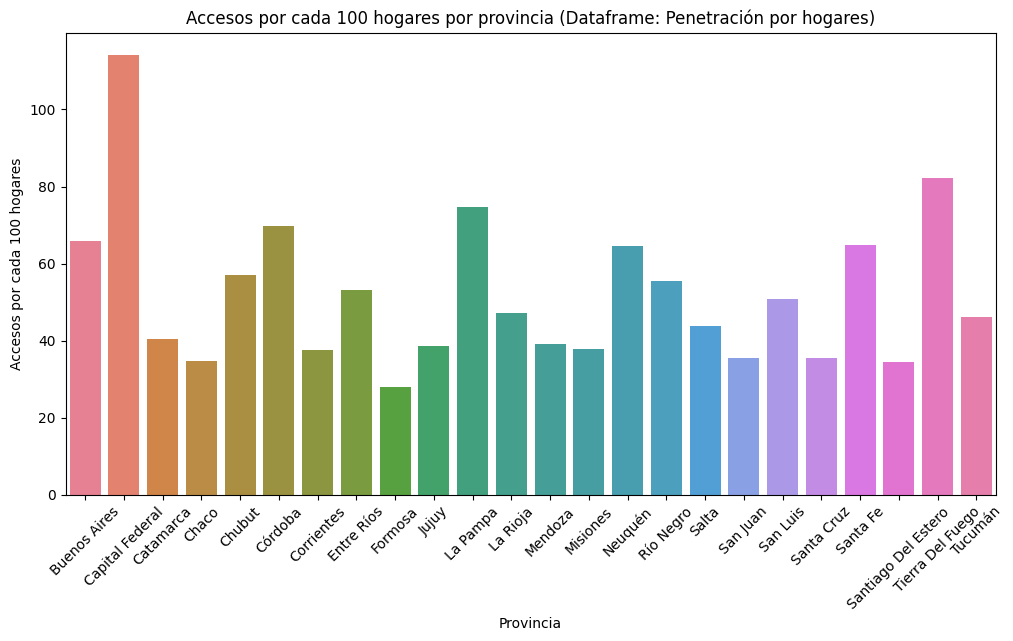

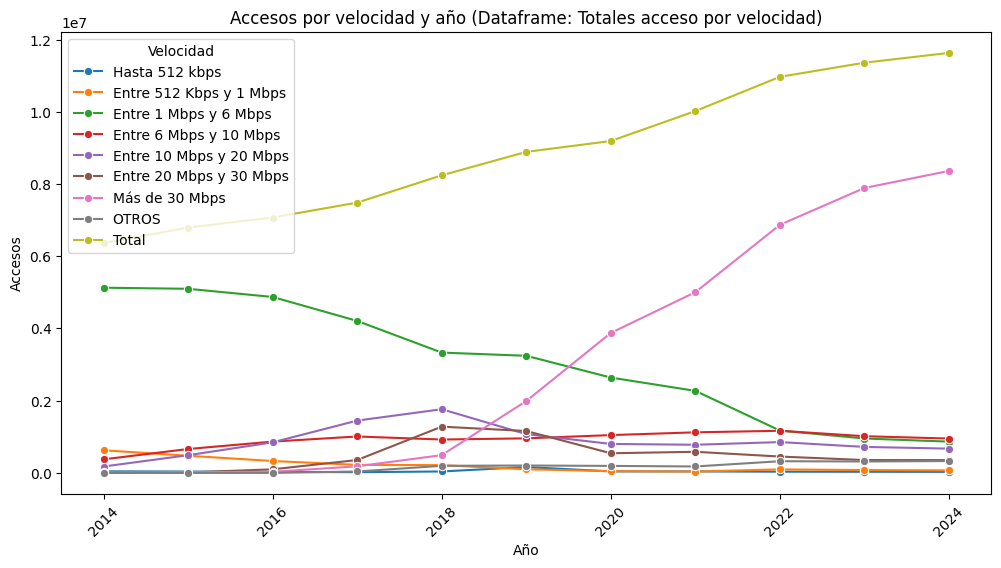

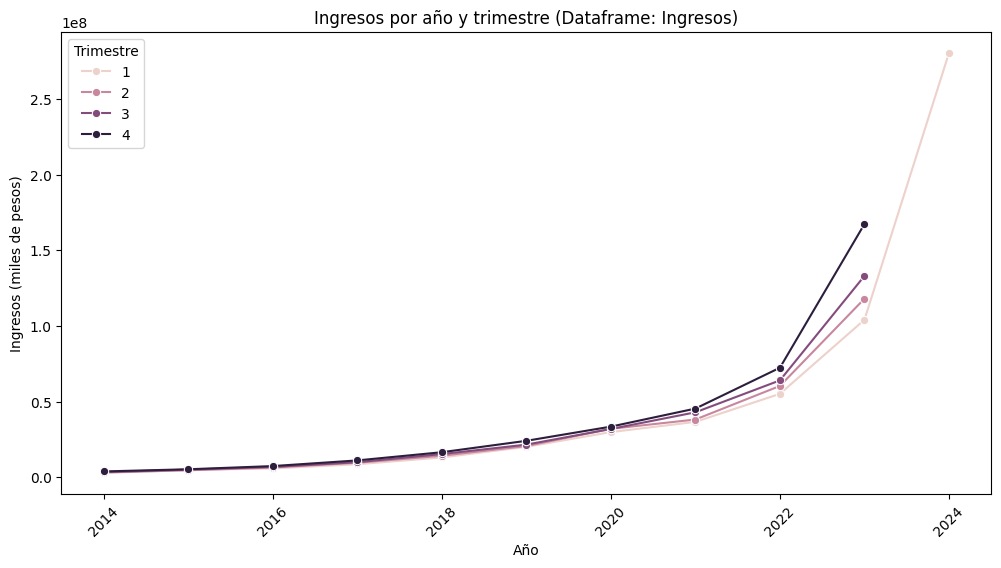

In [ ]:
# Llamamos a la función para visualizar
visualizar_relaciones(dataframes)

In [ ]:
# Exportammos a CSV
accesos_tecnologia_localidad_df.to_csv('accesos_tecnologia_localidad.csv', index=False)
penetración_poblacion_df.to_csv('penetracion_poblacion.csv', index=False)
penetracion_hogares_df.to_csv('penetracion_hogares.csv', index=False)
totales_acceso_por_velocidad_df.to_csv('totales_acceso_por_velocidad.csv', index=False)
ingresos_df.to_csv('ingresos.csv', index=False)

In [ ]:
regiones_df.to_csv('regiones.csv', index=False)

In [ ]:
fecha_df.to_csv('fecha.csv', index=False)

In [ ]:
regiones_df

Provincia      Partido                           Localidad Link Indec
0     BUENOS AIRES   25 de Mayo                          25 de Mayo    6854100
1     BUENOS AIRES   25 de Mayo                           Del Valle    6854020
2     BUENOS AIRES   25 de Mayo                   Gobernador Ugarte    6854040
3     BUENOS AIRES   25 de Mayo              Norberto de la Riestra    6854060
4     BUENOS AIRES   25 de Mayo                    Lucas Monteverde    6854050
...            ...          ...                                 ...        ...
3067       TUCUMAN   Tafí Viejo  Villa Mariano Moreno - El Colmenar   90105100
3068       TUCUMAN      Trancas                San Pedro de Colalao   90112020
3069       TUCUMAN      Trancas                   Villa  de Trancas   90112030
3070       TUCUMAN  Yerba Buena                       Villa Carmela   90119020
3071       TUCUMAN  Yerba Buena            Yerba Buena - Marcos Paz   90119030

[3072 rows x 4 columns]

No se presentan cambios realmente significativos, esto debido a que decidimos cuidar los datos en muchas ocasiones comprendiendo que no siempre un outlier significa una necesidad de ser eliminado o cambiado, en muchas ocasiones son una muestra del comportamiento de nuestros datos en un área en específico y puede llegar a ser imprudente modificarlos simplemente por ser atípicos.  
  
Espero que este Análisis exploratorio de datos haya sido ilustrativo y se haya realizado correctamente el recorrido sobre el planteo inicial de la información básica de cada uno de los dataframes, y también la búsqueda de outliers, nulos y demás valores atípicos. Se buscó diferencias los tipos de variables entre numéricas y categóricas y se trató de realizar pequeñas observaciones sobre el tratamiento de los datos para luego trabajar tranquilamente en nuestro dashboard.  
  
Muchisimas gracias por su tiempo.  
Gabriel Coria.